# Recommender System MovieLens.

* This notebook will attempt to create a recommender system for the movie Pulp Fiction (1994) but can be reused for any other movies in this data set.

* The table at the end of this notebook shows all the  title of all the 9123 movies in the data set so you can search one, fork this notebook, plug in the chosen title and get nice recommendations for yourself.

* Load Libraries.

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

* Set sns styles to ones of my preference.

In [67]:
sns.set_palette('plasma')
sns.set_style('darkgrid')

* Read in data sets.

In [68]:
movieLens_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')
tags_df = pd.read_csv('tags.csv')

* Check dataframe head, info.

In [69]:
movieLens_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [70]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [71]:
movieLens_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
movieId    9125 non-null int64
title      9125 non-null object
genres     9125 non-null object
dtypes: int64(1), object(2)
memory usage: 213.9+ KB


In [72]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
userId       100004 non-null int64
movieId      100004 non-null int64
rating       100004 non-null float64
timestamp    100004 non-null int64
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


* Merge the dataframes above together.

In [73]:
merged_movies_ratings = pd.merge(ratings_df,movieLens_df,on='movieId')

In [74]:
merged_movies_ratings.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama


* Check movies with highest ratings. See any problems here?

In [75]:
merged_movies_ratings.groupby(merged_movies_ratings.title)['rating'].mean().sort_values(ascending=False).head()

title
Burn Up! (1991)                                     5.0
Absolute Giganten (1999)                            5.0
Gentlemen of Fortune (Dzhentlmeny udachi) (1972)    5.0
Erik the Viking (1989)                              5.0
Reality (2014)                                      5.0
Name: rating, dtype: float64

In [76]:
movie_final_df = pd.DataFrame(merged_movies_ratings.groupby(merged_movies_ratings.title)['rating'].mean().sort_values(ascending=False))

In [77]:
movie_final_df['numsRating'] = pd.DataFrame(merged_movies_ratings.groupby('title').size())

In [78]:
final_movie_df = movie_final_df[movie_final_df['numsRating'] > 2 ]

In [79]:
final_movie_df.head()

,rating,numsRating
title,,
"Red Firecracker, Green Firecracker (Pao Da Shuang Deng) (1994)",5.000000,3
"Face in the Crowd, A (1957)",5.000000,4
'night Mother (1986),5.000000,3
In a Lonely Place (1950),4.833333,3
Anne Frank Remembered (1995),4.750000,6


* Check distribution of ratings and number of times rated ( > 2).

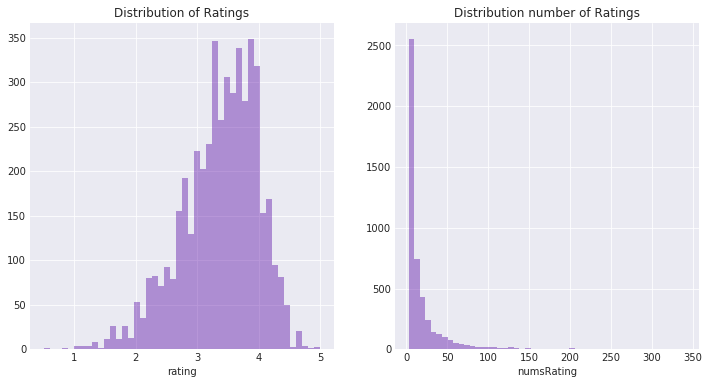

In [80]:
fig,axs = plt.subplots(1,2,figsize=(12,6))

axs[0].set_title('Distribution of Ratings')
sns.distplot(final_movie_df['rating'],kde=False, ax=axs[0])

axs[1].set_title('Distribution number of Ratings')
sns.distplot(final_movie_df['numsRating'],kde=False)

plt.show()

* Check correlation between ratings and number of ratings.

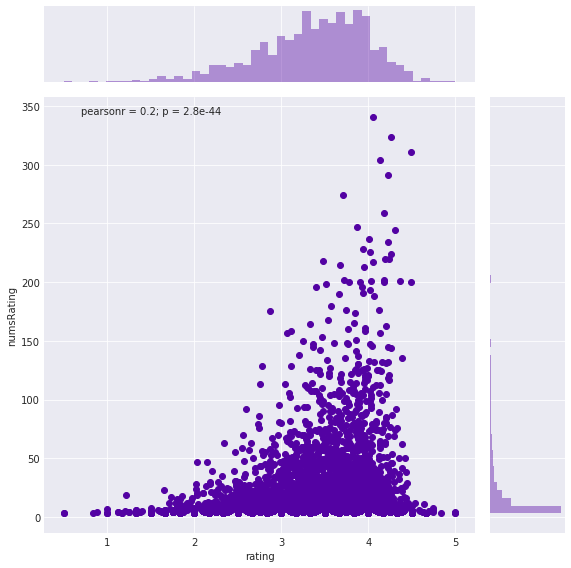

In [81]:
sns.jointplot(x='rating',y='numsRating',data=final_movie_df, size=8)
plt.show()

* Small positive colinearity between rating (mean) and number of ratings.

* It is worthy noting that we need to sort by numsRating otherwise all the movies at the top will have rating equals five.

In [82]:
final_movie_df.sort_values(by='numsRating',ascending=False).head()

,rating,numsRating
title,,
Forrest Gump (1994),4.054252,341
Pulp Fiction (1994),4.256173,324
"Shawshank Redemption, The (1994)",4.487138,311
"Silence of the Lambs, The (1991)",4.138158,304
Star Wars: Episode IV - A New Hope (1977),4.221649,291


* Create pivot table for each users rating on each movie.

In [83]:
moviemat = pd.pivot_table(merged_movies_ratings,index='userId',columns='title', values='rating')

In [84]:
moviemat.head()

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Here you can substitute 'Pulp Fiction (1994)' by any movie of your choice.

In [85]:
pulp_fiction_ratings = moviemat['Pulp Fiction (1994)']

* Create a series where there is a title column and the correlation of each title with the movie chosen.

In [86]:
similar_to_pulp = moviemat.corrwith(pulp_fiction_ratings)

/usr/local/lib/python3.5/site-packages/numpy/lib/function_base.py:3159: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.5/site-packages/numpy/lib/function_base.py:3093: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


* Create df out of the series and drop nans.

In [87]:
similar_df = pd.DataFrame(similar_to_pulp, columns=['Correlation'])
similar_df.dropna(inplace=True)
similar_df.head()

,Correlation
title,
$9.99 (2008),1.000000
"'burbs, The (1989)",-0.138112
(500) Days of Summer (2009),-0.047127
*batteries not included (1987),-0.288675
...And Justice for All (1979),-0.008667


* Here we see another problem, where we need to sort by numsRating and rating in descending order.

In [88]:
similar_df = similar_df.join(final_movie_df['numsRating'])

* Voila! Grab some popcorn and enjoy any of the movies in this list. Remember that the lower the correlation the less likely you will enjoy based on the movie of your choice.

* This recommender systems analyzes each users rating on each movie, calculates the mean rating for that movie and compares with the mean rating of your chosen movie.

* Do you see any improvements that can be made here?

## Recommended movies:

In [89]:
similar_df[similar_df.numsRating > 100].sort_values('Correlation', ascending=False).head(20)

,Correlation,numsRating
title,,
Pulp Fiction (1994),1.000000,324.0
Fargo (1996),0.472422,224.0
Who Framed Roger Rabbit? (1988),0.422379,108.0
Eternal Sunshine of the Spotless Mind (2004),0.409514,106.0
Reservoir Dogs (1992),0.406478,132.0
Casablanca (1942),0.399407,117.0
Seven (a.k.a. Se7en) (1995),0.385341,201.0
Blade Runner (1982),0.356941,146.0
Fight Club (1999),0.355508,202.0


* LIST OF ALL MOVIES IN DATASET: (use ctrl+f or command+f to search for a movie and plug back in cell number)


$Toy Story (1995)
Jumanji (1995)
Grumpier Old Men (1995)
Waiting to Exhale (1995)
Father of the Bride Part II (1995)
Heat (1995)
Sabrina (1995)
Tom and Huck (1995)
Sudden Death (1995)
GoldenEye (1995)
American President, The (1995)
Dracula: Dead and Loving It (1995)
Balto (1995)
Nixon (1995)
Cutthroat Island (1995)
Casino (1995)
Sense and Sensibility (1995)
Four Rooms (1995)
Ace Ventura: When Nature Calls (1995)
Money Train (1995)
Get Shorty (1995)
Copycat (1995)
Assassins (1995)
Powder (1995)
Leaving Las Vegas (1995)
Othello (1995)
Now and Then (1995)
Persuasion (1995)
City of Lost Children, The (CitÃ© des enfants perdus, La) (1995)
Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)
Dangerous Minds (1995)
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
Babe (1995)
Carrington (1995)
Dead Man Walking (1995)
Across the Sea of Time (1995)
It Takes Two (1995)
Clueless (1995)
Cry, the Beloved Country (1995)
Richard III (1995)
Dead Presidents (1995)
Restoration (1995)
Mortal Kombat (1995)
To Die For (1995)
How to Make an American Quilt (1995)
Seven (a.k.a. Se7en) (1995)
Pocahontas (1995)
When Night Is Falling (1995)
Usual Suspects, The (1995)
Mighty Aphrodite (1995)
Lamerica (1994)
Big Green, The (1995)
Georgia (1995)
Home for the Holidays (1995)
Postman, The (Postino, Il) (1994)
Confessional, The (Confessionnal, Le) (1995)
Indian in the Cupboard, The (1995)
Eye for an Eye (1996)
Mr. Holland's Opus (1995)
Don't Be a Menace to South Central While Drinking Your Juice in the Hood (1996)
Two if by Sea (1996)
Bio-Dome (1996)
Lawnmower Man 2: Beyond Cyberspace (1996)
French Twist (Gazon maudit) (1995)
Friday (1995)
From Dusk Till Dawn (1996)
Fair Game (1995)
Kicking and Screaming (1995)
MisÃ©rables, Les (1995)
Bed of Roses (1996)
Screamers (1995)
Nico Icon (1995)
Crossing Guard, The (1995)
Juror, The (1996)
White Balloon, The (Badkonake sefid) (1995)
Things to Do in Denver When You're Dead (1995)
Antonia's Line (Antonia) (1995)
Once Upon a Time... When We Were Colored (1995)
Last Summer in the Hamptons (1995)
Angels and Insects (1995)
White Squall (1996)
Dunston Checks In (1996)
Black Sheep (1996)
Nick of Time (1995)
Mary Reilly (1996)
Vampire in Brooklyn (1995)
Beautiful Girls (1996)
Broken Arrow (1996)
In the Bleak Midwinter (1995)
Hate (Haine, La) (1995)
Shopping (1994)
Heidi Fleiss: Hollywood Madam (1995)
City Hall (1996)
Bottle Rocket (1996)
Mr. Wrong (1996)
Unforgettable (1996)
Happy Gilmore (1996)
Bridges of Madison County, The (1995)
Muppet Treasure Island (1996)
Catwalk (1996)
Braveheart (1995)
Taxi Driver (1976)
Rumble in the Bronx (Hont faan kui) (1995)
Before and After (1996)
Margaret's Museum (1995)
Anne Frank Remembered (1995)
Young Poisoner's Handbook, The (1995)
If Lucy Fell (1996)
Steal Big, Steal Little (1995)
Boys of St. Vincent, The (1992)
Boomerang (1992)
Chungking Express (Chung Hing sam lam) (1994)
Star Maker, The (Uomo delle stelle, L') (1995)
Flirting With Disaster (1996)
NeverEnding Story III, The (1994)
Pie in the Sky (1996)
Angela (1995)
Frankie Starlight (1995)
Jade (1995)
Down Periscope (1996)
Man of the Year (1995)
Up Close and Personal (1996)
Birdcage, The (1996)
Brothers McMullen, The (1995)
Bad Boys (1995)
Amazing Panda Adventure, The (1995)
Basketball Diaries, The (1995)
Awfully Big Adventure, An (1995)
Amateur (1994)
Apollo 13 (1995)
Rob Roy (1995)
Addiction, The (1995)
Batman Forever (1995)
Beauty of the Day (Belle de jour) (1967)
Beyond Rangoon (1995)
Blue in the Face (1995)
Canadian Bacon (1995)
Casper (1995)
Clockers (1995)
Congo (1995)
Crimson Tide (1995)
Crumb (1994)
Desperado (1995)
Devil in a Blue Dress (1995)
Die Hard: With a Vengeance (1995)
Doom Generation, The (1995)
Feast of July (1995)
First Knight (1995)
Free Willy 2: The Adventure Home (1995)
Hackers (1995)
Jeffrey (1995)
Johnny Mnemonic (1995)
Judge Dredd (1995)
Jury Duty (1995)
Kids (1995)
Living in Oblivion (1995)
Lord of Illusions (1995)
Love & Human Remains (1993)
Mad Love (1995)
Mallrats (1995)
Mighty Morphin Power Rangers: The Movie (1995)
Mute Witness (1994)
Nadja (1994)
Net, The (1995)
Nine Months (1995)
Party Girl (1995)
Prophecy, The (1995)
Reckless (1995)
Safe (1995)
Scarlet Letter, The (1995)
Showgirls (1995)
Smoke (1995)
Something to Talk About (1995)
Species (1995)
Strange Days (1995)
Umbrellas of Cherbourg, The (Parapluies de Cherbourg, Les) (1964)
Tie That Binds, The (1995)
Three Wishes (1995)
Total Eclipse (1995)
To Wong Foo, Thanks for Everything! Julie Newmar (1995)
Under Siege 2: Dark Territory (1995)
Unstrung Heroes (1995)
Unzipped (1995)
Walk in the Clouds, A (1995)
Waterworld (1995)
White Man's Burden (1995)
Browning Version, The (1994)
Burnt by the Sun (Utomlyonnye solntsem) (1994)
Before the Rain (Pred dozhdot) (1994)
Before Sunrise (1995)
Billy Madison (1995)
Babysitter, The (1995)
Boys on the Side (1995)
Cure, The (1995)
Castle Freak (1995)
Circle of Friends (1995)
Clerks (1994)
Don Juan DeMarco (1995)
Disclosure (1994)
Drop Zone (1994)
Destiny Turns on the Radio (1995)
Death and the Maiden (1994)
Dolores Claiborne (1995)
Dumb & Dumber (Dumb and Dumber) (1994)
Eat Drink Man Woman (Yin shi nan nu) (1994)
Exotica (1994)
Exit to Eden (1994)
Ed Wood (1994)
French Kiss (1995)
Forget Paris (1995)
Far From Home: The Adventures of Yellow Dog (1995)
Goofy Movie, A (1995)
Hideaway (1995)
Fluke (1995)
Farinelli: il castrato (1994)
Gordy (1995)
Gumby: The Movie (1995)
The Glass Shield (1994)
Hoop Dreams (1994)
Heavenly Creatures (1994)
Houseguest (1994)
Immortal Beloved (1994)
Heavyweights (Heavy Weights) (1995)
Hunted, The (1995)
I.Q. (1994)
Interview with the Vampire: The Vampire Chronicles (1994)
Jefferson in Paris (1995)
Jerky Boys, The (1995)
Junior (1994)
Just Cause (1995)
Kid in King Arthur's Court, A (1995)
Kiss of Death (1995)
Star Wars: Episode IV - A New Hope (1977)
Little Women (1994)
Little Princess, A (1995)
Ladybird Ladybird (1994)
Enfer, L' (1994)
Like Water for Chocolate (Como agua para chocolate) (1992)
Legends of the Fall (1994)
Major Payne (1995)
Little Odessa (1994)
My Crazy Life (Mi vida loca) (1993)
Love Affair (1994)
Losing Isaiah (1995)
Madness of King George, The (1994)
Mary Shelley's Frankenstein (Frankenstein) (1994)
Man of the House (1995)
Mixed Nuts (1994)
Milk Money (1994)
Miracle on 34th Street (1994)
Miami Rhapsody (1995)
My Family (1995)
Murder in the First (1995)
Nobody's Fool (1994)
Nell (1994)
New Jersey Drive (1995)
Beyond Bedlam (1993)
Nina Takes a Lover (1994)
Natural Born Killers (1994)
Only You (1994)
Once Were Warriors (1994)
Poison Ivy II (1996)
Outbreak (1995)
LÃ©on: The Professional (a.k.a. The Professional) (LÃ©on) (1994)
Perez Family, The (1995)
Pyromaniac's Love Story, A (1995)
Pulp Fiction (1994)
Priest (1994)
Quiz Show (1994)
Picture Bride (Bijo photo) (1994)
Queen Margot (Reine Margot, La) (1994)
Quick and the Dead, The (1995)
Roommates (1995)
Ready to Wear (Pret-A-Porter) (1994)
Three Colors: Red (Trois couleurs: Rouge) (1994)
Three Colors: Blue (Trois couleurs: Bleu) (1993)
Three Colors: White (Trzy kolory: Bialy) (1994)
Red Firecracker, Green Firecracker (Pao Da Shuang Deng) (1994)
Stuart Saves His Family (1995)
Swan Princess, The (1994)
Secret of Roan Inish, The (1994)
Specialist, The (1994)
Stargate (1994)
Santa Clause, The (1994)
Shawshank Redemption, The (1994)
Shallow Grave (1994)
Suture (1993)
Strawberry and Chocolate (Fresa y chocolate) (1993)
Swimming with Sharks (1995)
Sum of Us, The (1994)
National Lampoon's Senior Trip (1995)
To Live (Huozhe) (1994)
Tank Girl (1995)
Tales from the Crypt Presents: Demon Knight (1995)
Star Trek: Generations (1994)
Tales from the Hood (1995)
Tom & Viv (1994)
Village of the Damned (1995)
Tommy Boy (1995)
Vanya on 42nd Street (1994)
Underneath (1995)
Walking Dead, The (1995)
What's Eating Gilbert Grape (1993)
Virtuosity (1995)
While You Were Sleeping (1995)
War, The (1994)
Double Happiness (1994)
Muriel's Wedding (1994)
Baby-Sitters Club, The (1995)
Ace Ventura: Pet Detective (1994)
Adventures of Priscilla, Queen of the Desert, The (1994)
Backbeat (1993)
Bitter Moon (1992)
Bullets Over Broadway (1994)
Clear and Present Danger (1994)
Client, The (1994)
Corrina, Corrina (1994)
Crooklyn (1994)
Crow, The (1994)
Cobb (1994)
Flintstones, The (1994)
Forrest Gump (1994)
Four Weddings and a Funeral (1994)
Higher Learning (1995)
I Love Trouble (1994)
It Could Happen to You (1994)
Jungle Book, The (1994)
Wonderful, Horrible Life of Leni Riefenstahl, The (Macht der Bilder: Leni Riefenstahl, Die) (1993)
Lion King, The (1994)
Little Buddha (1993)
Wes Craven's New Nightmare (Nightmare on Elm Street Part 7: Freddy's Finale, A) (1994)
Mask, The (1994)
Maverick (1994)
Mrs. Parker and the Vicious Circle (1994)
Naked Gun 33 1/3: The Final Insult (1994)
Paper, The (1994)
Reality Bites (1994)
Red Rock West (1992)
Richie Rich (1994)
Safe Passage (1994)
River Wild, The (1994)
Speed (1994)
Speechless (1994)
Timecop (1994)
True Lies (1994)
When a Man Loves a Woman (1994)
Wolf (1994)
Wyatt Earp (1994)
Bad Company (1995)
Low Down Dirty Shame, A (1994)
Boys Life (1995)
Colonel Chabert, Le (1994)
Faster Pussycat! Kill! Kill! (1965)
Jason's Lyric (1994)
Secret Adventures of Tom Thumb, The (1993)
Street Fighter (1994)
Mirage (1995)
Highlander III: The Sorcerer (a.k.a. Highlander: The Final Dimension) (1994)
In the Mouth of Madness (1995)
8 Seconds (1994)
Above the Rim (1994)
Addams Family Values (1993)
Age of Innocence, The (1993)
Airheads (1994)
Air Up There, The (1994)
Another Stakeout (1993)
Bad Girls (1994)
Barcelona (1994)
Being Human (1993)
Beverly Hillbillies, The (1993)
Beverly Hills Cop III (1994)
Black Beauty (1994)
Blink (1994)
Blown Away (1994)
Blue Chips (1994)
Blue Sky (1994)
Body Snatchers (1993)
Boxing Helena (1993)
Bronx Tale, A (1993)
Cabin Boy (1994)
Carlito's Way (1993)
City Slickers II: The Legend of Curly's Gold (1994)
Clean Slate (1994)
Cliffhanger (1993)
Coneheads (1993)
Color of Night (1994)
Cops and Robbersons (1994)
Cowboy Way, The (1994)
Dangerous Game (1993)
Dave (1993)
Dazed and Confused (1993)
Demolition Man (1993)
Endless Summer 2, The (1994)
Even Cowgirls Get the Blues (1993)
Fatal Instinct (1993)
Farewell My Concubine (Ba wang bie ji) (1993)
Favor, The (1994)
Fearless (1993)
Fear of a Black Hat (1994)
With Honors (1994)
Flesh and Bone (1993)
Widows' Peak (1994)
For Love or Money (1993)
Firm, The (1993)
Free Willy (1993)
Fresh (1994)
Fugitive, The (1993)
Geronimo: An American Legend (1993)
Getaway, The (1994)
Getting Even with Dad (1994)
Go Fish (1994)
Guilty as Sin (1993)
Hard Target (1993)
Heaven & Earth (1993)
Hot Shots! Part Deux (1993)
Live Nude Girls (1995)
Englishman Who Went Up a Hill But Came Down a Mountain, The (1995)
House of the Spirits, The (1993)
House Party 3 (1994)
Hudsucker Proxy, The (1994)
I'll Do Anything (1994)
In the Army Now (1994)
In the Line of Fire (1993)
In the Name of the Father (1993)
Inkwell, The (1994)
What's Love Got to Do with It? (1993)
Judgment Night (1993)
Jurassic Park (1993)
Kalifornia (1993)
Killing Zoe (1994)
King of the Hill (1993)
Lassie (1994)
Last Action Hero (1993)
Life with Mikey (1993)
Lightning Jack (1994)
M. Butterfly (1993)
Made in America (1993)
Malice (1993)
Man Without a Face, The (1993)
Manhattan Murder Mystery (1993)
Menace II Society (1993)
Executive Decision (1996)
In the Realm of the Senses (Ai no corrida) (1976)
What Happened Was... (1994)
Much Ado About Nothing (1993)
Mr. Jones (1993)
Mr. Wonderful (1993)
Mrs. Doubtfire (1993)
Naked (1993)
Next Karate Kid, The (1994)
No Escape (1994)
North (1994)
Orlando (1992)
Perfect World, A (1993)
Philadelphia (1993)
Piano, The (1993)
Poetic Justice (1993)
Program, The (1993)
Puppet Masters, The (1994)
Radioland Murders (1994)
Ref, The (1994)
Remains of the Day, The (1993)
Renaissance Man (1994)
Rising Sun (1993)
Road to Wellville, The (1994)
RoboCop 3 (1993)
Robin Hood: Men in Tights (1993)
Romeo Is Bleeding (1993)
Romper Stomper (1992)
Ruby in Paradise (1993)
Rudy (1993)
Savage Nights (Nuits fauves, Les) (1992)
Schindler's List (1993)
Scout, The (1994)
Searching for Bobby Fischer (1993)
Secret Garden, The (1993)
Serial Mom (1994)
Shadow, The (1994)
Shadowlands (1993)
Short Cuts (1993)
Simple Twist of Fate, A (1994)
Sirens (1994)
Six Degrees of Separation (1993)
Sleepless in Seattle (1993)
Sliver (1993)
Blade Runner (1982)
Son in Law (1993)
So I Married an Axe Murderer (1993)
Striking Distance (1993)
Super Mario Bros. (1993)
Surviving the Game (1994)
Terminal Velocity (1994)
Thirty-Two Short Films About Glenn Gould (1993)
Threesome (1994)
Nightmare Before Christmas, The (1993)
Three Musketeers, The (1993)
Tombstone (1993)
Trial by Jury (1994)
True Romance (1993)
War Room, The (1993)
Pagemaster, The (1994)
Paris, France (1993)
Killer (Bulletproof Heart) (1994)
Welcome to the Dollhouse (1995)
Germinal (1993)
Chasers (1994)
Cronos (1993)
Kika (1993)
Bhaji on the Beach (1993)
Little Big League (1994)
Wedding Gift, The (1994)
Ciao, Professore! (Io speriamo che me la cavo) (1992)
Spanking the Monkey (1994)
Little Rascals, The (1994)
Andre (1994)
Princess Caraboo (1994)
Celluloid Closet, The (1995)
MÃ©tisse (CafÃ© au Lait) (1993)
Brady Bunch Movie, The (1995)
Home Alone (1990)
Ghost (1990)
Aladdin (1992)
Terminator 2: Judgment Day (1991)
Dances with Wolves (1990)
Batman (1989)
Silence of the Lambs, The (1991)
Snow White and the Seven Dwarfs (1937)
Beauty and the Beast (1991)
Pinocchio (1940)
Pretty Woman (1990)
Wild Bunch, The (1969)
Love and a .45 (1994)
Bye Bye, Love (1995)
One Fine Day (1996)
Candyman: Farewell to the Flesh (1995)
Fargo (1996)
Homeward Bound II: Lost in San Francisco (1996)
Heavy Metal (1981)
Hellraiser: Bloodline (1996)
Pallbearer, The (1996)
Jane Eyre (1996)
Loaded (1994)
Bread and Chocolate (Pane e cioccolata) (1973)
Aristocats, The (1970)
Flower of My Secret, The (La flor de mi secreto) (1995)
Ed (1996)
Scream of Stone (Cerro Torre: Schrei aus Stein) (1991)
My Favorite Season (1993)
Thin Line Between Love and Hate, A (1996)
Last Supper, The (1995)
Primal Fear (1996)
Carried Away (1996)
All Dogs Go to Heaven 2 (1996)
Land and Freedom (Tierra y libertad) (1995)
Denise Calls Up (1995)
Family Thing, A (1996)
Sgt. Bilko (1996)
Jack and Sarah (1995)
Girl 6 (1996)
Diabolique (1996)
Courage Under Fire (1996)
Mission: Impossible (1996)
Moll Flanders (1996)
Superweib, Das (1996)
Dragonheart (1996)
Eddie (1996)
Purple Noon (Plein soleil) (1960)
James and the Giant Peach (1996)
Fear (1996)
Kids in the Hall: Brain Candy (1996)
Faithful (1996)
Underground (1995)
Bloodsport 2 (a.k.a. Bloodsport II: The Next Kumite) (1996)
Song of the Little Road (Pather Panchali) (1955)
World of Apu, The (Apur Sansar) (1959)
Mystery Science Theater 3000: The Movie (1996)
Space Jam (1996)
Barbarella (1968)
Some Folks Call It a Sling Blade (1993)
Run of the Country, The (1995)
Alphaville (Alphaville, une Ã©trange aventure de Lemmy Caution) (1965)
Coup de torchon (Clean Slate) (1981)
It's My Party (1996)
Country Life (1994)
Operation Dumbo Drop (1995)
Promise, The (Versprechen, Das) (1995)
Mrs. Winterbourne (1996)
Solo (1996)
Substitute, The (1996)
True Crime (1996)
Butterfly Kiss (1995)
Feeling Minnesota (1996)
Delta of Venus (1995)
Angus (1995)
Faces (1968)
Boys (1996)
Quest, The (1996)
Cosi (1996)
Mulholland Falls (1996)
Truth About Cats & Dogs, The (1996)
Oliver & Company (1988)
Celtic Pride (1996)
Flipper (1996)
Dead Man (1995)
Horseman on the Roof, The (Hussard sur le toit, Le) (1995)
Visitors, The (Visiteurs, Les) (1993)
Multiplicity (1996)
Wallace & Gromit: The Best of Aardman Animation (1996)
Halfmoon (Paul Bowles - Halbmond) (1995)
Haunted World of Edward D. Wood Jr., The (1996)
Craft, The (1996)
Great White Hype, The (1996)
Last Dance (1996)
Cold Comfort Farm (1995)
Heaven's Prisoners (1996)
Rock, The (1996)
Cemetery Man (Dellamorte Dellamore) (1994)
Twister (1996)
Barb Wire (1996)
Ghost in the Shell (KÃ´kaku kidÃ´tai) (1995)
Thinner (1996)
Spy Hard (1996)
Wallace & Gromit: A Close Shave (1995)
Force of Evil (1948)
Stupids, The (1996)
Arrival, The (1996)
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)
Month by the Lake, A (1995)
Gold Diggers: The Secret of Bear Mountain (1995)
Kim (1950)
Carmen Miranda: Bananas Is My Business (1994)
Ashes of Time (Dung che sai duk) (1994)
Maya Lin: A Strong Clear Vision (1994)
Stalingrad (1993)
Phantom, The (1996)
Striptease (1996)
Heavy (1995)
Jack (1996)
I Shot Andy Warhol (1996)
Grass Harp, The (1995)
Marlene Dietrich: Shadow and Light (1996)
Spirits of the Dead (1968)
Trainspotting (1996)
'Til There Was You (1997)
Independence Day (a.k.a. ID4) (1996)
Stealing Beauty (1996)
Fan, The (1996)
Hunchback of Notre Dame, The (1996)
Cable Guy, The (1996)
Kingpin (1996)
Eraser (1996)
Gate of Heavenly Peace, The (1995)
Nutty Professor, The (1996)
My Life and Times With Antonin Artaud (En compagnie d'Antonin Artaud) (1993)
Daylight (1996)
Frighteners, The (1996)
Lone Star (1996)
Harriet the Spy (1996)
Phenomenon (1996)
Walking and Talking (1996)
She's the One (1996)
Time to Kill, A (1996)
American Buffalo (1996)
Alaska (1996)
Fled (1996)
Kazaam (1996)
Larger Than Life (1996)
Two Deaths (1995)
Very Brady Sequel, A (1996)
Death in the Garden (Mort en ce jardin, La) (1956)
Kaspar Hauser (1993)
Adventures of Pinocchio, The (1996)
Joe's Apartment (1996)
First Wives Club, The (1996)
Stonewall (1995)
Ransom (1996)
High School High (1996)
Phat Beach (1996)
Foxfire (1996)
Chain Reaction (1996)
Matilda (1996)
Emma (1996)
Crow: City of Angels, The (1996)
House Arrest (1996)
Eyes Without a Face (Yeux sans visage, Les) (1959)
Tales from the Crypt Presents: Bordello of Blood (1996)
Story of Xinghua, The (Xinghua san yue tian) (1994)
Day the Sun Turned Cold, The (Tianguo niezi) (1994)
Flirt (1995)
Spitfire Grill, The (1996)
Escape from L.A. (1996)
Cyclo (Xich lo) (1995)
Basquiat (1996)
Tin Cup (1996)
Ballad of Narayama, The (Narayama Bushiko) (1958)
Godfather, The (1972)
Supercop (Police Story 3: Supercop) (Jing cha gu shi III: Chao ji jing cha) (1992)
Wife, The (1995)
Small Faces (1996)
Bound (1996)
Carpool (1996)
Kansas City (1996)
Gone Fishin' (1997)
Vive L'Amour (Ai qing wan sui) (1994)
Nothing to Lose (1994)
Supercop 2 (Project S) (Chao ji ji hua) (1993)
Relic, The (1997)
Island of Dr. Moreau, The (1996)
First Kid (1996)
Trigger Effect, The (1996)
Bogus (1996)
Bulletproof (1996)
Land Before Time III: The Time of the Great Giving (1995)
1-900 (06) (1994)
Halloween: The Curse of Michael Myers (Halloween 6: The Curse of Michael Myers) (1995)
Twelfth Night (1996)
Mother Night (1996)
Wild Reeds (Les roseaux sauvages) (1994)
For Whom the Bell Tolls (1943)
Philadelphia Story, The (1940)
Singin' in the Rain (1952)
American in Paris, An (1951)
Funny Face (1957)
Breakfast at Tiffany's (1961)
Vertigo (1958)
Rear Window (1954)
It Happened One Night (1934)
Gaslight (1944)
Gay Divorcee, The (1934)
North by Northwest (1959)
Apartment, The (1960)
Some Like It Hot (1959)
Charade (1963)
Casablanca (1942)
Maltese Falcon, The (1941)
My Fair Lady (1964)
Sabrina (1954)
Roman Holiday (1953)
Little Princess, The (1939)
Meet Me in St. Louis (1944)
Wizard of Oz, The (1939)
Gone with the Wind (1939)
My Favorite Year (1982)
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
Citizen Kane (1941)
2001: A Space Odyssey (1968)
All About Eve (1950)
Women, The (1939)
Rebecca (1940)
Foreign Correspondent (1940)
Notorious (1946)
Spellbound (1945)
Affair to Remember, An (1957)
To Catch a Thief (1955)
Father of the Bride (1950)
Band Wagon, The (1953)
Ninotchka (1939)
Love in the Afternoon (1957)
Gigi (1958)
Reluctant Debutante, The (1958)
Adventures of Robin Hood, The (1938)
Mark of Zorro, The (1940)
Laura (1944)
Ghost and Mrs. Muir, The (1947)
Lost Horizon (1937)
Top Hat (1935)
To Be or Not to Be (1942)
My Man Godfrey (1936)
Giant (1956)
East of Eden (1955)
Thin Man, The (1934)
His Girl Friday (1940)
Around the World in 80 Days (1956)
It's a Wonderful Life (1946)
Mr. Smith Goes to Washington (1939)
Bringing Up Baby (1938)
Penny Serenade (1941)
Scarlet Letter, The (1926)
Angel on My Shoulder (1946)
Little Lord Fauntleroy (1936)
They Made Me a Criminal (1939)
Inspector General, The (1949)
Angel and the Badman (1947)
39 Steps, The (1935)
A Walk in the Sun (1945)
Night of the Living Dead (1968)
African Queen, The (1951)
Beat the Devil (1953)
Cat on a Hot Tin Roof (1958)
Last Time I Saw Paris, The (1954)
Meet John Doe (1941)
Farewell to Arms, A (1932)
Yes, Madam (a.k.a. Police Assassins) (a.k.a. In the Line of Duty 2) (Huang gu shi jie) (1985)
Dangerous Ground (1997)
Picnic (1955)
Pompatus of Love, The (1996)
Fly Away Home (1996)
Bliss (1997)
Grace of My Heart (1996)
Maximum Risk (1996)
Michael Collins (1996)
Rich Man's Wife, The (1996)
Big Night (1996)
Last Man Standing (1996)
Caught (1996)
Set It Off (1996)
2 Days in the Valley (1996)
Extreme Measures (1996)
Glimmer Man, The (1996)
D3: The Mighty Ducks (1996)
Chamber, The (1996)
Apple Dumpling Gang, The (1975)
Davy Crockett, King of the Wild Frontier (1955)
Escape to Witch Mountain (1975)
Love Bug, The (1969)
Herbie Rides Again (1974)
Old Yeller (1957)
Parent Trap, The (1961)
Pollyanna (1960)
Homeward Bound: The Incredible Journey (1993)
Shaggy Dog, The (1959)
Swiss Family Robinson (1960)
That Darn Cat! (1965)
20,000 Leagues Under the Sea (1954)
Cool Runnings (1993)
Angels in the Outfield (1994)
Cinderella (1950)
Winnie the Pooh and the Blustery Day (1968)
Three Caballeros, The (1945)
Sword in the Stone, The (1963)
So Dear to My Heart (1949)
Robin Hood: Prince of Thieves (1991)
Mary Poppins (1964)
Dumbo (1941)
Pete's Dragon (1977)
Bedknobs and Broomsticks (1971)
Alice in Wonderland (1951)
Fox and the Hound, The (1981)
Freeway (1996)
Sound of Music, The (1965)
Die Hard (1988)
Lawnmower Man, The (1992)
Secret Agent, The (1996)
Secrets & Lies (1996)
That Thing You Do! (1996)
To Gillian on Her 37th Birthday (1996)
Surviving Picasso (1996)
Beautiful Thing (1996)
Long Kiss Goodnight, The (1996)
Ghost and the Darkness, The (1996)
Looking for Richard (1996)
Trees Lounge (1996)
Normal Life (1996)
Get on the Bus (1996)
Shadow Conspiracy (1997)
Jude (1996)
Everyone Says I Love You (1996)
William Shakespeare's Romeo + Juliet (1996)
Swingers (1996)
Sleepers (1996)
Johns (1996)
Aladdin and the King of Thieves (1996)
Shall We Dance (1937)
Damsel in Distress, A (1937)
Crossfire (1947)
Murder, My Sweet (1944)
Willy Wonka & the Chocolate Factory (1971)
Innocents, The (1961)
Sleeper (1973)
Bananas (1971)
Fish Called Wanda, A (1988)
Monty Python's Life of Brian (1979)
Victor/Victoria (1982)
Candidate, The (1972)
Great Race, The (1965)
Bonnie and Clyde (1967)
Old Man and the Sea, The (1958)
Dial M for Murder (1954)
Madame Butterfly (1995)
Dirty Dancing (1987)
Reservoir Dogs (1992)
Platoon (1986)
Weekend at Bernie's (1989)
Basic Instinct (1992)
Doors, The (1991)
Crying Game, The (1992)
Glengarry Glen Ross (1992)
Sophie's Choice (1982)
E.T. the Extra-Terrestrial (1982)
Christmas Carol, A (1938)
Days of Thunder (1990)
Top Gun (1986)
Rebel Without a Cause (1955)
Streetcar Named Desire, A (1951)
Children of the Corn IV: The Gathering (1996)
Microcosmos (Microcosmos: Le peuple de l'herbe) (1996)
Palookaville (1996)
Associate, The (1996)
Funeral, The (1996)
People vs. Larry Flynt, The (1996)
Perfect Candidate, A (1996)
On Golden Pond (1981)
Return of the Pink Panther, The (1975)
Drop Dead Fred (1991)
Abyss, The (1989)
Fog, The (1980)
Escape from New York (1981)
Howling, The (1980)
Jean de Florette (1986)
Manon of the Spring (Manon des sources) (1986)
Talking About Sex (1994)
Private Benjamin (1980)
Monty Python and the Holy Grail (1975)
Hustler White (1996)
Snowriders (1996)
When We Were Kings (1996)
Wallace & Gromit: The Wrong Trousers (1993)
Return of Martin Guerre, The (Retour de Martin Guerre, Le) (1982)
Lesson Faust (1994)
He Walked by Night (1948)
Raw Deal (1948)
T-Men (1947)
Tin Drum, The (Blechtrommel, Die) (1979)
Ruling Class, The (1972)
Mina Tannenbaum (1994)
2 ou 3 choses que je sais d'elle (2 or 3 Things I Know About Her) (1967)
Bloody Child, The (1996)
Dear God (1996)
Bad Moon (1996)
American Dream (1990)
Bob Roberts (1992)
Cinema Paradiso (Nuovo cinema Paradiso) (1989)
Cook the Thief His Wife & Her Lover, The (1989)
Dead Tired (Grosse Fatigue) (1994)
Delicatessen (1991)
Double Life of Veronique, The (Double Vie de VÃ©ronique, La) (1991)
Enchanted April (1992)
Paths of Glory (1957)
Grifters, The (1990)
Hear My Song (1991)
Shooter, The (1997)
English Patient, The (1996)
Mediterraneo (1991)
My Left Foot (1989)
Sex, Lies, and Videotape (1989)
Passion Fish (1992)
Strictly Ballroom (1992)
Thin Blue Line, The (1988)
Tie Me Up! Tie Me Down! (Â¡Ãtame!) (1990)
Madonna: Truth or Dare (1991)
Paris Is Burning (1990)
One Flew Over the Cuckoo's Nest (1975)
Cheech and Chong's Up in Smoke (1978)
Star Wars: Episode V - The Empire Strikes Back (1980)
Princess Bride, The (1987)
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)
Brazil (1985)
Aliens (1986)
Good, the Bad and the Ugly, The (Buono, il brutto, il cattivo, Il) (1966)
Withnail & I (1987)
12 Angry Men (1957)
Lawrence of Arabia (1962)
Clockwork Orange, A (1971)
To Kill a Mockingbird (1962)
Apocalypse Now (1979)
Once Upon a Time in the West (C'era una volta il West) (1968)
Star Wars: Episode VI - Return of the Jedi (1983)
Wings of Desire (Himmel Ã¼ber Berlin, Der) (1987)
Third Man, The (1949)
Goodfellas (1990)
Alien (1979)
Army of Darkness (1993)
Big Blue, The (Grand bleu, Le) (1988)
Ran (1985)
Killer, The (Die xue shuang xiong) (1989)
Psycho (1960)
Blues Brothers, The (1980)
Godfather: Part II, The (1974)
Full Metal Jacket (1987)
Grand Day Out with Wallace and Gromit, A (1989)
Henry V (1989)
Amadeus (1984)
Quiet Man, The (1952)
Once Upon a Time in America (1984)
Raging Bull (1980)
Annie Hall (1977)
Right Stuff, The (1983)
Stalker (1979)
Boot, Das (Boat, The) (1981)
Sting, The (1973)
Harold and Maude (1971)
Trust (1990)
Seventh Seal, The (Sjunde inseglet, Det) (1957)
Local Hero (1983)
Terminator, The (1984)
Dead Alive (Braindead) (1992)
Glory (1989)
Rosencrantz and Guildenstern Are Dead (1990)
Manhattan (1979)
Miller's Crossing (1990)
Dead Poets Society (1989)
Graduate, The (1967)
Touch of Evil (1958)
Femme Nikita, La (Nikita) (1990)
Bridge on the River Kwai, The (1957)
8 1/2 (8Â½) (1963)
Chinatown (1974)
Day the Earth Stood Still, The (1951)
Treasure of the Sierra Madre, The (1948)
Bad Taste (1987)
Duck Soup (1933)
Better Off Dead... (1985)
Shining, The (1980)
Stand by Me (1986)
M (1931)
Evil Dead II (Dead by Dawn) (1987)
Great Escape, The (1963)
Deer Hunter, The (1978)
Diva (1981)
Groundhog Day (1993)
Unforgiven (1992)
Manchurian Candidate, The (1962)
Pump Up the Volume (1990)
Arsenic and Old Lace (1944)
Back to the Future (1985)
Fried Green Tomatoes (1991)
Patton (1970)
Down by Law (1986)
Akira (1988)
Highlander (1986)
Cool Hand Luke (1967)
Cyrano de Bergerac (1990)
Young Frankenstein (1974)
Night on Earth (1991)
Raise the Red Lantern (Da hong deng long gao gao gua) (1991)
Great Dictator, The (1940)
Fantasia (1940)
High Noon (1952)
Big Sleep, The (1946)
Heathers (1989)
Somewhere in Time (1980)
Ben-Hur (1959)
This Is Spinal Tap (1984)
Koyaanisqatsi (a.k.a. Koyaanisqatsi: Life Out of Balance) (1983)
Some Kind of Wonderful (1987)
Indiana Jones and the Last Crusade (1989)
Being There (1979)
Gandhi (1982)
Unbearable Lightness of Being, The (1988)
Room with a View, A (1986)
Real Genius (1985)
Pink Floyd: The Wall (1982)
Killing Fields, The (1984)
My Life as a Dog (Mitt liv som hund) (1985)
Forbidden Planet (1956)
Field of Dreams (1989)
Man Who Would Be King, The (1975)
Butch Cassidy and the Sundance Kid (1969)
Paris, Texas (1984)
Until the End of the World (Bis ans Ende der Welt) (1991)
When Harry Met Sally... (1989)
Hype! (1996)
Santa with Muscles (1996)
Female Perversions (1996)
I'm Not Rappaport (1996)
AlienÂ³ (a.k.a. Alien 3) (1992)
American Werewolf in London, An (1981)
Amityville 1992: It's About Time (1992)
Amityville 3-D (1983)
Amityville: Dollhouse (1996)
Amityville: A New Generation (1993)
Amityville II: The Possession (1982)
Amityville Horror, The (1979)
Amityville Curse, The (1990)
Blood for Dracula (Andy Warhol's Dracula) (1974)
April Fool's Day (1986)
Audrey Rose (1977)
Believers, The (1987)
Birds, The (1963)
Blob, The (1958)
Blood Beach (1981)
Body Parts (1991)
Body Snatcher, The (1945)
Dracula (Bram Stoker's Dracula) (1992)
Bride of Frankenstein, The (Bride of Frankenstein) (1935)
Burnt Offerings (1976)
Candyman (1992)
Cape Fear (1991)
Cape Fear (1962)
Carrie (1976)
Cat People (1982)
Nightmare on Elm Street, A (1984)
Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)
Vampire in Venice (Nosferatu a Venezia) (Nosferatu in Venice) (1986)
Omen, The (1976)
Blood and Wine (Blood & Wine) (1996)
Albino Alligator (1996)
Mirror Has Two Faces, The (1996)
Breaking the Waves (1996)
Nightwatch (1997)
Star Trek: First Contact (1996)
Shine (1996)
Sling Blade (1996)
Jingle All the Way (1996)
Paradise Lost: The Child Murders at Robin Hood Hills (1996)
Preacher's Wife, The (1996)
Ridicule (1996)
Crucible, The (1996)
101 Dalmatians (1996)
I Can't Sleep (J'ai pas sommeil) (1994)
Die Hard 2 (1990)
Star Trek: The Motion Picture (1979)
Star Trek VI: The Undiscovered Country (1991)
Star Trek V: The Final Frontier (1989)
Star Trek II: The Wrath of Khan (1982)
Star Trek III: The Search for Spock (1984)
Star Trek IV: The Voyage Home (1986)
Batman Returns (1992)
Young Guns (1988)
Young Guns II (1990)
Grease (1978)
Grease 2 (1982)
Marked for Death (1990)
Substance of Fire, The (1996)
Under Siege (1992)
Jaws (1975)
Jaws 2 (1978)
Jaws 3-D (1983)
My Fellow Americans (1996)
Mars Attacks! (1996)
Citizen Ruth (1996)
Jerry Maguire (1996)
Raising Arizona (1987)
Tin Men (1987)
Sneakers (1992)
Bastard Out of Carolina (1996)
In Love and War (1996)
Marvin's Room (1996)
Ghosts of Mississippi (1996)
Night Falls on Manhattan (1996)
Beavis and Butt-Head Do America (1996)
La CÃ©rÃ©monie (1995)
Scream (1996)
Last of the Mohicans, The (1992)
Michael (1996)
Evening Star, The (1996)
Hamlet (1996)
Whole Wide World, The (1996)
Mother (1996)
Thieves (Voleurs, Les) (1996)
Evita (1996)
Portrait of a Lady, The (1996)
Walkabout (1971)
Message to Love: The Isle of Wight Festival (1996)
Murder at 1600 (1997)
Hearts and Minds (1996)
Fierce Creatures (1997)
Turbulence (1997)
Angel Baby (1995)
First Strike (Police Story 4: First Strike) (Ging chaat goo si 4: Ji gaan daan yam mo) (1996)
Underworld (1996)
Beverly Hills Ninja (1997)
Metro (1997)
The Machine (1994)
Cement Garden, The (1993)
Dante's Peak (1997)
Amos & Andrew (1993)
Benny & Joon (1993)
Prefontaine (1997)
Guantanamera (1994)
McHale's Navy (1997)
Kolya (Kolja) (1996)
Gridlock'd (1997)
Waiting for Guffman (1996)
Prisoner of the Mountains (Kavkazsky plennik) (1996)
Beautician and the Beast, The (1997)
SubUrbia (1997)
Hotel de Love (1996)
Pest, The (1997)
Fools Rush In (1997)
Touch (1997)
Absolute Power (1997)
That Darn Cat (1997)
Vegas Vacation (National Lampoon's Las Vegas Vacation) (1997)
That Old Feeling (1997)
Lost Highway (1997)
Rosewood (1997)
Donnie Brasco (1997)
Booty Call (1997)
City of Industry (1997)
Best Men (1997)
Jungle2Jungle (a.k.a. Jungle 2 Jungle) (1997)
Kama Sutra: A Tale of Love (1996)
Private Parts (1997)
Saint, The (1997)
Smilla's Sense of Snow (1997)
Van, The (1996)
Crash (1996)
Daytrippers, The (1996)
Liar Liar (1997)
Selena (1997)
Devil's Own, The (1997)
Cats Don't Dance (1997)
B*A*P*S (1997)
Love and Other Catastrophes (1996)
Turbo: A Power Rangers Movie (1997)
Double Team (1997)
Inventing the Abbotts (1997)
Anaconda (1997)
Grosse Pointe Blank (1997)
Keys to Tulsa (1997)
Kissed (1996)
8 Heads in a Duffel Bag (1997)
Hollow Reed (1996)
Paradise Road (1997)
Traveller (1997)
Romy and Michele's High School Reunion (1997)
Volcano (1997)
Children of the Revolution (1996)
Austin Powers: International Man of Mystery (1997)
Breakdown (1997)
Truth or Consequences, N.M. (1997)
Warriors of Virtue (1997)
Fathers' Day (1997)
Fifth Element, The (1997)
Nowhere (1997)
Losing Chase (1996)
Sprung (1997)
Love! Valour! Compassion! (1997)
Shall We Dance? (Shall We Dansu?) (1996)
Twin Town (1997)
Addicted to Love (1997)
Brassed Off (1996)
Designated Mourner, The (1997)
Lost World: Jurassic Park, The (1997)
Ponette (1996)
Schizopolis (1996)
Rough Magic (1995)
Trial and Error (1997)
Con Air (1997)
Pillow Book, The (1996)
To Have, or Not (En avoir (ou pas)) (1995)
Speed 2: Cruise Control (1997)
Batman & Robin (1997)
Dream With the Fishes (1997)
For Roseanna (Roseanna's Grave) (1997)
Hercules (1997)
My Best Friend's Wedding (1997)
Tetsuo II: Body Hammer (1992)
When the Cat's Away (Chacun cherche son chat) (1996)
Contempt (MÃ©pris, Le) (1963)
Face/Off (1997)
Gabbeh (1996)
Men in Black (a.k.a. MIB) (1997)
Out to Sea (1997)
Wild America (1997)
Simple Wish, A (1997)
Contact (1997)
G.I. Jane (1997)
Conan the Barbarian (1982)
George of the Jungle (1997)
Cop Land (1997)
Event Horizon (1997)
Spawn (1997)
Air Bud (1997)
Picture Perfect (1997)
In the Company of Men (1997)
Free Willy 3: The Rescue (1997)
Career Girls (1997)
Conspiracy Theory (1997)
Desperate Measures (1998)
Steel (1997)
She's So Lovely (1997)
Hoodlum (1997)
Leave It to Beaver (1997)
Mimic (1997)
Money Talks (1997)
Excess Baggage (1997)
Kull the Conqueror (1997)
Air Force One (1997)
187 (One Eight Seven) (1997)
Hunt for Red October, The (1990)
My Own Private Idaho (1991)
Kiss Me, Guido (1997)
Star Maps (1997)
In & Out (1997)
Edge, The (1997)
Peacemaker, The (1997)
L.A. Confidential (1997)
Seven Years in Tibet (1997)
Kiss the Girls (1997)
Soul Food (1997)
Wishmaster (1997)
Thousand Acres, A (1997)
Game, The (1997)
Fire Down Below (1997)
U Turn (1997)
MatchMaker, The (1997)
Assignment, The (1997)
Smile Like Yours, A (1997)
Ulee's Gold (1997)
Ice Storm, The (1997)
Stag (1997)
Chasing Amy (1997)
How to Be a Player (1997)
Full Monty, The (1997)
Indian Summer (a.k.a. Alive & Kicking) (1996)
Mrs. Brown (a.k.a. Her Majesty, Mrs. Brown) (1997)
I Know What You Did Last Summer (1997)
The Devil's Advocate (1997)
RocketMan (a.k.a. Rocket Man) (1997)
Playing God (1997)
House of Yes, The (1997)
Fast, Cheap & Out of Control (1997)
Year of the Horse (1997)
Gattaca (1997)
FairyTale: A True Story (1997)
Phantoms (1998)
Wonderland (1997)
Life Less Ordinary, A (1997)
Eve's Bayou (1997)
Switchback (1997)
Stripes (1981)
Bean (1997)
Mad City (1997)
One Night Stand (1997)
Tango Lesson, The (1997)
Welcome to Sarajevo (1997)
Deceiver (1997)
Rainmaker, The (1997)
Boogie Nights (1997)
Witness (1985)
Starship Troopers (1997)
Joy Luck Club, The (1993)
Sliding Doors (1998)
Mortal Kombat: Annihilation (1997)
Truman Show, The (1998)
Wings of the Dove, The (1997)
Mrs. Dalloway (1997)
Red Corner (1997)
Jackal, The (1997)
Anastasia (1997)
Man Who Knew Too Little, The (1997)
Alien: Resurrection (1997)
Alien Escape (1995)
Amistad (1997)
Apostle, The (1997)
Bent (1997)
Butcher Boy, The (1997)
Deconstructing Harry (1997)
Flubber (1997)
For Richer or Poorer (1997)
Good Will Hunting (1997)
Home Alone 3 (1997)
Midnight in the Garden of Good and Evil (1997)
Mouse Hunt (1997)
Office Killer (1997)
Scream 2 (1997)
Sweet Hereafter, The (1997)
Titanic (1997)
Tomorrow Never Dies (1997)
Postman, The (1997)
Horse Whisperer, The (1998)
Winter Guest, The (1997)
Jackie Brown (1997)
Kundun (1997)
Mr. Magoo (1997)
Big Lebowski, The (1998)
Afterglow (1997)
My Life in Pink (Ma vie en rose) (1997)
Great Expectations (1998)
3 Ninjas: High Noon On Mega Mountain (1998)
Firestorm (1998)
Senseless (1998)
Wag the Dog (1997)
Dark City (1998)
Star Kid (1997)
Hard Rain (1998)
Half Baked (1998)
Fallen (1998)
Shooting Fish (1997)
Prophecy II, The (1998)
Fallen Angels (Duo luo tian shi) (1995)
Four Days in September (O Que Ã‰ Isso, Companheiro?) (1997)
Spice World (1997)
Deep Rising (1998)
Music From Another Room (1998)
Replacement Killers, The (1998)
Night Flier (1997)
Blues Brothers 2000 (1998)
Wedding Singer, The (1998)
Sphere (1998)
Palmetto (1998)
As Good as It Gets (1997)
King of New York (1990)
Men with Guns (1997)
Twilight (1998)
U.S. Marshals (1998)
Love and Death on Long Island (1997)
CallejÃ³n de los milagros, El (1995)
In God's Hands (1998)
Everest (1998)
Hush (1998)
Suicide Kings (1997)
Man in the Iron Mask, The (1998)
Newton Boys, The (1998)
Wild Things (1998)
Paulie (1998)
Cool, Dry Place, A (1998)
Fireworks (Hana-bi) (1997)
Primary Colors (1998)
Wide Awake (1998)
Two Girls and a Guy (1997)
Storefront Hitchcock (1997)
Object of My Affection, The (1998)
Meet the Deedles (1998)
Homegrown (1998)
Barney's Great Adventure (1998)
Big One, The (1997)
Lost in Space (1998)
Mercury Rising (1998)
Spanish Prisoner, The (1997)
City of Angels (1998)
Last Days of Disco, The (1998)
Odd Couple II, The (1998)
My Giant (1998)
He Got Game (1998)
Gingerbread Man, The (1998)
Live Flesh (Carne trÃ©mula) (1997)
Zero Effect (1998)
Nil By Mouth (1997)
Borrowers, The (1997)
Love Walked In (1998)
Kissing a Fool (1998)
Krippendorf's Tribe (1998)
Kurt & Courtney (1998)
Mr. Nice Guy (Yat goh ho yan) (1997)
Taste of Cherry (Ta'm e guilass) (1997)
Character (Karakter) (1997)
Junk Mail (Budbringeren) (1997)
Species II (1998)
Major League: Back to the Minors (1998)
Sour Grapes (1998)
Wild Man Blues (1997)
Big Hit, The (1998)
Dancer, Texas Pop. 81 (1998)
MisÃ©rables, Les (1998)
Still Breathing (1997)
Clockwatchers (1997)
Deep Impact (1998)
Woo (1998)
Lawn Dogs (1997)
Quest for Camelot (1998)
Godzilla (1998)
Bulworth (1998)
Fear and Loathing in Las Vegas (1998)
Opposite of Sex, The (1998)
I Got the Hook Up (1998)
Almost Heroes (1998)
Hope Floats (1998)
Insomnia (1997)
Ugly, The (1997)
Perfect Murder, A (1998)
Six Days Seven Nights (1998)
Can't Hardly Wait (1998)
Cousin Bette (1998)
High Art (1998)
Children of Heaven, The (Bacheha-Ye Aseman) (1997)
Dear Jesse (1997)
Dream for an Insomniac (1996)
Hav Plenty (1997)
Henry Fool (1997)
Mulan (1998)
X-Files: Fight the Future, The (1998)
I Went Down (1997)
Dr. Dolittle (1998)
Out of Sight (1998)
Picnic at Hanging Rock (1975)
Smoke Signals (1998)
Buffalo '66 (a.k.a. Buffalo 66) (1998)
Armageddon (1998)
Lethal Weapon 4 (1998)
Madeline (1998)
Small Soldiers (1998)
Pi (1998)
Whatever (1998)
There's Something About Mary (1998)
Plan 9 from Outer Space (1959)
Wings (1927)
Broadway Melody, The (1929)
All Quiet on the Western Front (1930)
Cimarron (1931)
Grand Hotel (1932)
Mutiny on the Bounty (1935)
Great Ziegfeld, The (1936)
Life of Emile Zola, The (1937)
You Can't Take It with You (1938)
How Green Was My Valley (1941)
Mrs. Miniver (1942)
Going My Way (1944)
Lost Weekend, The (1945)
Best Years of Our Lives, The (1946)
Gentleman's Agreement (1947)
Hamlet (1948)
All the King's Men (1949)
Greatest Show on Earth, The (1952)
From Here to Eternity (1953)
On the Waterfront (1954)
Marty (1955)
West Side Story (1961)
Tom Jones (1963)
Man for All Seasons, A (1966)
In the Heat of the Night (1967)
Oliver! (1968)
Midnight Cowboy (1969)
French Connection, The (1971)
Rocky (1976)
Kramer vs. Kramer (1979)
Ordinary People (1980)
Chariots of Fire (1981)
Terms of Endearment (1983)
Out of Africa (1985)
Last Emperor, The (1987)
Rain Man (1988)
Driving Miss Daisy (1989)
Take the Money and Run (1969)
Klute (1971)
Repo Man (1984)
Metropolitan (1990)
Labyrinth (1986)
Breakfast Club, The (1985)
Nightmare on Elm Street 2: Freddy's Revenge, A (1985)
Nightmare on Elm Street 3: Dream Warriors, A (1987)
Nightmare on Elm Street 4: The Dream Master, A (1988)
Nightmare on Elm Street 5: The Dream Child, A (1989)
Freddy's Dead: The Final Nightmare (Nightmare on Elm Street Part 6: Freddy's Dead, A) (1991)
Friday the 13th (1980)
Friday the 13th Part 2 (1981)
Friday the 13th Part 3: 3D (1982)
Friday the 13th Part IV: The Final Chapter (1984)
Friday the 13th Part V: A New Beginning (1985)
Friday the 13th Part VI: Jason Lives (1986)
Friday the 13th Part VII: The New Blood (1988)
Friday the 13th Part VIII: Jason Takes Manhattan (1989)
Halloween (1978)
Halloween II (1981)
Halloween III: Season of the Witch (1982)
Halloween 4: The Return of Michael Myers (1988)
Halloween 5: The Revenge of Michael Myers (1989)
Prom Night (1980)
Prom Night II (1987)
Prom Night III: The Last Kiss (1989)
Prom Night IV: Deliver Us From Evil (1992)
Child's Play (1988)
Child's Play 2 (1990)
Child's Play 3 (1991)
Poltergeist (1982)
Poltergeist II: The Other Side (1986)
Poltergeist III (1988)
Exorcist, The (1973)
Exorcist II: The Heretic (1977)
Exorcist III, The (1990)
Lethal Weapon (1987)
Lethal Weapon 2 (1989)
Lethal Weapon 3 (1992)
Gremlins (1984)
Gremlins 2: The New Batch (1990)
Goonies, The (1985)
Mask of Zorro, The (1998)
Polish Wedding (1998)
This World, Then the Fireworks (1997)
Soylent Green (1973)
Metropolis (1927)
Back to the Future Part II (1989)
Back to the Future Part III (1990)
Poseidon Adventure, The (1972)
Freaky Friday (1977)
Absent-Minded Professor, The (1961)
Apple Dumpling Gang Rides Again, The (1979)
Babes in Toyland (1961)
Bambi (1942)
Seven Samurai (Shichinin no samurai) (1954)
Dangerous Liaisons (1988)
Dune (1984)
Last Temptation of Christ, The (1988)
Godfather: Part III, The (1990)
Rapture, The (1991)
Lolita (1997)
Disturbing Behavior (1998)
Jane Austen's Mafia! (1998)
Saving Private Ryan (1998)
Billy's Hollywood Screen Kiss (1997)
Million Dollar Duck, The (a.k.a. 1,000,000 Duck) (1971)
Barefoot Executive, The (1971)
Black Cauldron, The (1985)
Black Hole, The (1979)
Blackbeard's Ghost (1968)
Blank Check (1994)
Candleshoe (1977)
Cat from Outer Space, The (1978)
Cheetah (1989)
Computer Wore Tennis Shoes, The (1969)
Condorman (1981)
D2: The Mighty Ducks (1994)
Darby O'Gill and the Little People (1959)
Devil and Max Devlin, The (1981)
Far Off Place, A (1993)
Flight of the Navigator (1986)
Gnome-Mobile, The (1967)
Great Mouse Detective, The (1986)
Happiest Millionaire, The (1967)
Herbie Goes Bananas (1980)
Herbie Goes to Monte Carlo (1977)
Hocus Pocus (1993)
Honey, I Blew Up the Kid (1992)
Honey, I Shrunk the Kids (1989)
Hot Lead and Cold Feet (1978)
In Search of the Castaways (1962)
Incredible Journey, The (1963)
Negotiator, The (1998)
Parent Trap, The (1998)
BASEketball (1998)
Governess, The (1998)
Seventh Heaven (SeptiÃ¨me ciel, Le) (1997)
Roger & Me (1989)
Purple Rose of Cairo, The (1985)
Out of the Past (1947)
Doctor Zhivago (1965)
Fanny and Alexander (Fanny och Alexander) (1982)
Trip to Bountiful, The (1985)
Tender Mercies (1983)
And the Band Played On (1993)
'burbs, The (1989)
Fandango (1985)
Night Porter, The (Portiere di notte, Il) (1974)
Mephisto (1981)
Blue Velvet (1986)
Journey of Natty Gann, The (1985)
Jungle Book, The (1967)
Kidnapped (1960)
Lady and the Tramp (1955)
Little Mermaid, The (1989)
Mighty Ducks, The (1992)
Muppet Christmas Carol, The (1992)
Newsies (1992)
101 Dalmatians (One Hundred and One Dalmatians) (1961)
One Magic Christmas (1985)
Peter Pan (1953)
Popeye (1980)
Rescuers Down Under, The (1990)
Rescuers, The (1977)
Return from Witch Mountain (1978)
Return of Jafar, The (1994)
Return to Oz (1985)
Rocketeer, The (1991)
Shaggy D.A., The (1976)
Sleeping Beauty (1959)
Something Wicked This Way Comes (1983)
Son of Flubber (1963)
Song of the South (1946)
Splash (1984)
Squanto: A Warrior's Tale (1994)
Steamboat Willie (1928)
Tall Tale (1995)
Tex (1982)
Tron (1982)
Swing Kids (1993)
Halloween H20: 20 Years Later (Halloween 7: The Revenge of Laurie Strode) (1998)
L.A. Story (1991)
Jerk, The (1979)
Dead Men Don't Wear Plaid (1982)
Man with Two Brains, The (1983)
Grand Canyon (1991)
Graveyard Shift (Stephen King's Graveyard Shift) (1990)
Outsiders, The (1983)
Indiana Jones and the Temple of Doom (1984)
Lord of the Rings, The (1978)
1984 (Nineteen Eighty-Four) (1984)
Dead Zone, The (1983)
Maximum Overdrive (1986)
Needful Things (1993)
Cujo (1983)
Children of the Corn (1984)
All Dogs Go to Heaven (1989)
Addams Family, The (1991)
Ever After: A Cinderella Story (1998)
Snake Eyes (1998)
Safe Men (1998)
Atlantic City (1980)
Autumn Sonata (HÃ¶stsonaten) (1978)
Who's Afraid of Virginia Woolf? (1966)
Adventures in Babysitting (1987)
Weird Science (1985)
Doctor Dolittle (1967)
Nutty Professor, The (1963)
Charlotte's Web (1973)
Watership Down (1978)
Secret of NIMH, The (1982)
Dark Crystal, The (1982)
American Tail, An (1986)
American Tail: Fievel Goes West, An (1991)
Legend (1985)
Sixteen Candles (1984)
Pretty in Pink (1986)
St. Elmo's Fire (1985)
Clan of the Cave Bear, The (1986)
House (1986)
House II: The Second Story (1987)
Gods Must Be Crazy, The (1980)
Gods Must Be Crazy II, The (1989)
Air Bud: Golden Receiver (1998)
Avengers, The (1998)
How Stella Got Her Groove Back (1998)
Slums of Beverly Hills, The (1998)
Henry: Portrait of a Serial Killer (1986)
Rosemary's Baby (1968)
NeverEnding Story, The (1984)
NeverEnding Story II: The Next Chapter, The (1990)
Attack of the Killer Tomatoes! (1978)
Surf Nazis Must Die (1987)
Your Friends and Neighbors (1998)
Return to Paradise (1998)
Blade (1998)
Dance with Me (1998)
Dead Man on Campus (1998)
Wrongfully Accused (1998)
Next Stop Wonderland (1998)
Navigator: A Mediaeval Odyssey, The (1988)
Beetlejuice (1988)
Rope (1948)
Family Plot (1976)
Frenzy (1972)
Torn Curtain (1966)
Marnie (1964)
Wrong Man, The (1956)
Man Who Knew Too Much, The (1956)
Trouble with Harry, The (1955)
Strangers on a Train (1951)
Stage Fright (1950)
54 (1998)
I Married A Strange Person! (1997)
Why Do Fools Fall In Love? (1998)
Merry War, A (1997)
Willow (1988)
Untouchables, The (1987)
Dirty Work (1998)
Firelight (1997)
Under Capricorn (1949)
Paradine Case, The (1947)
Lifeboat (1944)
Shadow of a Doubt (1943)
Saboteur (1942)
Mr. & Mrs. Smith (1941)
Suspicion (1941)
Jamaica Inn (1939)
Lady Vanishes, The (1938)
Sabotage (1936)
Man Who Knew Too Much, The (1934)
Number Seventeen (a.k.a. Number 17) (1932)
Rich and Strange (1931)
Murder! (1930)
Blackmail (1929)
Lodger: A Story of the London Fog, The (1927)
Rounders (1998)
Cube (1997)
Simon Birch (1998)
Without Limits (1998)
Seven Beauties (Pasqualino Settebellezze) (1976)
Swept Away (Travolti da un insolito destino nell'azzurro mare d'Agosto) (1975)
My Bodyguard (1980)
Class (1983)
Broadcast News (1987)
Allnighter, The (1987)
Working Girl (1988)
Stars and Bars (1988)
Married to the Mob (1988)
Say Anything... (1989)
My Blue Heaven (1990)
Men Don't Leave (1990)
Hero (1992)
Toys (1992)
Choices (1981)
Young Doctors in Love (1982)
Parasite (1982)
No Small Affair (1984)
Blame It on Rio (1984)
Wisdom (1986)
One Crazy Summer (1986)
About Last Night... (1986)
Seventh Sign, The (1988)
We're No Angels (1989)
Nothing But Trouble (1991)
Butcher's Wife, The (1991)
Mortal Thoughts (1991)
Few Good Men, A (1992)
Indecent Proposal (1993)
Permanent Midnight (1998)
One True Thing (1998)
Rush Hour (1998)
Six-String Samurai (1998)
Soldier's Daughter Never Cries, A (1998)
Ronin (1998)
Urban Legend (1998)
Clay Pigeons (1998)
Pecker (1998)
Sheltering Sky, The (1990)
Bandit Queen (1994)
If.... (1968)
Fiendish Plot of Dr. Fu Manchu, The (1980)
Them! (1954)
Thing, The (1982)
Player, The (1992)
Stardust Memories (1980)
Edward Scissorhands (1990)
Overnight Delivery (1998)
Antz (1998)
Impostors, The (1998)
Night at the Roxbury, A (1998)
What Dreams May Come (1998)
Producers, The (1968)
History of the World: Part I (1981)
My Cousin Vinny (1992)
Nashville (1975)
Love Is the Devil (1998)
Slam (1998)
Holy Man (1998)
One Tough Cop (1998)
Mighty, The (1998)
2010: The Year We Make Contact (1984)
Children of a Lesser God (1986)
Elephant Man, The (1980)
Beloved (1998)
Bride of Chucky (Child's Play 4) (1998)
Practical Magic (1998)
Happiness (1998)
Apt Pupil (1998)
Pleasantville (1998)
Soldier (1998)
Cruise, The (1998)
Life Is Beautiful (La Vita Ã¨ bella) (1997)
Orgazmo (1997)
Tales from the Darkside: The Movie (1990)
Vampires (1998)
American History X (1998)
Hands on a Hard Body (1996)
Living Out Loud (1998)
Gods and Monsters (1998)
Siege, The (1998)
Waterboy, The (1998)
Elizabeth (1998)
Velvet Goldmine (1998)
I Still Know What You Did Last Summer (1998)
I'll Be Home For Christmas (1998)
Meet Joe Black (1998)
Hard Core Logo (1996)
Runaway Train (1985)
Desert Bloom (1986)
Stepford Wives, The (1975)
Pope of Greenwich Village, The (1984)
Sid and Nancy (1986)
Mona Lisa (1986)
Heart Condition (1990)
Nights of Cabiria (Notti di Cabiria, Le) (1957)
Big Chill, The (1983)
Enemy of the State (1998)
Rugrats Movie, The (1998)
Bug's Life, A (1998)
Celebrity (1998)
Central Station (Central do Brasil) (1998)
Waking Ned Devine (a.k.a. Waking Ned) (1998)
Celebration, The (Festen) (1998)
Pink Flamingos (1972)
Glen or Glenda (1953)
Godzilla (Gojira) (1954)
Godzilla 1985: The Legend Is Reborn (Gojira) (Godzilla) (Return of Godzilla, The) (1984)
King Kong vs. Godzilla (Kingukongu tai Gojira) (1962)
King Kong (1933)
King Kong (1976)
King Kong Lives (1986)
Desperately Seeking Susan (1985)
Emerald Forest, The (1985)
Fletch (1985)
Fletch Lives (1989)
Red Sonja (1985)
Gung Ho (1986)
Money Pit, The (1986)
View to a Kill, A (1985)
Lifeforce (1985)
Police Academy (1984)
Police Academy 2: Their First Assignment (1985)
Police Academy 3: Back in Training (1986)
Police Academy 4: Citizens on Patrol (1987)
Police Academy 5: Assignment: Miami Beach (1988)
Police Academy 6: City Under Siege (1989)
Babe: Pig in the City (1998)
Home Fries (1998)
Jerry Springer: Ringmaster (1998)
Very Bad Things (1998)
Steam: The Turkish Bath (Hamam) (1997)
Psycho (1998)
Little Voice (1998)
Simple Plan, A (1998)
Jack Frost (1998)
Star Trek: Insurrection (1998)
Prince of Egypt, The (1998)
Rushmore (1998)
Shakespeare in Love (1998)
Mass Appeal (1984)
Miracle on 34th Street (1947)
Santa Claus: The Movie (1985)
Prancer (1989)
Pale Rider (1985)
Rambo: First Blood Part II (1985)
First Blood (Rambo: First Blood) (1982)
Rambo III (1988)
Jewel of the Nile, The (1985)
Romancing the Stone (1984)
Cocoon (1985)
Cocoon: The Return (1988)
Rocky II (1979)
Rocky III (1982)
Rocky IV (1985)
Rocky V (1990)
Clue (1985)
Young Sherlock Holmes (1985)
Violets Are Blue... (1986)
Back to School (1986)
Heartburn (1986)
Nothing in Common (1986)
Extremities (1986)
Karate Kid, The (1984)
Karate Kid, Part II, The (1986)
Karate Kid, Part III, The (1989)
Christmas Vacation (National Lampoon's Christmas Vacation) (1989)
You've Got Mail (1998)
General, The (1998)
Thin Red Line, The (1998)
Faculty, The (1998)
Mighty Joe Young (1998)
Mighty Joe Young (1949)
Patch Adams (1998)
Stepmom (1998)
Civil Action, A (1998)
Down in the Delta (1998)
Hurlyburly (1998)
Tea with Mussolini (1999)
Wilde (1997)
Outside Ozona (1998)
Affliction (1997)
Another Day in Paradise (1998)
Hi-Lo Country, The (1998)
Hilary and Jackie (1998)
Playing by Heart (1998)
At First Sight (1999)
In Dreams (1999)
Varsity Blues (1999)
Virus (1999)
Garbage Pail Kids Movie, The (1987)
Howard the Duck (1986)
Gate, The (1987)
Boy Who Could Fly, The (1986)
Fly, The (1958)
Fly, The (1986)
Fly II, The (1989)
Running Scared (1986)
Armed and Dangerous (1986)
Texas Chainsaw Massacre, The (1974)
Texas Chainsaw Massacre 2, The (1986)
Leatherface: Texas Chainsaw Massacre III (1990)
Texas Chainsaw Massacre: The Next Generation (a.k.a. The Return of the Texas Chainsaw Massacre) (1994)
Ruthless People (1986)
Trick or Treat (1986)
Deadly Friend (1986)
Name of the Rose, The (Name der Rose, Der) (1986)
Jumpin' Jack Flash (1986)
Peggy Sue Got Married (1986)
Crocodile Dundee (1986)
Crocodile Dundee II (1988)
Tough Guys (1986)
Soul Man (1986)
Color of Money, The (1986)
52 Pick-Up (1986)
Heartbreak Ridge (1986)
Â¡Three Amigos! (1986)
Gloria (1999)
My Name Is Joe (1998)
Still Crazy (1998)
Day of the Beast, The (DÃ­a de la Bestia, El) (1995)
She's All That (1999)
24 Hour Woman, The (1998)
Blood, Guts, Bullets and Octane (1998)
Peeping Tom (1960)
Payback (1999)
Simply Irresistible (1999)
20 Dates (1998)
Harmonists, The (1997)
Last Days, The (1998)
Fantastic Planet, The (PlanÃ¨te sauvage, La) (1973)
Blast from the Past (1999)
Message in a Bottle (1999)
My Favorite Martian (1999)
God Said 'Ha!' (1998)
Jawbreaker (1999)
October Sky (1999)
Office Space (1999)
200 Cigarettes (1999)
8MM (1999)
Other Sister, The (1999)
Breakfast of Champions (1999)
Long Goodbye, The (1973)
Pet Sematary (1989)
Pet Sematary II (1992)
Children of the Corn II: The Final Sacrifice (1993)
Children of the Corn III (1994)
Christine (1983)
Night Shift (1982)
House on Haunted Hill (1959)
Airport (1970)
Airport 1975 (1974)
Airport '77 (1977)
Rollercoaster (1977)
Towering Inferno, The (1974)
Alligator (1980)
Meteor (1979)
Westworld (1973)
Logan's Run (1976)
Planet of the Apes (1968)
Beneath the Planet of the Apes (1970)
Battle for the Planet of the Apes (1973)
Conquest of the Planet of the Apes (1972)
Escape from the Planet of the Apes (1971)
Avalanche (1978)
Earthquake (1974)
Concorde: Airport '79, The (1979)
Beyond the Poseidon Adventure (1979)
Analyze This (1999)
Corruptor, The (1999)
Cruel Intentions (1999)
Lock, Stock & Two Smoking Barrels (1998)
Relax... It's Just Sex (1998)
Deep End of the Ocean, The (1999)
Rage: Carrie 2, The (1999)
Wing Commander (1999)
Haunting, The (1963)
Dead Ringers (1988)
My Boyfriend's Back (1993)
Village of the Damned (1960)
Children of the Damned (1963)
Baby Geniuses (1999)
I Stand Alone (Seul contre tous) (1998)
Forces of Nature (1999)
King and I, The (1999)
Ravenous (1999)
True Crime (1999)
Bandits (1997)
Dangerous Beauty (1998)
King and I, The (1956)
Doug's 1st Movie (1999)
EDtv (1999)
Mod Squad, The (1999)
Among Giants (1998)
Walk on the Moon, A (1999)
Matrix, The (1999)
10 Things I Hate About You (1999)
Tango (1998)
Out-of-Towners, The (1999)
Dreamlife of Angels, The (Vie rÃªvÃ©e des anges, La) (1998)
Metroland (1997)
Following (1998)
Go (1999)
Never Been Kissed (1999)
Twin Dragons (Shuang long hui) (1992)
Cookie's Fortune (1999)
Lovers of the Arctic Circle, The (Los Amantes del CÃ­rculo Polar) (1998)
Goodbye Lover (1999)
Life (1999)
Friends & Lovers (1999)
Hideous Kinky (1998)
Open Your Eyes (Abre los ojos) (1997)
SLC Punk! (1998)
Lost & Found (1999)
Pushing Tin (1999)
Election (1999)
eXistenZ (1999)
Entrapment (1999)
Idle Hands (1999)
Get Real (1998)
King of Masks, The (Bian Lian) (1996)
Three Seasons (1999)
Winslow Boy, The (1999)
Mildred Pierce (1945)
Night of the Comet (1984)
My Science Project (1985)
Dick Tracy (1990)
Mummy, The (1999)
Castle, The (1997)
This Is My Father (1998)
Xiu Xiu: The Sent-Down Girl (Tian yu) (1998)
William Shakespeare's A Midsummer Night's Dream (1999)
After Life (Wandafuru raifu) (1998)
Black Mask (Hak hap) (1996)
Edge of Seventeen (1998)
Endurance (1999)
Star Wars: Episode I - The Phantom Menace (1999)
Love Letter, The (1999)
Besieged (a.k.a. L' Assedio) (1998)
Frogs for Snakes (1998)
Mummy, The (1932)
Mummy, The (1959)
Mummy's Curse, The (1944)
Mummy's Ghost, The (1944)
Mummy's Hand, The (1940)
Mummy's Tomb, The (1942)
Mommie Dearest (1981)
Superman (1978)
Superman II (1980)
Superman III (1983)
Superman IV: The Quest for Peace (1987)
Dracula (1931)
House of Frankenstein (1944)
Frankenstein (1931)
Son of Frankenstein (1939)
Ghost of Frankenstein, The (1942)
Frankenstein Meets the Wolf Man (1943)
Curse of Frankenstein, The (1957)
Son of Dracula (1943)
Wolf Man, The (1941)
Howling II: Your Sister Is a Werewolf (1985)
Tarantula (1955)
Rocky Horror Picture Show, The (1975)
It Came from Hollywood (1982)
Thing from Another World, The (1951)
It Came from Outer Space (1953)
War of the Worlds, The (1953)
Invasion of the Body Snatchers (1956)
Swamp Thing (1982)
Pork Chop Hill (1959)
Run Silent Run Deep (1958)
Notting Hill (1999)
Thirteenth Floor, The (1999)
Eternity and a Day (Mia aoniotita kai mia mera) (1998)
Loss of Sexual Innocence, The (1999)
Instinct (1999)
Buena Vista Social Club (1999)
Desert Blue (1998)
Free Enterprise (1998)
Limbo (1999)
Austin Powers: The Spy Who Shagged Me (1999)
Red Violin, The (Violon rouge, Le) (1998)
Tarzan (1999)
General's Daughter, The (1999)
Get Bruce (1999)
Ideal Husband, An (1999)
Legend of 1900, The (a.k.a. The Legend of the Pianist on the Ocean) (Leggenda del pianista sull'oceano) (1998)
Run Lola Run (Lola rennt) (1998)
Trekkies (1997)
Big Daddy (1999)
Dinner Game, The (DÃ®ner de cons, Le) (1998)
My Son the Fanatic (1997)
Arachnophobia (1990)
South Park: Bigger, Longer and Uncut (1999)
Wild Wild West (1999)
Summer of Sam (1999)
Lovers on the Bridge, The (Amants du Pont-Neuf, Les) (1991)
American Pie (1999)
Arlington Road (1999)
Autumn Tale, An (Conte d'automne) (1998)
Muppets From Space (1999)
Blair Witch Project, The (1999)
Eyes Wide Shut (1999)
Lake Placid (1999)
Wood, The (1999)
Velocity of Gary, The (1998)
Ghostbusters (a.k.a. Ghost Busters) (1984)
Ghostbusters II (1989)
Drop Dead Gorgeous (1999)
Haunting, The (1999)
Inspector Gadget (1999)
Trick (1999)
Deep Blue Sea (1999)
Mystery Men (1999)
Runaway Bride (1999)
Twin Falls Idaho (1999)
Killing, The (1956)
Killer's Kiss (1955)
Spartacus (1960)
Lolita (1962)
Barry Lyndon (1975)
400 Blows, The (Les quatre cents coups) (1959)
Jules and Jim (Jules et Jim) (1961)
Vibes (1988)
Mosquito Coast, The (1986)
Golden Child, The (1986)
Brighton Beach Memoirs (1986)
Crimes of the Heart (1986)
Color Purple, The (1985)
No Mercy (1986)
Mission, The (1986)
Little Shop of Horrors (1986)
Little Shop of Horrors, The (1960)
Allan Quatermain and the Lost City of Gold (1987)
Morning After, The (1986)
Radio Days (1987)
From the Hip (1987)
Outrageous Fortune (1987)
Bedroom Window, The (1987)
Deadtime Stories (1987)
Light of Day (1987)
Frances (1982)
Plenty (1985)
Dick (1999)
Iron Giant, The (1999)
Sixth Sense, The (1999)
Thomas Crown Affair, The (1999)
Thomas Crown Affair, The (1968)
Adventures of Sebastian Cole, The (1998)
Illuminata (1998)
Yards, The (2000)
Bowfinger (1999)
Brokedown Palace (1999)
Detroit Rock City (1999)
Better Than Chocolate (1999)
Head On (1998)
Marcello Mastroianni: I Remember Yes, I Remember (Marcello Mastroianni: mi ricordo, sÃ¬, io mi ricordo) (1997)
Heaven Can Wait (1978)
Raven, The (1963)
Tingler, The (1959)
Pit and the Pendulum (1961)
Tomb of Ligeia, The (1965)
Masque of the Red Death, The (1964)
Haunted Honeymoon (1986)
Cat's Eye (1985)
Monty Python's And Now for Something Completely Different (1971)
Damien: Omen II (1978)
Final Conflict, The (a.k.a. Omen III: The Final Conflict) (1981)
Airplane! (1980)
Airplane II: The Sequel (1982)
American Werewolf in Paris, An (1997)
European Vacation (aka National Lampoon's European Vacation) (1985)
National Lampoon's Vacation (1983)
Funny Farm (1988)
Big (1988)
Problem Child (1990)
Problem Child 2 (1991)
Little Nemo: Adventures in Slumberland (1992)
Oscar and Lucinda (a.k.a. Oscar & Lucinda) (1997)
Tequila Sunrise (1988)
Pelican Brief, The (1993)
Christmas Story, A (1983)
Mickey Blue Eyes (1999)
Teaching Mrs. Tingle (1999)
Universal Soldier: The Return (1999)
Universal Soldier (1992)
Love Stinks (1999)
Perfect Blue (1997)
In Too Deep (1999)
Iron Eagle (1986)
Iron Eagle II (1988)
Aces: Iron Eagle III (1992)
Three Days of the Condor (3 Days of the Condor) (1975)
Hamlet (1964)
Medicine Man (1992)
On the Ropes (1999)
13th Warrior, The (1999)
Astronaut's Wife, The (1999)
Dudley Do-Right (1999)
Muse, The (1999)
Lost Son, The (1999)
Chill Factor (1999)
Outside Providence (1999)
Bedrooms & Hallways (1998)
West Beirut (West Beyrouth) (1998)
Stigmata (1999)
Stir of Echoes (1999)
Black Cat, White Cat (Crna macka, beli macor) (1998)
Minus Man, The (1999)
Whiteboyz (1999)
Adventures of Milo and Otis, The (Koneko monogatari) (1986)
Only Angels Have Wings (1939)
Othello (Tragedy of Othello: The Moor of Venice, The) (1952)
Queens Logic (1991)
Public Access (1993)
Saturn 3 (1980)
Soldier's Story, A (1984)
Alice, Sweet Alice (a.k.a. Communion) (a.k.a. Holy Terror) (1976)
Nightmares (1983)
I Saw What You Did (1965)
Yellow Submarine (1968)
American Beauty (1999)
Stop Making Sense (1984)
Blue Streak (1999)
For Love of the Game (1999)
Caligula (1979)
Hard Day's Night, A (1964)
Splendor (1999)
Buddy Holly Story, The (1978)
Fright Night (1985)
Fright Night Part II (1988)
Separation, The (SÃ©paration, La) (1994)
Barefoot in the Park (1967)
Deliverance (1972)
Excalibur (1981)
Pajama Game, The (1957)
Sommersby (1993)
Thumbelina (1994)
Tommy (1975)
Hell Night (1981)
Armour of God II: Operation Condor (Operation Condor) (Fei ying gai wak) (1991)
Armour of God (Long xiong hu di) (1987)
Double Jeopardy (1999)
Jakob the Liar (1999)
Mumford (1999)
Dog Park (1998)
Guinevere (1999)
Adventures of Elmo in Grouchland, The (1999)
Simon Sez (1999)
Drive Me Crazy (1999)
Mystery, Alaska (1999)
Three Kings (1999)
Happy, Texas (1999)
New Rose Hotel (1998)
Plunkett & MaCleane (1999)
Romance (1999)
And the Ship Sails On (E la nave va) (1983)
Dark Half, The (1993)
Gulliver's Travels (1939)
Monkey Shines (1988)
Phantasm (1979)
Psycho II (1983)
Psycho III (1986)
Rain (1932)
Sanjuro (Tsubaki SanjÃ»rÃ´) (1962)
Random Hearts (1999)
Superstar (1999)
Boys Don't Cry (1999)
Limey, The (1999)
The Mating Habits of the Earthbound Human (1999)
Risky Business (1983)
Total Recall (1990)
Body Heat (1981)
Ferris Bueller's Day Off (1986)
Year of Living Dangerously, The (1982)
Children of Paradise (Les enfants du paradis) (1945)
High Plains Drifter (1973)
Hang 'Em High (1968)
Handle with Care (a.k.a. Citizen's Band) (1977)
Drunken Master (Jui kuen) (1978)
Conformist, The (Conformista, Il) (1970)
Hairspray (1988)
Brief Encounter (1946)
Razor's Edge, The (1984)
Reds (1981)
Return with Honor (1998)
Days of Heaven (1978)
Lady Eve, The (1941)
Sullivan's Travels (1941)
Palm Beach Story, The (1942)
Man Facing Southeast (1986)
Niagara (1953)
Gilda (1946)
South Pacific (1958)
Flashdance (1983)
Indochine (1992)
Dirty Dozen, The (1967)
Mike's Murder (1984)
Help! (1965)
Goldfinger (1964)
From Russia with Love (1963)
Dr. No (1962)
Blue Lagoon, The (1980)
Fistful of Dollars, A (Per un pugno di dollari) (1964)
Sydney (Hard Eight) (1996)
Home Alone 2: Lost in New York (1992)
Someone to Watch Over Me (1987)
Fight Club (1999)
Story of Us, The (1999)
Fever Pitch (1997)
Julien Donkey-Boy (1999)
Straight Story, The (1999)
Bad Seed, The (1956)
Time Bandits (1981)
Man and a Woman, A (Un homme et une femme) (1966)
Fitzcarraldo (1982)
All That Jazz (1979)
Red Sorghum (Hong gao liang) (1987)
Crimes and Misdemeanors (1989)
Bats (1999)
Best Man, The (1999)
Bringing Out the Dead (1999)
Crazy in Alabama (1999)
Three to Tango (1999)
Body Shots (1999)
Brother, Can You Spare a Dime? (1975)
Guardian, The (1990)
Ipcress File, The (1965)
On Any Sunday (1971)
RoboCop (1987)
RoboCop 2 (1990)
Who Framed Roger Rabbit? (1988)
Melvin and Howard (1980)
For Your Eyes Only (1981)
Licence to Kill (1989)
Live and Let Die (1973)
Rawhead Rex (1986)
Thunderball (1965)
House on Haunted Hill (1999)
Music of the Heart (1999)
Being John Malkovich (1999)
Dreaming of Joseph Lees (1999)
Princess Mononoke (Mononoke-hime) (1997)
Suburbans, The (1999)
My Best Fiend (Mein liebster Feind) (1999)
Train of Life (Train de vie) (1998)
Bachelor, The (1999)
Bone Collector, The (1999)
Insider, The (1999)
American Movie (1999)
Last Night (1998)
Rosetta (1999)
They Shoot Horses, Don't They? (1969)
Bride of Re-Animator (1990)
Coma (1978)
Creepshow (1982)
Creepshow 2 (1987)
Re-Animator (1985)
Drugstore Cowboy (1989)
Falling Down (1993)
Funhouse, The (1981)
General, The (1926)
Piranha (1978)
Rough Night in Jericho (1967)
Taming of the Shrew, The (1967)
Nighthawks (1981)
Yojimbo (1961)
Repossessed (1990)
Omega Man, The (1971)
Spaceballs (1987)
Robin Hood (1973)
Mister Roberts (1955)
Quest for Fire (Guerre du feu, La) (1981)
Little Big Man (1970)
Face in the Crowd, A (1957)
Trading Places (1983)
Meatballs (1979)
Meatballs Part II (1984)
Meatballs III (1987)
Meatballs 4 (1992)
Dead Again (1991)
Peter's Friends (1992)
Incredibly True Adventure of Two Girls in Love, The (1995)
Experience Preferred... But Not Essential (1982)
Under the Rainbow (1981)
Anywhere But Here (1999)
Dogma (1999)
Messenger: The Story of Joan of Arc, The (1999)
PokÃ©mon: The First Movie (1998)
Felicia's Journey (1999)
Where's Marlowe? (1998)
Commitments, The (1991)
Holiday Inn (1942)
Longest Day, The (1962)
Poison Ivy (1992)
Poison Ivy: New Seduction (1997)
Tora! Tora! Tora! (1970)
Women on the Verge of a Nervous Breakdown (Mujeres al borde de un ataque de nervios) (1988)
Verdict, The (1982)
Effect of Gamma Rays on Man-in-the-Moon Marigolds, The (1972)
Adventures of Buckaroo Banzai Across the 8th Dimension, The (1984)
Stand and Deliver (1988)
Moonstruck (1987)
Jeremiah Johnson (1972)
Repulsion (1965)
Irma la Douce (1963)
42 Up (1998)
Liberty Heights (1999)
Mansfield Park (1999)
Sleepy Hollow (1999)
World Is Not Enough, The (1999)
All About My Mother (Todo sobre mi madre) (1999)
Babes in Toyland (1934)
Scrooged (1988)
Harvey (1950)
Bicycle Thieves (a.k.a. The Bicycle Thief) (a.k.a. The Bicycle Thieves) (Ladri di biciclette) (1948)
Matewan (1987)
Kagemusha (1980)
McCabe & Mrs. Miller (1971)
Maurice (1987)
Grapes of Wrath, The (1940)
My Man Godfrey (1957)
Shop Around the Corner, The (1940)
Natural, The (1984)
Shampoo (1975)
River Runs Through It, A (1992)
Fatal Attraction (1987)
Jagged Edge (1985)
Stanley & Iris (1990)
Midnight Run (1988)
Awakenings (1990)
Come See the Paradise (1990)
Backdraft (1991)
Fisher King, The (1991)
River, The (1984)
Country (1984)
Places in the Heart (1984)
'night Mother (1986)
End of Days (1999)
Toy Story 2 (1999)
Flawless (1999)
Miss Julie (1999)
Ride with the Devil (1999)
Tumbleweeds (1999)
Distinguished Gentleman, The (1992)
Hitch-Hiker, The (1953)
Santa Fe Trail (1940)
End of the Affair, The (1999)
Holy Smoke (1999)
Map of the World, A (1999)
Sweet and Lowdown (1999)
Bonfire of the Vanities (1990)
Go West (1925)
Grand Illusion (La grande illusion) (1937)
Great Santini, The (1979)
James Dean Story, The (1957)
Stealing Home (1988)
Three Ages (1923)
Two Jakes, The (1990)
U2: Rattle and Hum (1988)
Hell in the Pacific (1968)
Glass Bottom Boat, The (1966)
Cradle Will Rock (1999)
Deuce Bigalow: Male Gigolo (1999)
Green Mile, The (1999)
Cider House Rules, The (1999)
War Zone, The (1999)
Last Picture Show, The (1971)
7th Voyage of Sinbad, The (1958)
Anna and the King (1999)
Bicentennial Man (1999)
Stuart Little (1999)
Emperor and the Assassin, The (Jing ke ci qin wang) (1999)
Fantasia 2000 (1999)
Magnolia (1999)
Onegin (1999)
Topsy-Turvy (1999)
Boiling Point (1993)
Brenda Starr (1989)
Carnal Knowledge (1971)
Easy Rider (1969)
The Falcon and the Snowman (1985)
Room at the Top (1959)
Any Given Sunday (1999)
Man on the Moon (1999)
Galaxy Quest (1999)
Talented Mr. Ripley, The (1999)
Next Friday (2000)
Hurricane, The (1999)
Angela's Ashes (1999)
Play it to the Bone (1999)
Titus (1999)
Mr. Death: The Rise and Fall of Fred A. Leuchter, Jr. (1999)
Third Miracle, The (1999)
Snow Falling on Cedars (1999)
Girl, Interrupted (1999)
Life and Times of Hank Greenberg, The (1998)
My Dog Skip (1999)
Supernova (2000)
Terrorist, The (a.k.a. Malli) (Theeviravaathi) (1998)
Way We Were, The (1973)
Stalag 17 (1953)
Presidio, The (1988)
Papillon (1973)
Pal Joey (1957)
Last Detail, The (1973)
Five Easy Pieces (1970)
Even Dwarfs Started Small (Auch Zwerge haben klein angefangen) (1971)
Dead Calm (1989)
Boys from Brazil, The (1978)
Black Sunday (La maschera del demonio) (1960)
Against All Odds (1984)
Snows of Kilimanjaro, The (1952)
Loaded Weapon 1 (National Lampoon's Loaded Weapon 1) (1993)
Fast Times at Ridgemont High (1982)
Cry in the Dark, A (1988)
Batman: Mask of the Phantasm (1993)
American Flyers (1985)
Vampyros Lesbos (Vampiras, Las) (1971)
Star Is Born, A (1937)
Poison (1991)
Pacific Heights (1990)
Draughtsman's Contract, The (1982)
Zed & Two Noughts, A (1985)
Woman in the Dunes (Suna no onna) (1964)
Down to You (2000)
Seven Chances (1925)
Where the Buffalo Roam (1980)
Eye of the Beholder (1999)
Isn't She Great? (2000)
Big Tease, The (1999)
Cup, The (PhÃ¶rpa) (1999)
Encino Man (1992)
Goodbye Girl, The (1977)
I Am Cuba (Soy Cuba/Ya Kuba) (1964)
Malcolm X (1992)
Sister Act (1992)
Sister Act 2: Back in the Habit (1993)
Hand That Rocks the Cradle, The (1992)
Alive (1993)
Agnes of God (1985)
Scent of a Woman (1992)
Wayne's World (1992)
Wayne's World 2 (1993)
League of Their Own, A (1992)
Patriot Games (1992)
Bodyguard, The (1992)
Death Becomes Her (1992)
Far and Away (1992)
Howards End (1992)
Singles (1992)
Twin Peaks: Fire Walk with Me (1992)
White Men Can't Jump (1992)
Buffy the Vampire Slayer (1992)
Hard-Boiled (Lat sau san taam) (1992)
Man Bites Dog (C'est arrivÃ© prÃ¨s de chez vous) (1992)
Mariachi, El (1992)
Stop! Or My Mom Will Shoot (1992)
Forever Young (1992)
Cutting Edge, The (1992)
Of Mice and Men (1992)
Bad Lieutenant (1992)
Scream 3 (2000)
Single White Female (1992)
Boondock Saints, The (2000)
Gun Shy (2000)
Brandon Teena Story, The (1998)
Different for Girls (1996)
They Might Be Giants (1971)
Beach, The (2000)
Snow Day (2000)
Tigger Movie, The (2000)
Not One Less (Yi ge dou bu neng shao) (1999)
Big Combo, The (1955)
Eaten Alive (1977)
To Sir with Love (1967)
Boiler Room (2000)
Hanging Up (2000)
Pitch Black (2000)
Whole Nine Yards, The (2000)
Beautiful People (1999)
Black Tar Heroin: The Dark End of the Street (2000)
Blue Collar (1978)
Circus, The (1928)
City Lights (1931)
Flamingo Kid, The (1984)
Dog's Life, A (1918)
Kid, The (1921)
Class Reunion (1982)
Big Trees, The (1952)
Reindeer Games (2000)
Wonder Boys (2000)
Deterrence (1999)
Mifune's Last Song (Mifunes sidste sang) (1999)
Drowning Mona (2000)
Next Best Thing, The (2000)
What Planet Are You From? (2000)
Beyond the Mat (1999)
Ghost Dog: The Way of the Samurai (1999)
The Year My Voice Broke (1987)
Splendor in the Grass (1961)
My Tutor (1983)
Key Largo (1948)
For All Mankind (1989)
Cross of Iron (1977)
Bride of the Monster (1955)
Born Yesterday (1950)
Birdy (1984)
And God Created Woman (1988)
Blood Feast (1963)
Never Cry Wolf (1983)
Perils of Pauline, The (1947)
Raisin in the Sun, A (1961)
Two Thousand Maniacs! (1964)
Mission to Mars (2000)
Ninth Gate, The (1999)
East-West (Est-ouest) (1999)
Defending Your Life (1991)
Breaking Away (1979)
Hoosiers (a.k.a. Best Shot) (1986)
Bull Durham (1988)
Dog Day Afternoon (1975)
American Graffiti (1973)
Asphalt Jungle, The (1950)
Searchers, The (1956)
Big Country, The (1958)
Betrayed (1988)
Bound for Glory (1976)
Hangmen Also Die! (1943)
On the Beach (1959)
Railroaded! (1947)
Taking of Pelham One Two Three, The (1974)
Volunteers (1985)
JFK (1991)
Who's Harry Crumb? (1989)
Harry and the Hendersons (1987)
Shanghai Surprise (1986)
Who's That Girl? (1987)
She-Devil (1989)
Date with an Angel (1987)
Blind Date (1987)
Nadine (1987)
Muppet Movie, The (1979)
Great Muppet Caper, The (1981)
Muppets Take Manhattan, The (1984)
Sesame Street Presents Follow That Bird (1985)
We're Back! A Dinosaur's Story (1993)
Baby... Secret of the Lost Legend (1985)
Turtle Diary (1985)
Titanic (1953)
Night to Remember, A (1958)
Captain Horatio Hornblower R.N. (1951)
Erin Brockovich (2000)
Final Destination (2000)
Bear, The (Ours, L') (1988)
Love Is a Many-Splendored Thing (1955)
Mirror, The (Zerkalo) (1975)
Crimson Pirate, The (1952)
Thelma & Louise (1991)
...And Justice for All (1979)
Animal House (1978)
She's Gotta Have It (1986)
School Daze (1988)
Do the Right Thing (1989)
Mo' Better Blues (1990)
Jungle Fever (1991)
Coogan's Bluff (1968)
Champ, The (1979)
Creature Comforts (1989)
Death Wish (1974)
Death Wish 2 (1982)
Death Wish 3 (1985)
Death Wish 5: The Face of Death (1994)
Double Indemnity (1944)
Dying Young (1991)
Cool as Ice (1991)
Teenage Mutant Ninja Turtles (1990)
Teenage Mutant Ninja Turtles II: The Secret of the Ooze (1991)
Teenage Mutant Ninja Turtles III (1993)
Red Dawn (1984)
Band of the Hand (1986)
Bloodsport (1988)
Eyes of Laura Mars (1978)
Funny Bones (1995)
Good Earth, The (1937)
Good Morning, Vietnam (1987)
Good Mother, The (1988)
Grumpy Old Men (1993)
Guess Who's Coming to Dinner (1967)
Romeo Must Die (2000)
Here on Earth (2000)
Whatever It Takes (2000)
Color of Paradise, The (Rang-e khoda) (1999)
Waking the Dead (2000)
Gothic (1986)
Hillbillys in a Haunted House (1967)
Lord of the Flies (1963)
Modern Times (1936)
Last Resort (National Lampoon's Last Resort) (1994)
That's Life! (1986)
Heart and Souls (1993)
Hud (1963)
Hustler, The (1961)
Inherit the Wind (1960)
Dersu Uzala (1975)
Close Encounters of the Third Kind (1977)
Retroactive (1997)
Place in the Sun, A (1951)
Jacob's Ladder (1990)
Empire Records (1995)
Bamba, La (1987)
Ladyhawke (1985)
Lucas (1986)
High Fidelity (2000)
Road to El Dorado, The (2000)
Skulls, The (2000)
El Dorado (1966)
Hook (1991)
Horror Express (1972)
My Chauffeur (1986)
Son of the Sheik, The (1926)
True Grit (1969)
Roadside Prophets (1992)
Madame Sousatzka (1988)
Max Dugan Returns (1983)
Midnight Express (1978)
Misery (1990)
Mr. Saturday Night (1992)
Murphy's Romance (1985)
My Life (1993)
Solaris (Solyaris) (1972)
Network (1976)
No Way Out (1987)
North Dallas Forty (1979)
Odd Couple, The (1968)
Outlaw Josey Wales, The (1976)
Black and White (1999)
Frequency (2000)
Ready to Rumble (2000)
Return to Me (2000)
Rules of Engagement (2000)
Me Myself I (2000)
Bell, Book and Candle (1958)
End of Violence, The (1997)
Force 10 from Navarone (1978)
How to Stuff a Wild Bikini (1965)
Mystery Train (1989)
Sacco and Vanzetti (Sacco e Vanzetti) (1971)
Arthur (1981)
Bachelor Party (1984)
Parenthood (1989)
Predator (1987)
Prince of Tides, The (1991)
Postman Always Rings Twice, The (1981)
All the Vermeers in New York (1990)
28 Days (2000)
American Psycho (2000)
Keeping the Faith (2000)
Where the Money Is (2000)
East is East (1999)
Filth and the Fury, The (2000)
Passion of Mind (2000)
Diner (1982)
Shakes the Clown (1992)
Cabaret (1972)
What Ever Happened to Baby Jane? (1962)
Prick Up Your Ears (1987)
Auntie Mame (1958)
Guys and Dolls (1955)
The Hunger (1983)
Marathon Man (1976)
Caddyshack (1980)
Gossip (2000)
Love and Basketball (2000)
U-571 (2000)
Virgin Suicides, The (1999)
Jennifer 8 (1992)
Limelight (1952)
Empire of Passion (a.k.a. In the Realm of Passion) (a.k.a. Phantom Love) (Ai No Borei) (1978)
Crow: Salvation, The (2000)
Flintstones in Viva Rock Vegas, The (2000)
Where the Heart Is (2000)
Big Kahuna, The (2000)
Bossa Nova (2000)
Smiling Fish and Goat on Fire (1999)
Idiots, The (Idioterne) (1998)
Time Code (2000)
Carnosaur (1993)
Carnosaur 2 (1995)
Carnosaur 3: Primal Species (1996)
Defying Gravity (1997)
Hidden, The (1987)
Two Moon Junction (1988)
Gladiator (2000)
I Dreamed of Africa (2000)
Up at the Villa (2000)
Human Traffic (1999)
Breathless (1983)
Inferno (1980)
King of Marvin Gardens, The (1972)
Lords of Flatbush, The (1974)
Mr. Mom (1983)
Battlefield Earth (2000)
Center Stage (2000)
Screwed (2000)
Hamlet (2000)
Anchors Aweigh (1945)
Blue Hawaii (1961)
G.I. Blues (1960)
Gypsy (1962)
King Creole (1958)
On the Town (1949)
Pee-wee's Big Adventure (1985)
Regret to Inform (1998)
Saludos Amigos (1943)
The Slipper and the Rose: The Story of Cinderella (1976)
Things Change (1988)
Honeymoon in Vegas (1992)
Dinosaur (2000)
Loser (2000)
Road Trip (2000)
Small Time Crooks (2000)
Hollywood Knights, The (1980)
Myth of Fingerprints, The (1997)
Possession (1981)
Twelve Chairs, The (1970)
Mission: Impossible II (2000)
Shanghai Noon (2000)
8 Â½ Women (a.k.a. 8 1/2 Women) (a.k.a. Eight and a Half Women) (1999)
Carnival of Souls (1962)
Flying Tigers (1942)
Gold Rush, The (1925)
Monsieur Verdoux (1947)
On Her Majesty's Secret Service (1969)
Seven Days in May (1964)
Spy Who Loved Me, The (1977)
Vagabond (Sans toit ni loi) (1985)
Moonraker (1979)
Man with the Golden Gun, The (1974)
King in New York, A (1957)
Fighting Seabees, The (1944)
Big Momma's House (2000)
American Gigolo (1980)
Endless Summer, The (1966)
Guns of Navarone, The (1961)
Blow-Out (La grande bouffe) (1973)
Lured (1947)
Pandora and the Flying Dutchman (1951)
Quatermass and the Pit (1967)
Quatermass 2 (Enemy from Space) (1957)
Puppet Master (1989)
Puppet Master II (1991)
Puppet Master III: Toulon's Revenge (1991)
Puppet Master 4 (1993)
Puppet Master 5: The Final Chapter (1994)
Curse of the Puppet Master (Puppet Master 6: The Curse) (1998)
Romeo and Juliet (1968)
Stay Tuned (1992)
Blazing Saddles (1974)
Benji (1974)
Benji the Hunted (1987)
For the Love of Benji (1977)
White Christmas (1954)
Eraserhead (1977)
Baraka (1992)
Man with the Golden Arm, The (1955)
Decline of Western Civilization, The (1981)
Decline of Western Civilization Part II: The Metal Years, The (1988)
For a Few Dollars More (Per qualche dollaro in piÃ¹) (1965)
Magnum Force (1973)
Blood Simple (1984)
Fabulous Baker Boys, The (1989)
Prizzi's Honor (1985)
Flatliners (1990)
Light Years (Gandahar) (1988)
Porky's (1982)
Porky's II: The Next Day (1983)
Porky's Revenge (1985)
Private School (1983)
Class of Nuke 'Em High (1986)
Toxic Avenger, The (1985)
Toxic Avenger, Part II, The (1989)
Toxic Avenger Part III: The Last Temptation of Toxie, The (1989)
Night of the Creeps (1986)
Predator 2 (1990)
Running Man, The (1987)
Starman (1984)
Brother from Another Planet, The (1984)
Alien Nation (1988)
Mad Max (1979)
Road Warrior, The (Mad Max 2) (1981)
Mad Max Beyond Thunderdome (1985)
Bird on a Wire (1990)
Angel Heart (1987)
9 1/2 Weeks (Nine 1/2 Weeks) (1986)
Firestarter (1984)
Sleepwalkers (1992)
Action Jackson (1988)
Soapdish (1991)
Long Walk Home, The (1990)
Clara's Heart (1988)
Burglar (1987)
Fatal Beauty (1987)
Gone in 60 Seconds (2000)
American Pimp (1999)
Love's Labour's Lost (2000)
Sunshine (1999)
Trixie (2000)
Hamlet (1990)
Coming Home (1978)
American Pop (1981)
Assault on Precinct 13 (1976)
Near Dark (1987)
One False Move (1992)
Shaft (1971)
Conversation, The (1974)
Cutter's Way (1981)
Fury, The (1978)
Paper Chase, The (1973)
Prince of the City (1981)
Serpico (1973)
Ace in the Hole (Big Carnival, The) (1951)
Lonely Are the Brave (1962)
Sugarland Express, The (1974)
Trouble in Paradise (1932)
Big Trouble in Little China (1986)
Badlands (1973)
Battleship Potemkin (1925)
Boys and Girls (2000)
Shaft (2000)
Titan A.E. (2000)
Butterfly (La lengua de las mariposas) (1999)
Jesus' Son (1999)
Chicken Run (2000)
Me, Myself & Irene (2000)
Patriot, The (2000)
Adventures of Rocky and Bullwinkle, The (2000)
Perfect Storm, The (2000)
Asylum (1972)
Communion (1989)
Fun and Fancy Free (1947)
Kentucky Fried Movie, The (1977)
Blood In, Blood Out (1993)
F/X (1986)
F/X2 (a.k.a. F/X 2 - The Deadly Art of Illusion) (1991)
Hot Spot, The (1990)
Missing in Action (1984)
Braddock: Missing in Action III (1988)
Thunderbolt and Lightfoot (1974)
Dreamscape (1984)
The Golden Voyage of Sinbad (1973)
House Party (1990)
House Party 2 (1991)
Make Mine Music (1946)
Nekromantik (1987)
Rocketship X-M (1950)
Croupier (1998)
Kid, The (2000)
Scary Movie (2000)
But I'm a Cheerleader (1999)
Shower (Xizao) (1999)
Blow-Up (Blowup) (1966)
Pawnbroker, The (1964)
Groove (2000)
Footloose (1984)
Duel in the Sun (1946)
X-Men (2000)
Chuck & Buck (2000)
Five Senses, The (1999)
What Lies Beneath (2000)
PokÃ©mon the Movie 2000 (2000)
Criminal Lovers (1999)
Anatomy of a Murder (1959)
Freejack (1992)
H.O.T.S. (1979)
Knightriders (1981)
Mackenna's Gold (1969)
Sinbad and the Eye of the Tiger (1977)
What About Bob? (1991)
White Sands (1992)
Breaker Morant (1980)
Everything You Always Wanted to Know About Sex * But Were Afraid to Ask (1972)
Interiors (1978)
Love and Death (1975)
Official Story, The (La historia oficial) (1985)
Tampopo (1985)
Thomas and the Magic Railroad (2000)
Nutty Professor II: The Klumps (2000)
Girl on the Bridge, The (Fille sur le pont, La) (1999)
Wonderland (1999)
Autumn in New York (2000)
Coyote Ugly (2000)
Hollow Man (2000)
Space Cowboys (2000)
Mad About Mambo (2000)
Saving Grace (2000)
Black Sabbath (Tre volti della paura, I) (1963)
Brain That Wouldn't Die, The (1962)
Bronco Billy (1980)
Crush, The (1993)
Kelly's Heroes (1970)
Phantasm II (1988)
Phantasm III: Lord of the Dead (1994)
Phantasm IV: Oblivion (1998)
Pumpkinhead (1988)
Air America (1990)
Sleepaway Camp (1983)
Steel Magnolias (1989)
And God Created Woman (Et Dieu... crÃ©a la femme) (1956)
Easy Money (1983)
Ilsa, She Wolf of the SS (1974)
Silent Fall (1994)
The Spiral Staircase (1945)
I'm the One That I Want (2000)
Tao of Steve, The (2000)
AimÃ©e & Jaguar (1999)
Affair of Love, An (Liaison pornographique, Une) (1999)
Bless the Child (2000)
Cecil B. DeMented (2000)
Eyes of Tammy Faye, The (2000)
Opportunists, The (2000)
Replacements, The (2000)
Cell, The (2000)
Godzilla 2000 (Gojira ni-sen mireniamu) (1999)
Original Kings of Comedy, The (2000)
Naked Gun: From the Files of Police Squad!, The (1988)
Naked Gun 2 1/2: The Smell of Fear, The (1991)
Our Town (1940)
Shane (1953)
Suddenly, Last Summer (1959)
Cat Ballou (1965)
Devil Rides Out, The (1968)
Supergirl (1984)
Art of War, The (2000)
Ballad of Ramblin' Jack, The (2000)
Bring It On (2000)
Catfish in Black Bean Sauce (2000)
Love & Sex (2000)
Steal This Movie! (2000)
Highlander: Endgame (Highlander IV) (2000)
Back Stage (2000)
Turn It Up (2000)
Anatomy (Anatomie) (2000)
Nurse Betty (2000)
Watcher, The (2000)
Way of the Gun, The (2000)
Almost Famous (2000)
Crime and Punishment in Suburbia (2000)
Duets (2000)
Goya in Bordeaux (Goya en Burdeos) (1999)
Urbania (2000)
Specials, The (2000)
Under Suspicion (2000)
Urban Legends: Final Cut (2000)
Woman on Top (2000)
Dancer in the Dark (2000)
Best in Show (2000)
Barenaked in America (1999)
Broken Hearts Club, The (2000)
Girlfight (2000)
Remember the Titans (2000)
Hellraiser (1987)
Hellbound: Hellraiser II (1988)
Hellraiser III: Hell on Earth (1992)
Faraway, So Close (In weiter Ferne, so nah!) (1993)
Beach Party (1963)
Bikini Beach (1964)
Return of the Fly (1959)
Pajama Party (1964)
Stranger Than Paradise (1984)
Voyage to the Bottom of the Sea (1961)
Fantastic Voyage (1966)
Abbott and Costello Meet Frankenstein (1948)
Bank Dick, The (1940)
Creature from the Black Lagoon, The (1954)
Invisible Man, The (1933)
Killer Shrews, The (1959)
Kronos (1957)
Phantom of the Opera (1943)
Runaway (1984)
Slumber Party Massacre, The (1982)
Slumber Party Massacre II (1987)
Slumber Party Massacre III (1990)
Sorority House Massacre (1986)
Sorority House Massacre II (1990)
Bamboozled (2000)
Digimon: The Movie (2000)
Get Carter (2000)
Get Carter (1971)
Meet the Parents (2000)
Requiem for a Dream (2000)
Tigerland (2000)
Two Family House (2000)
Contender, The (2000)
Dr. T and the Women (2000)
Ladies Man, The (2000)
Lost Souls (2000)
Billy Jack (1971)
Time Machine, The (1960)
Haunted (1995)
Ghoulies (1985)
Ghoulies II (1987)
Unsinkable Molly Brown, The (1964)
Adventures of Ichabod and Mr. Toad, The (1949)
Strange Love of Martha Ivers, The (1946)
Detour (1945)
Billy Elliot (2000)
Bedazzled (2000)
Pay It Forward (2000)
Beyond, The (E tu vivrai nel terrore - L'aldilÃ ) (1981)
Private Eyes, The (1981)
Legend of Drunken Master, The (Jui kuen II) (1994)
Book of Shadows: Blair Witch 2 (2000)
Lucky Numbers (2000)
Stardom (2000)
Charlie's Angels (2000)
Legend of Bagger Vance, The (2000)
Little Nicky (2000)
Men of Honor (2000)
Red Planet (2000)
You Can Count on Me (2000)
Diamonds Are Forever (1971)
Eagle Has Landed, The (1976)
6th Day, The (2000)
Bounce (2000)
How the Grinch Stole Christmas (a.k.a. The Grinch) (2000)
One Day in September (1999)
Rugrats in Paris: The Movie (2000)
102 Dalmatians (2000)
MalÃ¨na (2000)
Quills (2000)
Unbreakable (2000)
Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000)
Dungeons & Dragons (2000)
Proof of Life (2000)
Vertical Limit (2000)
Bounty, The (1984)
Code of Silence (1985)
Planes, Trains & Automobiles (1987)
She's Having a Baby (1988)
Living Daylights, The (1987)
Transformers: The Movie (1986)
Wall Street (1987)
Born on the Fourth of July (1989)
Talk Radio (1988)
Brewster's Millions (1985)
Snatch (2000)
Punchline (1988)
Chocolat (2000)
Dude, Where's My Car? (2000)
Emperor's New Groove, The (2000)
Pollock (2000)
What Women Want (2000)
Finding Forrester (2000)
Gift, The (2000)
Before Night Falls (2000)
Cast Away (2000)
Family Man, The (2000)
House of Mirth, The (2000)
Miss Congeniality (2000)
Nowhere to Hide (Injeong sajeong bol geot eobtda) (1999)
O Brother, Where Art Thou? (2000)
State and Main (2000)
Dracula 2000 (2000)
All the Pretty Horses (2000)
Thirteen Days (2000)
Traffic (2000)
Claim, The (2000)
Shadow of the Vampire (2000)
House of Games (1987)
Annie (1982)
Don't Tell Mom the Babysitter's Dead (1991)
Officer and a Gentleman, An (1982)
Alamo, The (1960)
At Close Range (1986)
Breakheart Pass (1975)
Friendly Persuasion (1956)
Gettysburg (1993)
Imaginary Crimes (1994)
Horrors of Spider Island (Ein Toter Hing im Netz) (1960)
Antitrust (2001)
Double Take (2001)
Save the Last Dance (2001)
Panic (2000)
Pledge, The (2001)
Love Field (1992)
The Man in the Moon (1991)
Mystic Pizza (1988)
Prelude to a Kiss (1992)
I'm Gonna Git You Sucka (1988)
Untamed Heart (1993)
Sugar & Spice (2001)
Wedding Planner, The (2001)
Invisible Circus, The (2001)
Two Ninas (1999)
With a Friend Like Harry... (Harry, un ami qui vous veut du bien) (2000)
Amazon Women on the Moon (1987)
Baby Boom (1987)
Back to the Beach (1987)
Barfly (1987)
Beverly Hills Cop II (1987)
Beverly Hills Cop (1984)
Big Easy, The (1987)
Big Town, The (1987)
Born in East L.A. (1987)
Brave Little Toaster, The (1987)
Can't Buy Me Love (1987)
Cherry 2000 (1987)
Cry Freedom (1987)
Dead, The (1987)
Dogs in Space (1987)
Eddie Murphy Raw (1987)
Empire of the Sun (1987)
Ernest Goes to Camp (1987)
Evil Dead, The (1981)
Extreme Prejudice (1987)
Five Corners (1987)
Flowers in the Attic (1987)
Gardens of Stone (1987)
Good Morning, Babylon (1987)
Hiding Out (1987)
Hollywood Shuffle (1987)
Hope and Glory (1987)
Innerspace (1987)
Ironweed (1987)
Ishtar (1987)
Jaws: The Revenge (1987)
Less Than Zero (1987)
Lost Boys, The (1987)
Maid to Order (1987)
Making Mr. Right (1987)
Mannequin (1987)
Masters of the Universe (1987)
Monster Squad, The (1987)
Month in the Country, A (1987)
No Man's Land (1987)
North Shore (1987)
Head Over Heels (2001)
Left Behind: The Movie (2000)
Valentine (2001)
In the Mood For Love (Fa yeung nin wa) (2000)
Million Dollar Hotel, The (2001)
Hannibal (2001)
Saving Silverman (Evil Woman) (2001)
Taste of Others, The (Le goÃ»t des autres) (2000)
Down to Earth (2001)
Sweet November (2001)
Company Man (2000)
Monkeybone (2001)
3000 Miles to Graceland (2001)
Mexican, The (2001)
See Spot Run (2001)
Series 7: The Contenders (2001)
15 Minutes (2001)
Get Over It (2001)
Blow Dry (a.k.a. Never Better) (2001)
Long Night's Journey Into Day (2000)
When Brendan Met Trudy (2000)
Avalon (1990)
Gray's Anatomy (1996)
Mirror Crack'd, The (1980)
Of Mice and Men (1939)
Pixote (1981)
Reform School Girls (1986)
Tapeheads (1988)
Unbelievable Truth, The (1989)
Bishop's Wife, The (1947)
Elvis: That's the Way It Is (1970)
Fortune Cookie, The (1966)
Lilies of the Field (1963)
Hans Christian Andersen (1952)
Greatest Story Ever Told, The (1965)
Elmer Gantry (1960)
Alfie (1966)
I Know Where I'm Going! (1945)
Abominable Dr. Phibes, The (1971)
Real Life (1979)
Battle Beyond the Stars (1980)
Double Impact (1991)
End, The (1978)
Harley Davidson and the Marlboro Man (1991)
Mermaids (1990)
Navy Seals (1990)
Unmade Beds (1997)
Manhunter (1986)
Reversal of Fortune (1990)
Death on the Nile (1978)
Deepstar Six (1989)
Revenge of the Nerds (1984)
Revenge of the Nerds II: Nerds in Paradise (1987)
Longtime Companion (1990)
4 Little Girls (1997)
River's Edge (1986)
Girls Just Want to Have Fun (1985)
Longest Yard, The (1974)
Necessary Roughness (1991)
C.H.U.D. (1984)
Enemy at the Gates (2001)
Exit Wounds (2001)
Dish, The (2001)
Memento (2000)
Heartbreakers (2001)
Say It Isn't So (2001)
Someone Like You (2001)
Spy Kids (2001)
Tomcats (2001)
Tailor of Panama, The (2001)
Amores Perros (Love's a Bitch) (2000)
Keep the River on Your Right: A Modern Cannibal Tale (2000)
Gleaners & I, The (Les glaneurs et la glaneuse) (2000)
Along Came a Spider (2001)
Blow (2001)
PokÃ©mon 3: The Movie (2001)
Bridget Jones's Diary (2001)
Joe Dirt (2001)
Josie and the Pussycats (2001)
Chopper (2000)
Circle, The (Dayereh) (2000)
Crocodile Dundee in Los Angeles (2001)
Freddy Got Fingered (2001)
Scarface (1983)
Days of Wine and Roses (1962)
Driven (2001)
Forsaken, The (2001)
One Night at McCool's (2001)
Town & Country (2001)
Mummy Returns, The (2001)
Eureka (YurÃ®ka) (2000)
Under the Sand (2000)
Cleopatra (1963)
Krull (1983)
Lost in America (1985)
Lost World, The (1925)
Triumph of the Will (Triumph des Willens) (1934)
True Believer (1989)
World According to Garp, The (1982)
Candy (1968)
Fellini Satyricon (1969)
Frankie and Johnny (1966)
For the Boys (1991)
Nine to Five (a.k.a. 9 to 5) (1980)
Norma Rae (1979)
Summer Rental (1985)
5,000 Fingers of Dr. T, The (1953)
Love Story (1970)
Pelle the Conqueror (Pelle erobreren) (1987)
Rififi (Du rififi chez les hommes) (1955)
Knight's Tale, A (2001)
Bread and Roses (2000)
King Is Alive, The (2000)
Startup.com (2001)
Angel Eyes (2001)
Shrek (2001)
Moulin Rouge (2001)
Pearl Harbor (2001)
Himalaya (Himalaya - l'enfance d'un chef) (1999)
Ice Castles (1978)
Love Potion #9 (1992)
Postcards From the Edge (1990)
Apache (1954)
City Slickers (1991)
Eight Men Out (1988)
Kentuckian, The (1955)
Mississippi Burning (1988)
Magnificent Seven, The (1960)
Rio Bravo (1959)
Suspect (1987)
Throw Momma from the Train (1987)
Yi Yi (2000)
Sand Pebbles, The (1966)
Twelve O'Clock High (1949)
Von Ryan's Express (1965)
Animal, The (2001)
Big Eden (2000)
Evolution (2001)
Swordfish (2001)
Anniversary Party, The (2001)
Divided We Fall (MusÃ­me si pomÃ¡hat) (2000)
Catch-22 (1970)
Forgotten Silver (1996)
Point Break (1991)
Shag (1989)
Uncommon Valor (1983)
Unlawful Entry (1992)
Youngblood (1986)
Gentlemen Prefer Blondes (1953)
How to Marry a Millionaire (1953)
Seven Year Itch, The (1955)
There's No Business Like Show Business (1954)
Tootsie (1982)
Atlantis: The Lost Empire (2001)
Lara Croft: Tomb Raider (2001)
Dr. Dolittle 2 (2001)
Fast and the Furious, The (2001)
A.I. Artificial Intelligence (2001)
Baby Boy (2001)
Crazy/Beautiful (2001)
Adventures of Felix, The (a.k.a. Funny Felix) (DrÃ´le de FÃ©lix) (2000)
Sexy Beast (2000)
Princess and the Warrior, The (Krieger und die Kaiserin, Der) (2000)
Closet, The (Placard, Le) (2001)
Crimson Rivers, The (RiviÃ¨res pourpres, Les) (2000)
Lumumba (2000)
Cats & Dogs (2001)
Kiss of the Dragon (2001)
Scary Movie 2 (2001)
Lost and Delirious (2001)
Rape Me (Baise-moi) (2000)
Vertical Ray of the Sun, The (Mua he chieu thang dung) (2000)
Alice (1990)
Beach Blanket Bingo (1965)
Cannonball Run, The (1981)
Cannonball Run II (1984)
Diary of a Chambermaid (Journal d'une femme de chambre, Le) (1964)
Donovan's Reef (1963)
Dr. Goldfoot and the Bikini Machine (1965)
Fall of the House of Usher, The (House of Usher) (1960)
Faust (1926)
Last Laugh, The (Letzte Mann, Der) (1924)
Man Who Shot Liberty Valance, The (1962)
Salvador (1986)
Shadows and Fog (1991)
Something Wild (1986)
Sons of Katie Elder (1965)
X: The Man with the X-Ray Eyes (1963)
Cheech & Chong's Nice Dreams (1981)
House by the Cemetery, The (Quella villa accanto al cimitero) (1981)
Barefoot Contessa, The (1954)
Cries and Whispers (Viskningar och rop) (1972)
Garden of the Finzi-Continis, The (Giardino dei Finzi-Contini, Il) (1970)
Kiss Me Deadly (1955)
Lion in Winter, The (1968)
Misfits, The (1961)
Sweet Smell of Success (1957)
Written on the Wind (1956)
Suspiria (1977)
Fist of Fury (Chinese Connection, The) (Jing wu men) (1972)
Big Boss, The (Fists of Fury) (Tang shan da xiong) (1971)
Game of Death (1978)
Last Dragon, The (1985)
Outland (1981)
Way of the Dragon, The (a.k.a. Return of the Dragon) (Meng long guo jiang) (1972)
T-Rex: Back to the Cretaceous (1998)
Final Fantasy: The Spirits Within (2001)
Legally Blonde (2001)
Score, The (2001)
Bully (2001)
Jump Tomorrow (2001)
Made (2001)
Michael Jordan to the Max (2000)
More (1998)
Africa: The Serengeti (1994)
Alaska: Spirit of the Wild (1997)
18 Again! (1988)
Accidental Tourist, The (1988)
Accused, The (1988)
Above the Law (1988)
Adventures of Baron Munchausen, The (1988)
Appointment with Death (1988)
Ariel (1988)
Arthur 2: On the Rocks (1988)
Bat*21 (1988)
Beaches (1988)
Beast of War, The (Beast, The) (1988)
Big Top Pee-Wee (1988)
Biloxi Blues (1988)
Bird (1988)
Blob, The (1988)
Bright Lights, Big City (1988)
Caddyshack II (1988)
Clean and Sober (1988)
Cocktail (1988)
Colors (1988)
Coming to America (1988)
Couch Trip, The (1988)
Criminal Law (1988)
Critters (1986)
Critters 2: The Main Course (1988)
Crossing Delancey (1988)
D.O.A. (1988)
Dead Pool, The (1988)
Dirty Rotten Scoundrels (1988)
Drowning by Numbers (1988)
Elvira, Mistress of the Dark (1988)
Ernest Saves Christmas (1988)
Everybody's All-American (1988)
Frantic (1988)
Gorillas in the Mist (1988)
Great Outdoors, The (1988)
High Spirits (1988)
Imagine: John Lennon (1988)
Johnny Be Good (1988)
The Lair of the White Worm (1988)
Land Before Time, The (1988)
License to Drive (1988)
Little Nikita (1988)
Masquerade (1988)
Milagro Beanfield War (1988)
Moon Over Parador (1988)
My Stepmother Is an Alien (1988)
Night in the Life of Jimmy Reardon, A (1988)
Off Limits (1988)
Bagdad Cafe (Out of Rosenheim) (1987)
Red Heat (1988)
Return of the Living Dead Part II (1988)
Return of the Living Dead, The (1985)
Return to Snowy River (a.k.a. The Man From Snowy River II) (1988)
Man from Snowy River, The (1982)
Running on Empty (1988)
Salome's Last Dance (1988)
Salsa (1988)
Serpent and the Rainbow, The (1988)
Shoot to Kill (1988)
Short Circuit 2 (1988)
Short Circuit (1986)
Vanishing, The (Spoorloos) (1988)
Switching Channels (1988)
Tetsuo, the Ironman (Tetsuo) (1988)
They Live (1988)
Torch Song Trilogy (1988)
Tucker: The Man and His Dream (1988)
Twins (1988)
Vice Versa (1988)
Watchers (1988)
Waxwork (1988)
Without a Clue (1988)
Young Einstein (1988)
Always (1989)
American Ninja (1985)
American Ninja 2: The Confrontation (1987)
American Ninja 3: Blood Hunt (1989)
Best of the Best (1989)
Best of the Best 2 (1993)
Big Picture, The (1989)
Bill & Ted's Excellent Adventure (1989)
Black Rain (1989)
Blaze (1989)
Casualties of War (1989)
Chances Are (1989)
Dream a Little Dream (1989)
Dream Team, The (1989)
Earth Girls Are Easy (1988)
Eddie and the Cruisers (1983)
Enemies: A Love Story (1989)
Erik the Viking (1989)
Experts, The (1989)
Family Business (1989)
Gross Anatomy (a.k.a. A Cut Above) (1989)
Harlem Nights (1989)
Her Alibi (1989)
How to Get Ahead in Advertising (1989)
Immediate Family (1989)
Innocent Man, An (1989)
January Man, The (1989)
Jesus of Montreal (JÃ©sus de MontrÃ©al) (1989)
Kickboxer (1989)
Last Exit to Brooklyn (1989)
Lean on Me (1989)
Let It Ride (1989)
Leviathan (1989)
Little Monsters (1989)
Look Who's Talking (1989)
Loverboy (1989)
Major League (1989)
Meet the Feebles (1989)
Millennium (1989)
Miracle Mile (1989)
Miss Firecracker (1989)
New York Stories (1989)
Next of Kin (1989)
No Holds Barred (1989)
Package, The (1989)
Penn & Teller Get Killed (1989)
Punisher, The (1989)
Jurassic Park III (2001)
America's Sweethearts (2001)
Brother (2000)
Ghost World (2001)
Hedwig and the Angry Inch (2000)
Planet of the Apes (2001)
Bread and Tulips (Pane e tulipani) (2000)
Cure (1997)
Wet Hot American Summer (2001)
Return of Swamp Thing, The (1989)
Road House (1989)
Romero (1989)
Santa Sangre (1989)
Scandal (1989)
Scenes from the Class Struggle in Beverly Hills (1989)
Sea of Love (1989)
See No Evil, Hear No Evil (1989)
She's Out of Control (1989)
Shirley Valentine (1989)
Skin Deep (1989)
Slaves of New York (1989)
Stepfather, The (1987)
Tango & Cash (1989)
Tap (1989)
Three Fugitives (1989)
Troop Beverly Hills (1989)
Turner & Hooch (1989)
UHF (1989)
Uncle Buck (1989)
Vampire's Kiss (1989)
War of the Roses, The (1989)
Warlock (1989)
Worth Winning (1989)
Weekend at Bernie's II (1993)
Billy Liar (1963)
Black Robe (1991)
Cotton Club, The (1984)
Def-Con 4 (1985)
Hotel New Hampshire, The (1984)
Zorro, the Gay Blade (1981)
Basket Case (1982)
Orphans (1997)
Original Sin (2001)
Princess Diaries, The (2001)
Rush Hour 2 (2001)
Chocolat (1988)
Hatari! (1962)
Cage aux Folles, La (1978)
Cage aux Folles II, La (1980)
Paint Your Wagon (1969)
Shootist, The (1976)
Theremin: An Electronic Odyssey (1993)
Wild Child, The (Enfant sauvage, L') (1970)
Altered States (1980)
Any Which Way You Can (1980)
Bad Timing: A Sensual Obsession (1980)
Battle Creek Brawl (Big Brawl, The) (1980)
American Pie 2 (2001)
Osmosis Jones (2001)
Others, The (2001)
American Outlaws (2001)
All Over the Guy (2001)
Deep End, The (2001)
On the Edge (2001)
Session 9 (2001)
Captain Corelli's Mandolin (2001)
Rat Race (2001)
Innocence (2000)
Bubble Boy (2001)
Curse of the Jade Scorpion, The (2001)
Jay and Silent Bob Strike Back (2001)
Ghosts of Mars (2001)
Summer Catch (2001)
American Rhapsody, An (2001)
Happy Accidents (2000)
Maybe Baby (2000)
Together (Tillsammans) (2000)
Tortilla Soup (2001)
Jeepers Creepers (2001)
O (2001)
3 Ninjas (1992)
3 Ninjas Kick Back (1994)
3 Ninjas Knuckle Up (1995)
Hunter, The (1980)
Maniac (1980)
Vamp (1986)
Wicker Man, The (1973)
Wish Upon a Star (1996)
Musketeer, The (2001)
Rock Star (2001)
Diamond Men (2001)
Iron Ladies, The (Satree lek) (2000)
L.I.E. (2001)
Our Lady of the Assassins (Virgen de los sicarios, La) (2000)
Abbott and Costello Meet the Mummy (1955)
Dr. Mabuse: The Gambler (Dr. Mabuse, der Spieler) (1922)
Into the Arms of Strangers: Stories of the Kindertransport (2000)
Glass House, The (2001)
Hardball (2001)
Dinner Rush (2000)
Big Trouble (2002)
Glitter (2001)
Training Day (2001)
Sidewalks of New York (2001)
Endurance: Shackleton's Legendary Antarctic Expedition, The (2000)
French Lieutenant's Woman, The (1981)
Little Man Tate (1991)
Phantom of the Paradise (1974)
13 Ghosts (1960)
Father Goose (1964)
Grass Is Greener, The (1960)
Indiscreet (1958)
It's a Mad, Mad, Mad, Mad World (1963)
King Solomon's Mines (1937)
Little Foxes, The (1941)
Operation Petticoat (1959)
Play Misty for Me (1971)
Pocketful of Miracles (1961)
Shop on Main Street, The (Obchod na korze) (1965)
Silkwood (1983)
I Never Promised You a Rose Garden (1977)
Quadrophenia (1979)
SpaceCamp (1986)
Don't Say a Word (2001)
Hearts in Atlantis (2001)
Zoolander (2001)
Extreme Days (2001)
Joy Ride (2001)
Max Keeble's Big Move (2001)
Serendipity (2001)
Big Red One, The (1980)
Brubaker (1980)
Can't Stop the Music (1980)
Carny (1980)
Changeling, The (1980)
Cheech & Chong's Next Movie (1980)
Coal Miner's Daughter (1980)
Competition, The (1980)
Cruising (1980)
Last Metro, The (Dernier mÃ©tro, Le) (1980)
Dogs of War, The (1980)
Bandits (2001)
Iron Monkey (Siu nin Wong Fei-hung ji: Tit Ma Lau) (1993)
Mulholland Drive (2001)
My First Mister (2001)
Things Behind the Sun (2001)
Clambake (1967)
Dirty Harry (1971)
Fiddler on the Roof (1971)
Kansas (1988)
Mission to Mir (1997)
Not Without My Daughter (1991)
Female Trouble (1975)
From Hell (2001)
Last Castle, The (2001)
Riding in Cars with Boys (2001)
Waking Life (2001)
K-PAX (2001)
On the Line (2001)
Thirteen Ghosts (a.k.a. Thir13en Ghosts) (2001)
Donnie Darko (2001)
Life as a House (2001)
Man Who Wasn't There, The (2001)
Domestic Disturbance (2001)
Monsters, Inc. (2001)
One, The (2001)
Tape (2001)
Heist (2001)
Shallow Hal (2001)
When a Stranger Calls (1979)
Wash, The (2001)
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001)
Fluffer, The (2001)
Novocaine (2001)
Black Knight (2001)
Spy Game (2001)
Devil's Backbone, The (Espinazo del diablo, El) (2001)
In the Bedroom (2001)
Jabberwocky (1977)
Funny Girl (1968)
Breathless (Ã€ bout de souffle) (1960)
Beastmaster, The (1982)
Now, Voyager (1942)
Little Women (1933)
Guadalcanal Diary (1943)
Cheap Detective, The (1978)
Last Wave, The (1977)
That Obscure Object of Desire (Cet obscur objet du dÃ©sir) (1977)
Toy, The (1982)
Funeral in Berlin (1966)
Dressed to Kill (1980)
Earthling, The (1980)
Fame (1980)
Flash Gordon (1980)
Enforcer, The (1976)
Gauntlet, The (1977)
I Bury the Living (1958)
Invasion U.S.A. (1985)
Lord of the Flies (1990)
Morons From Outer Space (1985)
Ocean's Eleven (a.k.a. Ocean's 11) (1960)
Stunt Man, The (1980)
Sudden Impact (1983)
Behind Enemy Lines (2001)
Independent, The (2000)
Pornstar: The Legend of Ron Jeremy (2001)
Ocean's Eleven (2001)
Baran (2001)
Business of Strangers, The (2001)
No Man's Land (2001)
PiÃ±ero (2001)
And Then There Were None (1945)
Blue Angel, The (Blaue Engel, Der) (1930)
Moscow on the Hudson (1984)
Owl and the Pussycat, The (1970)
Amelie (Fabuleux destin d'AmÃ©lie Poulain, Le) (2001)
Not Another Teen Movie (2001)
Vanilla Sky (2001)
Iris (2001)
Kandahar (Safar e Ghandehar) (2001)
Lantana (2001)
Royal Tenenbaums, The (2001)
Bill & Ted's Bogus Journey (1991)
Clockwise (1986)
Morgan! (1966)
Spacehunter: Adventures in the Forbidden Zone (1983)
White Water Summer (1987)
How High (2001)
Jimmy Neutron: Boy Genius (2001)
Kate & Leopold (2001)
Lord of the Rings: The Fellowship of the Ring, The (2001)
Majestic, The (2001)
Beautiful Mind, A (2001)
Little Otik (OtesÃ¡nek) (2000)
Defiant Ones, The (1958)
Dodsworth (1936)
Medium Cool (1969)
Sahara (1943)
Fritz the Cat (1972)
Nine Lives of Fritz the Cat, The (1974)
Party, The (1968)
Witness for the Prosecution (1957)
Ali (2001)
Black Hawk Down (2001)
Yentl (1983)
Gosford Park (2001)
I Am Sam (2001)
Monster's Ball (2001)
Shipping News, The (2001)
Big Heat, The (1953)
Motorama (1991)
Murder by Death (1976)
Servant, The (1963)
Waterdance, The (1992)
Orange County (2002)
Brotherhood of the Wolf (Pacte des loups, Le) (2001)
Another 48 Hrs. (1990)
What Time Is It There? (Ni neibian jidian) (2001)
Russia House, The (1990)
Truly, Madly, Deeply (1991)
Flight of Dragons, The (1982)
Dragonslayer (1981)
Conan the Destroyer (1984)
Fire and Ice (1983)
Forbidden Zone (1980)
Formula, The (1980)
Impostor (2002)
Kung Pow: Enter the Fist (2002)
Snow Dogs (2002)
48 Hrs. (1982)
Italian for Beginners (Italiensk for begyndere) (2000)
Blankman (1994)
Brainstorm (1983)
Dragon: The Bruce Lee Story (1993)
Enigma of Kaspar Hauser, The (a.k.a. Mystery of Kaspar Hauser, The) (Jeder fÃ¼r sich und Gott Gegen Alle) (1974)
4 for Texas (1963)
Little Dieter Needs to Fly (1997)
M*A*S*H (a.k.a. MASH) (1970)
Mrs. Soffel (1984)
Seconds (1966)
One-Eyed Jacks (1961)
The Count of Monte Cristo (2002)
Mothman Prophecies, The (2002)
Walk to Remember, A (2002)
Escaflowne: The Movie (Escaflowne) (2000)
MaelstrÃ¶m (2000)
Metropolis (2001)
Son's Room, The (Stanza del figlio, La) (2001)
Storytelling (2001)
Waydowntown (2000)
Adventures of Huck Finn, The (1993)
Young at Heart (1954)
Slackers (2002)
Birthday Girl (2001)
Rare Birds (2001)
Carmen Jones (1954)
Get Out Your Handkerchiefs (PrÃ©parez vos mouchoirs) (1978)
Going Places (Valseuses, Les) (1974)
Big Fat Liar (2002)
Collateral Damage (2002)
Rollerball (2002)
Scotland, Pa. (2001)
Baby's Day Out (1994)
Bright Eyes (1934)
Dimples (1936)
Heidi (1937)
Richard Pryor Here and Now (1983)
Rookie of the Year (1993)
Sandlot, The (1993)
Don't Look Now (1973)
Crossroads (2002)
Hart's War (2002)
John Q (2002)
Return to Never Land (2002)
Super Troopers (2001)
Good Son, The (1993)
Bad and the Beautiful, The (1952)
Funny Lady (1975)
Saturday Night and Sunday Morning (1960)
Sleuth (1972)
Stroszek (1977)
Summer of '42 (1971)
Used Cars (1980)
Dragonfly (2002)
Queen of the Damned (2002)
Mean Machine (2001)
Monsoon Wedding (2001)
Scratch (2001)
Bad News Bears, The (1976)
Bad News Bears in Breaking Training, The (1977)
Firemen's Ball, The (HorÃ­, mÃ¡ panenko) (1967)
Vampire Hunter D: Bloodlust (Banpaia hantÃ¢ D) (2000)
Wild Strawberries (SmultronstÃ¤llet) (1957)
40 Days and 40 Nights (2002)
We Were Soldiers (2002)
Trouble Every Day (2001)
Ferngully: The Last Rainforest (1992)
Intersection (1994)
Troll in Central Park, A (1994)
Zombie (a.k.a. Zombie 2: The Dead Are Among Us) (Zombi 2) (1979)
My Favorite Brunette (1947)
Royal Wedding (1951)
Scarlet Street (1945)
All About the Benjamins (2002)
Time Machine, The (2002)
Full Frontal (2002)
Magnificent Ambersons, The (1942)
Gloria (1980)
Great Rock 'n' Roll Swindle, The (1980)
Hawk the Slayer (1980)
Honeysuckle Rose (a.k.a. On the Road Again) (1980)
Hopscotch (1980)
Jazz Singer, The (1980)
Long Good Friday, The (1980)
Long Riders, The (1980)
Mon oncle d'AmÃ©rique (1980)
The Monster Club (1981)
Motel Hell (1980)
Ninth Configuration, The (a.k.a. Twinkle, Twinkle, Killer Kane) (1980)
Burial Ground (a.k.a. Zombie Horror) (a.k.a. Zombie 3) (Notti del Terrore, Le) (1981)
Oh, God! (1977)
Ice Age (2002)
Resident Evil (2002)
Showtime (2002)
Kissing Jessica Stein (2001)
Pauline & Paulette (Pauline en Paulette) (2001)
Promises (2001)
And Your Mother Too (Y tu mamÃ¡ tambiÃ©n) (2001)
All the Right Moves (1983)
Barabbas (1961)
I Think I Do (1997)
Paleface, The (1948)
Road to Morocco (1942)
Road to Singapore (1940)
Road to Utopia (1946)
Road to Zanzibar (1941)
Tale of Springtime, A (Conte de Printemps) (1990)
Taps (1981)
Return of the Secaucus 7 (1980)
Seems Like Old Times (1980)
Serial (1980)
Young Master, The (Shi di chu ma) (1980)
Shogun Assassin (1980)
Smokey and the Bandit II (1980)
Smokey and the Bandit (1977)
Smokey and the Bandit III (1983)
Stir Crazy (1980)
Blade II (2002)
Sorority Boys (2002)
Stolen Summer (2002)
George Washington (2000)
Clockstoppers (2002)
Death to Smoochy (2002)
Panic Room (2002)
Rookie, The (2002)
Piano Teacher, The (La pianiste) (2001)
30 Years to Life (2001)
Boxcar Bertha (1972)
Crimes of Passion (1984)
Evil That Men Do, The (1984)
Fraternity Vacation (1985)
Impromptu (1991)
High Crimes (2002)
National Lampoon's Van Wilder (2002)
Lucky Break (2001)
Atomic Cafe, The (1982)
Body and Soul (1947)
Rashomon (RashÃ´mon) (1950)
Slap Shot (1977)
Changing Lanes (2002)
Frailty (2001)
Sweetest Thing, The (2002)
Cat's Meow, The (2002)
Human Nature (2001)
My Big Fat Greek Wedding (2002)
3:10 to Yuma (1957)
Bite the Bullet (1975)
Breakout (1975)
Joe Versus the Volcano (1990)
Rome, Open City (a.k.a. Open City) (Roma, cittÃ  aperta) (1945)
Return of the Killer Tomatoes! (1988)
Taking Care of Business (1990)
Three Men and a Baby (1987)
Three Men and a Little Lady (1990)
Murder by Numbers (2002)
The Scorpion King (2002)
Chelsea Walls (2001)
Enigma (2001)
Nine Queens (Nueve reinas) (2000)
Jason X (2002)
Life or Something Like It (2002)
Dogtown and Z-Boyz (2001)
Salton Sea, The (2002)
Bob le Flambeur (1955)
Cadillac Man (1990)
Coca-Cola Kid, The (1985)
Delirious (1991)
Husbands and Wives (1992)
Lenny (1974)
Nomads (1986)
Temp, The (1993)
Thief of Hearts (1984)
Wild Orchid (1990)
Hollywood Ending (2002)
Spider-Man (2002)
The Big Sleep (1978)
Butterflies Are Free (1972)
Cactus Flower (1969)
Giant Spider Invasion, The (1975)
Iron Will (1994)
Rambling Rose (1991)
Survivors, The (1983)
White Fang (1991)
New Guy, The (2002)
Unfaithful (2002)
Lady and the Duke, The (Anglaise et le duc, L') (2001)
Whore (1991)
My Beautiful Laundrette (1985)
Calamity Jane (1953)
Cranes Are Flying, The (Letyat zhuravli) (1957)
Harvey Girls, The (1946)
About a Boy (2002)
Star Wars: Episode II - Attack of the Clones (2002)
Believer, The (2001)
Importance of Being Earnest, The (2002)
Every Which Way But Loose (1978)
Hound of the Baskervilles, The (1959)
I Want to Live! (1958)
Last Waltz, The (1978)
Enough (2002)
Insomnia (2002)
Spirit: Stallion of the Cimarron (2002)
Thirteen Conversations About One Thing (a.k.a. 13 Conversations) (2001)
Gambler, The (1974)
Requiem for a Heavyweight (1962)
Sum of All Fears, The (2002)
Undercover Brother (2002)
84 Charing Cross Road (1987)
Silent Running (1972)
Zombie Holocaust (a.k.a. Doctor Butcher M.D.) (Zombi Holocaust) (1980)
Bad Company (2002)
Divine Secrets of the Ya-Ya Sisterhood (2002)
Cherish (2002)
Fast Runner, The (Atanarjuat) (2001)
Bourne Identity, The (2002)
Scooby-Doo (2002)
Windtalkers (2002)
Dangerous Lives of Altar Boys, The (2002)
Emperor's New Clothes, The (2001)
Dark Blue World (TmavomodrÃ½ svet) (2001)
Caveman (1981)
Cheech & Chong's The Corsican Brothers (1984)
Silver Bullet (Stephen King's Silver Bullet) (1985)
Sorry, Wrong Number (1948)
Men at Work (1990)
She Wore a Yellow Ribbon (1949)
Juwanna Mann (2002)
Lilo & Stitch (2002)
Minority Report (2002)
Rabbit-Proof Fence (2002)
Sunshine State (2002)
Hey Arnold! The Movie (2002)
Mr. Deeds (2002)
Lovely & Amazing (2001)
Look Who's Talking Now (1993)
Like Mike (2002)
Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (2002)
Powerpuff Girls, The (2002)
Crocodile Hunter: Collision Course, The (2002)
Reign of Fire (2002)
Road to Perdition (2002)
My Wife is an Actress (Ma Femme est une Actrice) (2001)
The Importance of Being Earnest (1952)
Perfect (1985)
Fox and His Friends (Faustrecht der Freiheit) (1975)
Z (1969)
Sex and Lucia (LucÃ­a y el sexo) (2001)
Eight Legged Freaks (2002)
K-19: The Widowmaker (2002)
Stuart Little 2 (2002)
Austin Powers in Goldmember (2002)
Kid Stays in the Picture, The (2002)
Nosferatu the Vampyre (Nosferatu: Phantom der Nacht) (1979)
The Big Bus (1976)
Red Beard (Akahige) (1965)
Top Secret! (1984)
Master of Disguise, The (2002)
Signs (2002)
Last Kiss, The (Ultimo bacio, L') (2001)
Spy Kids 2: The Island of Lost Dreams (2002)
Good Girl, The (2002)
Blood Work (2002)
xXx (2002)
24 Hour Party People (2002)
Songs From the Second Floor (SÃ¥nger frÃ¥n andra vÃ¥ningen) (2000)
Read My Lips (Sur mes lÃ¨vres) (2001)
Nightcap (Merci pour le chocolat) (2000)
Beau Pere (a.k.a. Stepfather) (Beau-pÃ¨re) (1981)
Principal, The (1987)
Rollerball (1975)
Adventures of Pluto Nash, The (2002)
Blue Crush (2002)
Mostly Martha (Bella Martha) (2001)
Possession (2002)
One Hour Photo (2002)
Simone (S1m0ne) (2002)
Undisputed (2002)
Hush! (2001)
How I Killed My Father (a.k.a. My Father and I) (Comment j'ai tuÃ© mon PÃ¨re) (2001)
Care Bears Movie, The (1985)
Care Bears Movie II: A New Generation (1986)
Clash of the Titans (1981)
Hot Shots! (1991)
Time After Time (1979)
Down and Out in Beverly Hills (1986)
Stakeout (1987)
FearDotCom (a.k.a. Fear.com) (a.k.a. Fear Dot Com) (2002)
Love and a Bullet (2002)
Ã€ nous la libertÃ© (Freedom for Us) (1931)
True Colors (1991)
Snipes (2001)
Swimfan (2002)
Johnny Dangerously (1984)
Last House on the Left, The (1972)
Thesis (Tesis) (1996)
Barbershop (2002)
Stealing Harvard (2002)
Transporter, The (2002)
Alias Betty (Betty Fisher et autres histoires) (2001)
Igby Goes Down (2002)
Betsy's Wedding (1990)
Captain Ron (1992)
Ernest Scared Stupid (1991)
Hills Have Eyes, The (1977)
Suburban Commando (1991)
Tabu: A Story of the South Seas (1931)
Wanderers, The (1979)
Yearling, The (1946)
Ladykillers, The (1955)
Lavender Hill Mob, The (1951)
Man in the White Suit, The (1951)
Ratcatcher (1999)
Son of the Bride (Hijo de la novia, El) (2001)
Das Experiment (Experiment, The) (2001)
Ballistic: Ecks vs. Sever (2002)
Four Feathers, The (2002)
Trapped (2002)
8 Women (2002)
Invincible (2001)
Secretary (2002)
Spirited Away (Sen to Chihiro no kamikakushi) (2001)
Trials of Henry Kissinger, The (2002)
Sweet Home Alabama (2002)
Tuxedo, The (2002)
Charly (2002)
Moonlight Mile (2002)
Wasabi (2001)
Jonah: A VeggieTales Movie (2002)
Red Dragon (2002)
Bloody Sunday (2002)
Heaven (2002)
Welcome to Collinwood (2002)
Flirting (1991)
Godzilla vs. Mothra (Mosura tai Gojira) (1964)
Moderns, The (1988)
Onion Field, The (1979)
Powaqqatsi (1988)
Pride of the Yankees, The (1942)
Valmont (1989)
Horror of Dracula (Dracula) (1958)
Strange Brew (1983)
Incredible Mr. Limpet, The (1964)
Fan, The (1981)
Wrong Guy, The (1997)
Below (2002)
Rules of Attraction, The (2002)
Tuck Everlasting (2002)
White Oleander (2002)
Bowling for Columbine (2002)
Comedian (2002)
Pokemon 4 Ever (a.k.a. PokÃ©mon 4: The Movie) (2002)
Punch-Drunk Love (2002)
Swept Away (2002)
Abandon (2002)
Formula 51 (2001)
Ring, The (2002)
Auto Focus (2002)
Grey Zone, The (2001)
Naqoyqatsi (2002)
Real Women Have Curves (2002)
Russian Ark (Russkiy Kovcheg) (2002)
Billy Bathgate (1991)
Grave of the Fireflies (Hotaru no haka) (1988)
Jason Goes to Hell: The Final Friday (1993)
Saturday Night Fever (1977)
Staying Alive (1983)
Urban Cowboy (1980)
Tom Horn (1980)
The Pumaman (1980)
Wholly Moses (1980)
Xanadu (1980)
Absence of Malice (1981)
Banana Joe (1981)
Blow Out (1981)
Burning, The (1981)
Carbon Copy (1981)
Continental Divide (1981)
Endless Love (1981)
Eye of the Needle (1981)
Faces of Death 2 (1981)
Faces of Death (1978)
Faces of Death 3 (1985)
Faces of Death 4 (1990)
First Monday in October (1981)
Four Seasons, The (1981)
Galaxy of Terror (Quest) (1981)
Gallipoli (1981)
Gregory's Girl (1981)
Hand, The (1981)
Looney, Looney, Looney Bugs Bunny Movie, The (1981)
Modern Problems (1981)
My Dinner with AndrÃ© (1981)
Neighbors (1981)
Pennies from Heaven (1981)
Pieces (Mil gritos tiene la noche) (One Thousand Cries Has the Night) (1982)
Piranha II: The Spawning (1981)
Polyester (1981)
Professional, The (Le professionnel) (1981)
Ghost Ship (2002)
Jackass: The Movie (2002)
Truth About Charlie, The (2002)
All or Nothing (2002)
Frida (2002)
Roger Dodger (2002)
Big Knife, The (1955)
Casino Royale (1967)
Exodus (1960)
Russians Are Coming, the Russians Are Coming, The (1966)
I Spy (2002)
Weight of Water, The (2000)
Femme Fatale (2002)
8 Mile (2002)
Far from Heaven (2002)
Half Past Dead (2002)
Harry Potter and the Chamber of Secrets (2002)
Crime of Father Amaro, The (Crimen del padre Amaro, El) (2002)
Interview with the Assassin (2002)
Standing in the Shadows of Motown (2002)
Life and Death of Colonel Blimp, The (1943)
Rio Grande (1950)
Blackrock (1997)
Men with Brooms (2002)
Mysterious Island (1961)
Left Behind II: Tribulation Force (2002)
Dog Soldiers (2002)
Fingers (1978)
Houseboat (1958)
My Father's Glory (La gloire de mon pÃ¨re) (1990)
My Mother's Castle (ChÃ¢teau de ma mÃ¨re, Le) (1990)
Return to the Blue Lagoon (1991)
Toy Soldiers (1991)
Raggedy Man (1981)
Ragtime (1981)
Road Games (a.k.a. Roadgames) (1981)
Scanners (1981)
Sharky's Machine (1981)
So Fine (1981)
Southern Comfort (1981)
Tarzan, the Ape Man (1981)
They All Laughed (1981)
Thief (1981)
This Is Elvis (1981)
True Confessions (1981)
Die Another Day (2002)
The Emperor's Club (2002)
Friday After Next (2002)
Personal Velocity (2002)
Quiet American, The (2002)
Talk to Her (Hable con Ella) (2002)
Eight Crazy Nights (Adam Sandler's Eight Crazy Nights) (2002)
Extreme Ops (2002)
Solaris (2002)
Treasure Planet (2002)
They (2002)
Brother (Brat) (1997)
I Spit on Your Grave (Day of the Woman) (1978)
Last Seduction, The (1994)
Zulu (1964)
Analyze That (2002)
Empire (2002)
Adaptation (2002)
Equilibrium (2002)
Visitor Q (Bizita Q) (2001)
Bolero (Uns et les autres, Les) (1981)
Warning for the Joensson Gang (Varning fÃ¶r JÃ¶nssonligan) (1981)
Vernon, Florida (1981)
Victory (a.k.a. Escape to Victory) (1981)
Zoot Suit (1981)
Alone in the Dark (1982)
Author! Author! (1982)
Best Friends (1982)
Best Little Whorehouse in Texas, The (1982)
Burden of Dreams (1982)
Cannery Row (1982)
Come Back to the Five and Dime, Jimmy Dean, Jimmy Dean (1982)
Deathtrap (1982)
Eating Raoul (1982)
Drumline (2002)
Hot Chick, The (2002)
Maid in Manhattan (2002)
Star Trek: Nemesis (2002)
About Schmidt (2002)
Evelyn (2002)
Intact (Intacto) (2001)
Lord of the Rings: The Two Towers, The (2002)
25th Hour (2002)
Antwone Fisher (2002)
Gangs of New York (2002)
Two Weeks Notice (2002)
Wild Thornberrys Movie, The (2002)
Narc (2002)
Bad Influence (1990)
Blue Steel (1990)
Body of Evidence (1993)
Children's Hour, The (1961)
Duellists, The (1977)
Kiss Before Dying, A (1956)
Miami Blues (1990)
My Girl 2 (1994)
My Girl (1991)
My Neighbor Totoro (Tonari no Totoro) (1988)
Black Christmas (1974)
Day of the Triffids, The (1962)
Story of O, The (Histoire d'O) (1975)
Asoka (Ashoka the Great) (2001)
Fat City (1972)
Catch Me If You Can (2002)
Chicago (2002)
Hours, The (2002)
Max (2002)
Nicholas Nickleby (2002)
Pianist, The (2002)
House on the Edge of the Park, The (Casa sperduta nel parco, La) (1980)
King of Comedy, The (1983)
Confessions of a Dangerous Mind (2002)
Blue Collar Comedy Tour: The Movie (2003)
Just Married (2003)
Son, The (Le fils) (2002)
Guy Thing, A (2003)
Kangaroo Jack (2003)
National Security (2003)
City of God (Cidade de Deus) (2002)
American Friend, The (Amerikanische Freund, Der) (1977)
American Me (1992)
CB4 - The Movie (1993)
Dogfight (1991)
Imitation of Life (1959)
Little Romance, A (1979)
Mystery Date (1991)
PÃ©pÃ© le Moko (1937)
Summer Lovers (1982)
Woman in Red, The (1984)
Darkness Falls (2003)
Blind Spot: Hitler's Secretary (Im toten Winkel - Hitlers SekretÃ¤rin) (2002)
Dead Reckoning (1947)
Harder They Come, The (1973)
Chaos (2001)
Biker Boyz (2003)
Final Destination 2 (2003)
Recruit, The (2003)
Guru, The (2002)
Lost in La Mancha (2002)
May (2002)
Harder They Fall, The (1956)
Victim (1961)
Evil Under the Sun (1982)
Firefox (1982)
Honkytonk Man (1982)
Labyrinth of Passion (Laberinto de Pasiones) (1982)
Last American Virgin, The (1982)
Last Unicorn, The (1982)
Dragon Lord (a.k.a. Dragon Strike) (Long Xiao Ye) (1982)
Making Love (1982)
Midsummer Night's Sex Comedy, A (1982)
Missing (1982)
Monsignor (1982)
Monty Python Live at the Hollywood Bowl (1982)
Moonlighting (1982)
Night of the Shooting Stars (Notte di San Lorenzo, La) (1982)
One from the Heart (1982)
Permanent Vacation (1982)
Personal Best (1982)
Pirate Movie, The (1982)
Querelle (1982)
Richard Pryor Live on the Sunset Strip (1982)
Sunless (Sans Soleil) (1983)
Savannah Smiles (1982)
Secret Policeman's Other Ball, The (1982)
Veronika Voss (Sehnsucht der Veronika Voss, Die) (1982)
Shoot the Moon (1982)
New York Ripper, The (Squartatore di New York, Lo) (1982)
State of Things, The (Stand der Dinge, Der) (1982)
Tenebre (1982)
Trail of the Pink Panther (1982)
White Dog (1982)
Deliver Us from Eva (2003)
How to Lose a Guy in 10 Days (2003)
Shanghai Knights (2003)
Daredevil (2003)
All the Real Girls (2003)
Gerry (2002)
He Loves Me... He Loves Me Not (Ã€ la folie... pas du tout) (2002)
Dennis the Menace (1993)
Black Stallion, The (1979)
Patch of Blue, A (1965)
Q & A (1990)
Thrill of It All, The (1963)
Pillow Talk (1959)
Man Who Fell to Earth, The (1976)
Dark Blue (2003)
Gods and Generals (2003)
Life of David Gale, The (2003)
Old School (2003)
Stone Reader (2002)
Spider (2002)
American Heart (1992)
Lady Jane (1986)
Life Stinks (1991)
Meteor Man, The (1993)
Slaughter Rule, The (2002)
Ten (2002)
Bringing Down the House (2003)
Tears of the Sun (2003)
Irreversible (IrrÃ©versible) (2002)
Laurel Canyon (2002)
Nowhere in Africa (Nirgendwo in Afrika) (2001)
Bend It Like Beckham (2002)
Hunted, The (2003)
Spun (2001)
King of Kings (1961)
Loving You (1957)
Talk of the Town, The (1942)
Two-Lane Blacktop (1971)
Bang the Drum Slowly (1973)
Benny Goodman Story, The (1955)
Born Free (1966)
Born Yesterday (1993)
Equus (1977)
Europa Europa (Hitlerjunge Salomon) (1990)
Glenn Miller Story, The (1953)
Green Card (1990)
Journey to the Center of the Earth (1959)
One Good Cop (1991)
Ringu (Ring) (1998)
Ringu 2 (Ring 2) (1999)
Salaam Bombay! (1988)
Sweet Charity (1969)
Women in Love (1969)
Boat Trip (2003)
Dreamcatcher (2003)
View from the Top (2003)
Awful Truth, The (1937)
House with Laughing Windows, The (Casa dalle finestre che ridono, La) (1976)
I Am Curious (Yellow) (Jag Ã¤r nyfiken - en film i gult) (1967)
Robe, The (1953)
Wind (1992)
Basic (2003)
Core, The (2003)
Head of State (2003)
What a Girl Wants (2003)
Raising Victor Vargas (2002)
Stevie (2002)
Day for Night (La Nuit AmÃ©ricaine) (1973)
In a Lonely Place (1950)
Wake of the Red Witch (1948)
Good Thief, The (2002)
Phone Booth (2002)
Cowboy Bebop: The Movie (Cowboy Bebop: Tengoku no Tobira) (2001)
DysFunktional Family (2003)
Man Without a Past, The (Mies vailla menneisyyttÃ¤) (2002)
Anger Management (2003)
House of 1000 Corpses (2003)
Lilya 4-Ever (Lilja 4-ever) (2002)
Bulletproof Monk (2003)
Chasing Papi (a.k.a. Papi Chulo) (2003)
Mighty Wind, A (2003)
Holes (2003)
Malibu's Most Wanted (2003)
Winged Migration (Peuple migrateur, Le) (2001)
Flickering Lights (Blinkende lygter) (2000)
Straw Dogs (1971)
Beginning of the End (1957)
Andromeda Strain, The (1971)
Fahrenheit 451 (1966)
I Am Trying to Break Your Heart (2002)
Legal Eagles (1986)
Undercover Blues (1993)
Wildcats (1986)
Wiz, The (1978)
Marrying Man, The (Too Hot to Handle) (1991)
Confidence (2003)
Identity (2003)
Decade Under the Influence, A (2003)
Manic (2001)
Spellbound (2002)
Lizzie McGuire Movie, The (2003)
X2: X-Men United (2003)
Dancer Upstairs, The (2002)
Owning Mahowny (2003)
Daddy Day Care (2003)
Man on the Train (Homme du train, L') (2002)
Shape of Things, The (2003)
Trip, The (2002)
101 Reykjavik (101 ReykjavÃ­k) (2000)
Chorus Line, A (1985)
Breakin' 2: Electric Boogaloo (1984)
Breakin' (1984)
Laputa: Castle in the Sky (TenkÃ» no shiro Rapyuta) (1986)
Girls, Les (1957)
Gunfight at the O.K. Corral (1957)
High Society (1956)
Kiss Me Kate (1953)
Matrix Reloaded, The (2003)
Down with Love (2003)
Cinemania (2002)
Friends and Family (2001)
Spanish Apartment, The (L'auberge espagnole) (2002)
Bruce Almighty (2003)
Gigantic (A Tale of Two Johns) (2002)
Finding Nemo (2003)
Italian Job, The (2003)
Wrong Turn (2003)
Capturing the Friedmans (2003)
2 Fast 2 Furious (Fast and the Furious 2, The) (2003)
Love the Hard Way (2001)
Whale Rider (2002)
Nevada Smith (1966)
Once a Thief (Zong heng si hai) (1991)
Silk Stockings (1957)
Crazies, The (a.k.a. Code Name: Trixie) (1973)
Murder on a Sunday Morning (Un coupable idÃ©al) (2001)
White Sheik, The (Sceicco bianco, Lo) (1952)
Treasure Island (1950)
Animals are Beautiful People (1974)
Car Wash (1976)
Destry Rides Again (1939)
Electric Horseman, The (1979)
Gay Purr-ee (1962)
Intervista (1987)
King Rat (1965)
Mr. & Mrs. Bridge (1990)
Shenandoah (1965)
Straight Talk (1992)
Oscar (1991)
6th Man, The (Sixth Man, The) (1997)
Far Country, The (1954)
Railway Children, The (1970)
Two Mules for Sister Sara (1970)
Winchester '73 (1950)
Battle Cry (1955)
Courtship of Eddie's Father, The (1963)
Man with the Movie Camera, The (Chelovek s kino-apparatom) (1929)
This Boy's Life (1993)
Barton Fink (1991)
Belle Ã©poque (1992)
Comancheros, The (1961)
Duel at Diablo (1966)
Flight of the Phoenix, The (1965)
From the Terrace (1960)
Heaven Knows, Mr. Allison (1957)
Long, Hot Summer, The (1958)
Music Box (1989)
Blue Max, The (1966)
Trial, The (ProcÃ¨s, Le) (1962)
Unforgiven, The (1960)
Good Burger (1997)
Jubilee (1977)
Mississippi Masala (1991)
Quai des OrfÃ¨vres (Jenny Lamour) (1947)
Stranger Among Us, A (1992)
Chisum (1970)
Half Moon Street (1986)
Truce, The (a.k.a. La Tregua) (1996)
Shattered (1991)
Song of Bernadette, The (1943)
Thoroughly Modern Millie (1967)
Dumb and Dumberer: When Harry Met Lloyd (2003)
Hollywood Homicide (2003)
Alex and Emma (2003)
Murphy's War (1971)
28 Days Later (2002)
Charlie's Angels: Full Throttle (2003)
Fulltime Killer (Chuen jik sat sau) (2001)
Ali: Fear Eats the Soul (Angst essen Seele auf) (1974)
Made for Each Other (1939)
Ring of Terror (1962)
You Only Live Once (1937)
Anastasia (1956)
Flight of the Intruder (1991)
Main Event, The (1979)
Man's Favorite Sport? (1964)
Nuts (1987)
Scaramouche (1952)
Start the Revolution Without Me (1970)
Tenant, The (Locataire, Le) (1976)
Hour of the Pig, The (1993)
What's Up, Doc? (1972)
Hulk (2003)
Legally Blonde 2: Red, White & Blonde (2003)
Sinbad: Legend of the Seven Seas (2003)
Terminator 3: Rise of the Machines (2003)
Swimming Pool (2003)
Pirates of the Caribbean: The Curse of the Black Pearl (2003)
League of Extraordinary Gentlemen, The (a.k.a. LXG) (2003)
Northfork (2003)
Bad Boys II (2003)
Johnny English (2003)
Dirty Pretty Things (2002)
Little Giants (1994)
Mouse That Roared, The (1959)
Spencer's Mountain (1963)
Lara Croft Tomb Raider: The Cradle of Life (2003)
Seabiscuit (2003)
Spy Kids 3-D: Game Over (2003)
Camp (2003)
Mondays in the Sun (Lunes al sol, Los) (2002)
One, Two, Three (1961)
Remo Williams: The Adventure Begins (1985)
What's Up, Tiger Lily? (1966)
White Lightning (1973)
American Wedding (American Pie 3) (2003)
Gigli (2003)
Magdalene Sisters, The (2002)
Secret Lives of Dentists, The (2002)
Freaky Friday (2003)
S.W.A.T. (2003)
Divorce, Le (2003)
Step Into Liquid (2002)
Accattone (1961)
...And God Spoke (1993)
Brain Damage (1988)
Double Life, A (1947)
Gospel According to St. Matthew, The (Vangelo secondo Matteo, Il) (1964)
Umberto D. (1952)
Brother's Keeper (1992)
Day of the Dolphin, The (1973)
Freddy vs. Jason (2003)
Open Range (2003)
Shaolin Soccer (Siu lam juk kau) (2001)
American Splendor (2003)
Agent Cody Banks (2003)
Hot Dog... The Movie (1984)
House of Wax (1953)
Inn of the Sixth Happiness, The (1958)
Sure Thing, The (1985)
Valley Girl (1983)
Wait Until Dark (1967)
Code Unknown (Code inconnu: RÃ©cit incomplet de divers voyages) (2000)
Tokyo Story (TÃ´kyÃ´ monogatari) (1953)
Green Ray, The (Rayon vert, Le) (1986)
THX 1138 (1971)
Valley of the Dolls (1967)
Kind Hearts and Coronets (1949)
10 (1979)
Tremors (1990)
Pink Panther, The (1963)
Pink Panther Strikes Again, The (1976)
Commando (1985)
Dracula (1979)
Discreet Charm of the Bourgeoisie, The (Charme discret de la bourgeoisie, Le) (1972)
Ikiru (1952)
Angel at My Table, An (1990)
Incident at Oglala (1992)
Handmaid's Tale, The (1990)
Revolution OS (2001)
Fire (1996)
Death in Venice (Morte a Venezia) (1971)
Medallion, The (2003)
Don't Tempt Me (Sin noticias de Dios) (2001)
Jeepers Creepers 2 (2003)
Order, The (2003)
Taking Sides (2001)
Cabin Fever (2002)
Matchstick Men (2003)
Once Upon a Time in Mexico (2003)
Dummy (2002)
Lost in Translation (2003)
Millennium Actress (Sennen joyÃ») (2001)
Gotcha! (1985)
Once Upon a Time in China (Wong Fei Hung) (1991)
Once Upon a Time in China II (Wong Fei-hung Ji Yi: Naam yi dong ji keung) (1992)
Once Upon a Time in China III (Wong Fei-hung tsi sam: Siwong tsangba) (1993)
Paper Moon (1973)
Sgt. Pepper's Lonely Hearts Club Band (1978)
Ugly American, The (1963)
Convoy (1978)
Day of the Dead (1985)
Hello, Dolly! (1969)
Rose, The (1979)
At War with the Army (1950)
Jungle Book (1942)
Once Bitten (1985)
Brood, The (1979)
Cold Creek Manor (2003)
Secondhand Lions (2003)
Underworld (2003)
Bubba Ho-tep (2002)
Demonlover (2002)
In This World (2002)
Yossi & Jagger (2002)
Duplex (2003)
Rundown, The (2003)
Under the Tuscan Sun (2003)
Luther (2003)
Mambo Italiano (2003)
My Life Without Me (2003)
Dorm Daze (National Lampoon Presents Dorm Daze) (2003)
To Be and to Have (ÃŠtre et avoir) (2002)
Triplets of Belleville, The (Les triplettes de Belleville) (2003)
Videodrome (1983)
Lagaan: Once Upon a Time in India (2001)
Judgment at Nuremberg (1961)
Same Time, Next Year (1978)
Brief History of Time, A (1991)
Leningrad Cowboys Go America (1989)
Rules of the Game, The (La rÃ¨gle du jeu) (1939)
Seven Brides for Seven Brothers (1954)
Kiss of the Spider Woman (1985)
All the President's Men (1976)
Angie (1994)
Avalon (2001)
Babette's Feast (Babettes gÃ¦stebud) (1987)
Beethoven (1992)
Beethoven's 2nd (1993)
Boyz N the Hood (1991)
Bugsy (1991)
Bugsy Malone (1976)
Cobra (1986)
Phenomena (a.k.a. Creepers) (1985)
Time and Tide (Seunlau Ngaklau) (2000)
Monty Python's The Meaning of Life (1983)
Where Eagles Dare (1968)
Sleeping with the Enemy (1991)
PCU (1994)
Rookie, The (1990)
Ghost and Mr. Chicken, The (1966)
City Heat (1984)
Three O'Clock High (1987)
Come and See (Idi i smotri) (1985)
Ginger Snaps (2000)
Ballad of Little Jo, The (1993)
Shakiest Gun in the West, The (1968)
It's Pat (1994)
Sunday in the Country, A (Un dimanche Ã  la campagne) (1984)
Gun in Betty Lou's Handbag, The (1992)
Sudden Fear (1952)
Regarding Henry (1991)
Alien Contamination (1980)
Hospital, The (1971)
Leap of Faith (1992)
Gas, Food, Lodging (1992)
In Cold Blood (1967)
Yankee Doodle Dandy (1942)
Ninja Scroll (JÃ»bei ninpÃ»chÃ´) (1995)
Knife in the Water (NÃ³z w wodzie) (1962)
Out of Time (2003)
School of Rock (2003)
Concert for George, The (2003)
Station Agent, The (2003)
Wonderland (2003)
Bus 174 (Ã”nibus 174) (2002)
Mystic River (2003)
House of the Dead, The (2003)
Intolerable Cruelty (2003)
Kill Bill: Vol. 1 (2003)
Dopamine (2003)
Girls Will Be Girls (2003)
Runaway Jury (2003)
Texas Chainsaw Massacre, The (2003)
Pieces of April (2003)
Sylvia (2003)
Veronica Guerin (2003)
In the Cut (2003)
Radio (2003)
Scary Movie 3 (2003)
Brother Bear (2003)
Elephant (2003)
Singing Detective, The (2003)
Italian Job, The (1969)
Shoah (1985)
Sweet Sixteen (2002)
Interstate 60 (2002)
That Was Then... This Is Now (1985)
Eye, The (Gin gwai) (Jian gui) (2002)
Unvanquished, The (Aparajito) (1957)
Cercle Rouge, Le (Red Circle, The) (1970)
Human Stain, The (2003)
Girlhood (2003)
Shattered Glass (2003)
Matrix Revolutions, The (2003)
Revolution Will Not Be Televised, The (a.k.a. Chavez: Inside the Coup) (2003)
Elf (2003)
In My Skin (Dans ma Peau) (2002)
Love Actually (2003)
Father of the Bride (1991)
My Architect: A Son's Journey (2003)
Master and Commander: The Far Side of the World (2003)
Missing, The (2003)
Cat in the Hat, The (2003)
Gothika (2003)
21 Grams (2003)
Barbarian Invasions, The (Les invasions barbares) (2003)
Bad Santa (2003)
Haunted Mansion, The (2003)
Timeline (2003)
Damage (Fatale) (1992)
Devil's Playground (2002)
Dance with a Stranger (1985)
Darkman (1990)
Desk Set (1957)
Europa (Zentropa) (1991)
Freshman, The (1990)
Funny Games (1997)
New Jack City (1991)
Slacker (1991)
WarGames (1983)
Ordet (Word, The) (1955)
Forbidden Games (Jeux interdits) (1952)
Jane Eyre (1944)
Passion of Joan of Arc, The (Passion de Jeanne d'Arc, La) (1928)
Ben-Hur: A Tale of the Christ (1925)
Cabinet of Dr. Caligari, The (Cabinet des Dr. Caligari., Das) (1920)
Gorky Park (1983)
The Great Train Robbery (1978)
Greystoke: The Legend of Tarzan, Lord of the Apes (1984)
Guarding Tess (1994)
Hannah and Her Sisters (1986)
Hercules in New York (1970)
Highlander II: The Quickening (1991)
Hoffa (1992)
Housesitter (1992)
Hudson Hawk (1991)
Invasion of the Body Snatchers (1978)
Mindwalk (1990)
Kafka (1991)
Kindergarten Cop (1990)
King Ralph (1991)
Last Boy Scout, The (1991)
Last Tango in Paris (Ultimo tango a Parigi) (1972)
Lorenzo's Oil (1992)
Lover, The (Amant, L') (1992)
Bullfighter, The (Matador) (1986)
Mr. Destiny (1990)
Night of the Hunter, The (1955)
Over the Top (1987)
Passenger 57 (1992)
Presumed Innocent (1990)
Proof (1991)
Battle Royale (Batoru rowaiaru) (2000)
Wedding Banquet, The (Xi yan) (1993)
Salo, or The 120 Days of Sodom (SalÃ² o le 120 giornate di Sodoma) (1976)
Midnight Clear, A (1992)
Summer School (1987)
Silverado (1985)
Quick Change (1990)
Rabid (1977)
Show Me Love (Fucking Ã…mÃ¥l) (1998)
Teen Wolf (1985)
Things You Can Tell Just by Looking at Her (2000)
To Live and Die in L.A. (1985)
Betty Blue (37Â°2 le matin) (1986)
Vivre sa vie: Film en douze tableaux (My Life to Live) (1962)
Wild at Heart (1990)
Witches, The (1990)
Witches of Eastwick, The (1987)
Nothing to Lose (1997)
Follow the Fleet (1936)
What's New, Pussycat (1965)
Swing Time (1936)
Public Enemy, The (1931)
Life with Father (1947)
National Velvet (1944)
Jesus Christ Superstar (1973)
Dark Victory (1939)
Birdman of Alcatraz (1962)
Aguirre: The Wrath of God (Aguirre, der Zorn Gottes) (1972)
Beauty and the Beast (La belle et la bÃªte) (1946)
Birth of a Nation, The (1915)
Juliet of the Spirits (Giulietta degli spiriti) (1965)
Last Year at Marienbad (L'AnnÃ©e derniÃ¨re Ã  Marienbad) (1961)
Macbeth (a.k.a. Tragedy of Macbeth, The) (1971)
Red River (1948)
Woman Under the Influence, A (1974)
Stagecoach (1939)
Shot in the Dark, A (1964)
Navigator, The (1924)
Court Jester, The (1956)
Bullitt (1968)
Jezebel (1938)
Hunchback of Notre Dame, The (1939)
42nd Street (1933)
I'm No Angel (1933)
That Touch of Mink (1962)
Sweet Dreams (1985)
Play It Again, Sam (1972)
Send Me No Flowers (1964)
Pygmalion (1938)
Passage to India, A (1984)
Black Orpheus (Orfeu Negro) (1959)
Amarcord (1973)
Hero (Ying xiong) (2002)
Horse Feathers (1932)
Front Page, The (1974)
Looking for Mr. Goodbar (1977)
Rivers and Tides (2001)
NausicaÃ¤ of the Valley of the Wind (Kaze no tani no Naushika) (1984)
Doc Hollywood (1991)
Dragnet (1987)
1941 (1979)
Foul Play (1978)
Crime Story (Zhong an zu) (1993)
Blind Beast (MÃ´juu) (1969)
Ryan's Daughter (1970)
Deep Red (Profondo rosso) (1975)
Diabolique (Les diaboliques) (1955)
Leprechaun (1993)
Adam's Rib (1949)
King of Hearts (1966)
Naked Lunch (1991)
Spring Forward (1999)
Killing of a Chinese Bookie, The (1976)
Darling (1965)
Summer Place, A (1959)
Night at the Opera, A (1935)
Shoot the Piano Player (Tirez sur le pianiste) (1960)
Stolen Kisses (Baisers volÃ©s) (1968)
Cooler, The (2003)
In America (2002)
Honey (2003)
Last Samurai, The (2003)
Big Fish (2003)
Something's Gotta Give (2003)
Stuck on You (2003)
Girl with a Pearl Earring (2003)
Statement, The (2003)
Lord of the Rings: The Return of the King, The (2003)
Mona Lisa Smile (2003)
Calendar Girls (2003)
Fog of War: Eleven Lessons from the Life of Robert S. McNamara, The (2003)
House of Sand and Fog (2003)
Monster (2003)
Cheaper by the Dozen (2003)
Cold Mountain (2003)
Paycheck (2003)
Peter Pan (2003)
Company, The (2003)
Aileen: Life and Death of a Serial Killer (2003)
Distant (Uzak) (2002)
Along Came Polly (2004)
Osama (2003)
Great Gatsby, The (1974)
Wuthering Heights (1992)
Odds Against Tomorrow (1959)
Lord Love a Duck (1966)
Once Upon a Crime... (1992)
Car 54, Where Are You? (1994)
Jane Eyre (1970)
Only the Strong (1993)
Adventures of Ford Fairlane, The (1990)
Enforcer, The (1951)
Men, The (1950)
The Pick-up Artist (1987)
Melvin Goes to Dinner (2003)
Hells Angels on Wheels (1967)
Mon Oncle (My Uncle) (1958)
Where the Boys Are (1960)
Dr. Jekyll and Mr. Hyde (1941)
M. Hulotâ€™s Holiday (Mr. Hulot's Holiday) (Vacances de Monsieur Hulot, Les) (1953)
My Darling Clementine (1946)
People Will Talk (1951)
I Was a Male War Bride (1949)
To Have and Have Not (1944)
High Sierra (1941)
Dark Passage (1947)
They Drive by Night (1940)
Reefer Madness (a.k.a. Tell Your Children) (1938)
D.O.A. (1950)
Cool World (1992)
Strada, La (1954)
Ichi the Killer (Koroshiya 1) (2001)
Boy and His Dog, A (1975)
Ashes and Diamonds (PopiÃ³l i diament) (1958)
Intolerance: Love's Struggle Throughout the Ages (1916)
Tormented (1960)
Chitty Chitty Bang Bang (1968)
Suriyothai (a.k.a. Legend of Suriyothai, The) (2001)
Out of Towners, The (1970)
The Butterfly Effect (2004)
Win a Date with Tad Hamilton! (2004)
Touching the Void (2003)
Big Bounce, The (2004)
Perfect Score, The (2004)
Latter Days (2003)
Miracle (2004)
Dreamers, The (2003)
Lost Skeleton of Cadavra, The (2002)
Super Fly (Superfly) (1972)
Hip Hop Witch, Da (2000)
Swing Shift (1984)
Thirteen (2003)
50 First Dates (2004)
Welcome to Mooseport (2004)
Monsieur Ibrahim (Monsieur Ibrahim et les fleurs du Coran) (2003)
Vanishing Point (1971)
Thief of Bagdad, The (1924)
The Diary of Anne Frank (1959)
Black Widow (1987)
Flesh & Blood (1985)
King Solomon's Mines (1985)
Black Pirate, The (1926)
Goodbye, Mr. Chips (1939)
Follow Me, Boys! (1966)
Against the Ropes (2004)
Confessions of a Teenage Drama Queen (2004)
EuroTrip (2004)
Passion of the Christ, The (2004)
Club Dread (2004)
Dirty Dancing: Havana Nights (2004)
Good bye, Lenin! (2003)
Hidalgo (2004)
Starsky & Hutch (2004)
Persona (1966)
Front, The (1976)
Pickup on South Street (1953)
Just One of the Guys (1985)
Wisconsin Death Trip (1999)
Girl Next Door, The (2004)
Secret Window (2004)
Spartan (2004)
Broken Wings (Knafayim Shvurot) (2002)
Wilbur Wants to Kill Himself (2002)
Mad Dog and Glory (1993)
Mr. Toad's Wild Ride (a.k.a. The Wind in the Willows) (1996)
Peyton Place (1957)
Searching for Debra Winger (2002)
Dawn of the Dead (2004)
Eternal Sunshine of the Spotless Mind (2004)
Taking Lives (2004)
Jersey Girl (2004)
Ladykillers, The (2004)
Scooby-Doo 2: Monsters Unleashed (2004)
Dogville (2003)
Ned Kelly (2003)
Hellboy (2004)
Home on the Range (2004)
Prince & Me, The (2004)
Walking Tall (2004)
The Alamo (2004)
Ella Enchanted (2004)
Whole Ten Yards, The (2004)
I'm Not Scared (Io non ho paura) (2003)
Ten Commandments, The (1956)
Dawn of the Dead (1978)
Those Magnificent Men in Their Flying Machines (1965)
Cheaper by the Dozen (1950)
Scenes From a Marriage (Scener ur ett Ã¤ktenskap) (1973)
Africa Screams (1949)
Munchies (1987)
Late Show, The (1977)
After Hours (1985)
Connie and Carla (2004)
Kill Bill: Vol. 2 (2004)
Punisher, The (2004)
13 Going on 30 (2004)
Man on Fire (2004)
Envy (2004)
Godsend (2004)
Laws of Attraction (2004)
Mean Girls (2004)
New York Minute (2004)
Van Helsing (2004)
Valentin (ValentÃ­n) (2002)
Troy (2004)
Carandiru (2003)
Coffee and Cigarettes (2003)
Swimming to Cambodia (1987)
Enemy Mine (1985)
Enter the Dragon (1973)
Gimme Shelter (1970)
Henry & June (1990)
Martin (1977)
Three Faces of Eve, The (1957)
Band of Brothers (2001)
Kingdom, The (Riget) (1994)
100 Girls (2000)
Fail-Safe (1964)
Kwaidan (Kaidan) (1964)
28 Up (1985)
You Only Live Twice (1967)
Octopussy (1983)
Blue Gardenia, The (1953)
Wit (2001)
Never Say Never Again (1983)
Maborosi (Maboroshi no hikari) (1995)
Magic Flute, The (TrollflÃ¶jten) (1975)
Pride and Prejudice (1940)
In This Our Life (1942)
Woman of the Year (1942)
Summertime (1955)
Soldier of Orange (a.k.a. Survival Run) (Soldaat van Oranje) (1977)
SamouraÃ¯, Le (Godson, The) (1967)
White Palace (1990)
Oklahoma! (1955)
Desert Hearts (1985)
Body Double (1984)
Miracle Worker, The (1962)
Monster in a Box (1992)
School Ties (1992)
Girl (1998)
Just Write (1997)
Raising Cain (1992)
Babylon 5: In the Beginning (1998)
Witchfinder General (Conquerer Worm, The) (1968)
Pride and Prejudice (1995)
Prince and the Showgirl, The (1957)
China Syndrome, The (1979)
Wages of Fear, The (Salaire de la peur, Le) (1953)
Look Who's Talking Too (1990)
Bells of St. Mary's, The (1945)
Pat and Mike (1952)
Animal Crackers (1930)
Bedazzled (1967)
Cat People (1942)
Camelot (1967)
Four Musketeers, The (1974)
Postman Always Rings Twice, The (1946)
That's The Way I Like It (a.k.a. Forever Fever) (1998)
Explorers (1985)
Pierrot le fou (1965)
Tuesdays with Morrie (1999)
Jason and the Argonauts (1963)
Nostalghia (1983)
Tinker, Tailor, Soldier, Spy (1979)
Driller Killer, The (1979)
Throne of Blood (Kumonosu jÃ´) (1957)
Best of Youth, The (La meglio gioventÃ¹) (2003)
Zorba the Greek (Alexis Zorbas) (1964)
Bang, Bang, You're Dead (2002)
My Side of the Mountain (1969)
Sniper (1993)
Genghis Blues (1999)
To Hell and Back (1955)
11'09"01 - September 11 (2002)
Bon Voyage, Charlie Brown (and Don't Come Back!) (1980)
Internal Affairs (1990)
Parallax View, The (1974)
Warriors, The (1979)
Ambush (RukajÃ¤rven tie) (1999)
Babylon 5: A Call to Arms (1999)
Babylon 5: The River of Souls (1998)
Babylon 5: Thirdspace (1998)
True Stories (1986)
Zardoz (1974)
School For Scoundrels (1960)
Virgin Spring, The (JungfrukÃ¤llan) (1960)
Mogambo (1953)
Secret Life of Walter Mitty, The (1947)
Cypher (2002)
Another Thin Man (1939)
Thin Man Goes Home, The (1945)
Shadow of the Thin Man (1941)
After the Thin Man (1936)
Song of the Thin Man (1947)
Woodstock (1970)
Gunga Din (1939)
Children of Dune (2003)
Dune (2000)
Lammbock (2001)
Legend, The (Legend of Fong Sai-Yuk, The) (Fong Sai Yuk) (1993)
Tremors II: Aftershocks (1996)
Tremors 3: Back to Perfection (2001)
Getting It Right (1989)
Straight to Hell (1987)
White Zombie (1932)
The Plague of the Zombies (1966)
I Walked with a Zombie (1943)
How to Succeed in Business Without Really Trying (1967)
Pat Garrett and Billy the Kid (1973)
Street Fighter, The (Gekitotsu! Satsujin ken) (1974)
Duck, You Sucker (1971)
Bring Me the Head of Alfredo Garcia (1974)
Ballad of Cable Hogue, The (1970)
Master of the Flying Guillotine (Du bi quan wang da po xue di zi) (1975)
Berlin: Symphony of a Great City (Berlin: Die Sinfonie der GroÃŸstadt) (1927)
Samurai Fiction (SF: Episode One) (1998)
Gidget (1959)
Drunken Angel (Yoidore tenshi) (1948)
Desperate Living (1977)
Devil's Rain, The (1975)
Valachi Papers,The (1972)
Stray Dog (Nora inu) (1949)
Hidden Fortress, The (Kakushi-toride no san-akunin) (1958)
High and Low (Tengoku to jigoku) (1963)
Dark Days (2000)
Zelig (1983)
Face to Face (Ansikte mot ansikte) (1976)
Shame (Skammen) (1968)
Winter Light (NattvardsgÃ¤sterna) (1963)
Through a Glass Darkly (SÃ¥som i en spegel) (1961)
Smiles of a Summer Night (Sommarnattens leende) (1955)
Summer with Monika (Sommaren med Monika) (1953)
Killers, The (1946)
Night of the Iguana, The (1964)
Reflections in a Golden Eye (1967)
Under the Volcano (1984)
Wise Blood (1979)
Nightbreed (1990)
Bloody Mama (1970)
Trip, The (1967)
Ken Park (2002)
Monterey Pop (1968)
Bridge Too Far, A (1977)
Infernal Affairs (Mou gaan dou) (2002)
Tale of Two Sisters, A (Janghwa, Hongryeon) (2003)
Broadway Danny Rose (1984)
From Beyond (1986)
Dolls (1987)
Rock 'N' Roll High School (1979)
Death Race 2000 (1975)
Wild Angels, The (1966)
Bedlam (1946)
Brigadoon (1954)
Marjorie Morningstar (1958)
Power of One, The (1992)
Weather Underground, The (2002)
Kikujiro (KikujirÃ´ no natsu) (1999)
Spring, Summer, Fall, Winter... and Spring (Bom yeoreum gaeul gyeoul geurigo bom) (2003)
Phantom Tollbooth, The (1970)
Getaway, The (1972)
Dark Water (Honogurai mizu no soko kara) (2002)
How to Steal a Million (1966)
Support Your Local Sheriff! (1969)
Mean Streets (1973)
I Am a Fugitive from a Chain Gang (1932)
Harper (1966)
Sweet Bird of Youth (1962)
Grill Point (Halbe Treppe) (2002)
Shiri (Swiri) (1999)
Bad Day at Black Rock (1955)
In China They Eat Dogs (I Kina spiser de hunde) (1999)
Seducing Doctor Lewis (Grande sÃ©duction, La) (2003)
Sammy and Rosie Get Laid (1987)
Sunrise: A Song of Two Humans (1927)
Shock Corridor (1963)
Au revoir les enfants (1987)
Sex: The Annabel Chong Story (1999)
Girl Next Door, The (1999)
Pursuit of Happiness (2001)
Gladiator (1992)
Inheritance, The (Arven) (2003)
Indestructible Man (1956)
Wasp Woman, The (1959)
Attack of the Giant Leeches (1959)
Dead or Alive: Hanzaisha (1999)
Lola MontÃ¨s (1955)
Charly (1968)
Dolce Vita, La (1960)
Jin Roh: The Wolf Brigade (Jin-RÃ´) (1998)
Rush (1991)
Captain Blood (1935)
*batteries not included (1987)
Educating Rita (1983)
On Moonlight Bay (1951)
Sansho the Bailiff (SanshÃ´ dayÃ») (1954)
Zazie dans le mÃ©tro (1960)
Americanization of Emily, The (1964)
Anne of the Thousand Days (1969)
Baby Doll (1956)
Avventura, L' (Adventure, The) (1960)
Beyond the Valley of the Dolls (1970)
Hiroshima Mon Amour (1959)
Ugetsu (Ugetsu monogatari) (1953)
Day of the Jackal, The (1973)
Razor's Edge, The (1946)
Night of the Living Dead (1990)
Maltese Falcon, The (a.k.a. Dangerous Female) (1931)
Safety Last! (1923)
While the City Sleeps (1956)
Viridiana (1961)
Totally F***ed Up (1993)
Lupin III: The Castle Of Cagliostro (Rupan sansei: Kariosutoro no shiro) (1979)
Arizona Dream (1993)
Queen Christina (1933)
Battleground (1949)
3 Women (Three Women) (1977)
Take Me Out to the Ball Game (1949)
Grey Gardens (1975)
Purple Rain (1984)
Signs of Life (Lebenszeichen) (1968)
Point of No Return (1993)
Tale of Ham and Passion, A (JamÃ³n, JamÃ³n) (1992)
College (1927)
Mitchell (1975)
Dolls (2002)
Man Who Came to Dinner, The (1942)
Sunday Bloody Sunday (1971)
Major and the Minor, The (1942)
Caine Mutiny, The (1954)
Black Narcissus (1947)
Escape from Alcatraz (1979)
Oliver Twist (1948)
Shrek 2 (2004)
Day After Tomorrow, The (2004)
Raising Helen (2004)
Soul Plane (2004)
Baadasssss! (How to Get the Man's Foot Outta Your Ass) (2003)
Saved! (2004)
Time of the Wolf, The (Le temps du loup) (2003)
Harry Potter and the Prisoner of Azkaban (2004)
Mindhunters (2004)
Blind Swordsman: Zatoichi, The (ZatÃ´ichi) (2003)
Chronicles of Riddick, The (2004)
Garfield: The Movie (2004)
Stepford Wives, The (2004)
Napoleon Dynamite (2004)
Lover Come Back (1961)
Police Academy: Mission to Moscow (1994)
Ring of Bright Water (1969)
Fool for Love (1985)
Helen of Troy (1956)
Hound of the Baskervilles, The (1939)
Suddenly (1954)
Possessed (1947)
Kings Row (1942)
Kid Brother, The (1927)
This Island Earth (1955)
Blackboard Jungle (1955)
It Had to Be You (2000)
Heiress, The (1949)
State Fair (1945)
Executive Suite (1954)
Johnny Belinda (1948)
Super Size Me (2004)
Johnny Eager (1942)
JetÃ©e, La (1962)
Picture of Dorian Gray, The (1945)
Human Condition I, The (Ningen no joken I) (1959)
Samsara (2001)
Please Don't Eat the Daisies (1960)
White Heat (1949)
Christmas Carol, A (Scrooge) (1951)
Memphis Belle (1990)
Cincinnati Kid, The (1965)
Pretty Baby (1978)
Show Boat (1951)
Box of Moon Light (1996)
Freaks (1932)
Immigrant, The (1917)
My Little Chickadee (1940)
High and the Mighty, The (1954)
Ugly Dachshund, The (1966)
Around the World in 80 Days (2004)
I'll Sleep When I'm Dead (2003)
Dodgeball: A True Underdog Story (2004)
Terminal, The (2004)
Dear Frankie (2004)
White Chicks (2004)
Notebook, The (2004)
Two Brothers (Deux frÃ¨res) (2004)
De-Lovely (2004)
Kaena: The Prophecy (Kaena: La prophÃ©tie) (2003)
Day at the Races, A (1937)
Now You See Him, Now You Don't (1972)
Bob & Carol & Ted & Alice (1969)
Littlest Rebel, The (1935)
Claymation Christmas Celebration, A (1987)
Happenstance (Battement d'ailes du papillon, Le) (2001)
Kopps (2003)
Comandante (2003)
Into the Woods (1991)
Pirates of Silicon Valley (1999)
Manufacturing Consent: Noam Chomsky and the Media (1992)
Clock, The (1945)
Leave Her to Heaven (1945)
Winter War (Talvisota) (1989)
Philadelphia Experiment, The (1984)
Revenge of the Pink Panther (1978)
Angels with Dirty Faces (1938)
Taxi (1998)
Tokyo Godfathers (2003)
Our Hospitality (1923)
All of Me (1984)
Farmer's Daughter, The (1947)
Lassie Come Home (1943)
Overboard (1987)
By the Light of the Silvery Moon (1953)
Butterfield 8 (1960)
Johnny Guitar (1954)
Exterminating Angel, The (Ãngel exterminador, El) (1962)
Fahrenheit 9/11 (2004)
Roxanne (1987)
Same River Twice, The (2003)
Book of Life, The (1998)
Last Starfighter, The (1984)
Spider-Man 2 (2004)
Before Sunset (2004)
King Arthur (2004)
Anchorman: The Legend of Ron Burgundy (2004)
Sleepover (2004)
Cinderella Story, A (2004)
I, Robot (2004)
Maria Full of Grace (Maria, Llena eres de gracia) (2004)
Long Day's Journey Into Night (1962)
Prince Valiant (1954)
Short Film About Killing, A (KrÃ³tki film o zabijaniu) (1988)
Tin Star, The (1957)
How the West Was Won (1962)
Bourne Supremacy, The (2004)
Catwoman (2004)
A Home at the End of the World (2004)
Testament of Dr. Mabuse, The (Das Testament des Dr. Mabuse) (1933)
Battle Hymn (1957)
Enemy Below, The (1957)
Man Escaped, A (Un  condamnÃ© Ã  mort s'est Ã©chappÃ© ou Le vent souffle oÃ¹ il veut) (1956)
Shock to the System, A (1990)
Slaughterhouse-Five (1972)
Bachelor and the Bobby-Soxer, The (1947)
Dancing in September (2000)
Destination Tokyo (1943)
How I Got Into College (1989)
Mr. Blandings Builds His Dream House (1948)
My Favorite Wife (1940)
New Adventures of Pippi Longstocking, The (1988)
Snake Pit, The (1948)
Super, The (1991)
Two of a Kind (1983)
Leopard, The (Gattopardo, Il) (1963)
Goodbye, Columbus (1969)
Day of the Locust, The (1975)
To End All Wars (2001)
Biggles (1986)
World of Suzie Wong, The (1960)
Gun Crazy (a.k.a. Deadly Is the Female) (1949)
Set-Up, The (1949)
Unprecedented: The 2000 Presidential Election (2002)
Prime of Miss Jean Brodie, The (1969)
Three Lives of Thomasina, The (1964)
One and Only, Genuine, Original Family Band, The (1968)
This Gun for Hire (1942)
Black Angel (1946)
Big Clock, The (1948)
Criss Cross (1949)
Spy Who Came in from the Cold, The (1965)
Roadkill (a.k.a. Roadkill: Move or Die) (1989)
Bon Voyage (2003)
Manchurian Candidate, The (2004)
Village, The (2004)
Garden State (2004)
Early Summer (BakushÃ») (1951)
Revengers Tragedy (2002)
Musa the Warrior (Musa) (2001)
Funny Thing Happened on the Way to the Forum, A (1966)
Salesman (1969)
Collateral (2004)
Little Black Book (2004)
Code 46 (2003)
Harold and Kumar Go to White Castle (2004)
Princess Diaries 2: Royal Engagement, The (2004)
AVP: Alien vs. Predator (2004)
Yu-Gi-Oh! (2004)
We Don't Live Here Anymore (2004)
Without a Paddle (2004)
Double Trouble (1967)
Spinout (1966)
Harum Scarum (1965)
Sting II, The (1983)
Bill Cosby, Himself (1983)
Dead Ringer (1964)
Anacondas: The Hunt for the Blood Orchid (2004)
Suspect Zero (2004)
Warriors of Heaven and Earth (Tian di ying xiong) (2003)
Vanity Fair (2004)
Paparazzi (2004)
Wicker Park (2004)
Alice Doesn't Live Here Anymore (1974)
Mangler, The (1995)
Who's That Knocking at My Door? (1967)
Vitelloni, I (a.k.a. The Young and the Passionate) (1953)
Flipper (1963)
Smile (1975)
Small Circle of Friends, A (1980)
Night of the Demons (1988)
Lilith (1964)
SuperBabies: Baby Geniuses 2 (2004)
Cellular (2004)
Resident Evil: Apocalypse (2004)
Mr. 3000 (2004)
Sky Captain and the World of Tomorrow (2004)
Wimbledon (2004)
Forgotten, The (2004)
Last Shot, The (2004)
Dirty Shame, A (2004)
Motorcycle Diaries, The (Diarios de motocicleta) (2004)
Shaun of the Dead (2004)
Murder on the Orient Express (1974)
Mask (1985)
Boston Strangler, The (1968)
Man with One Red Shoe, The (1985)
Basket Case 3: The Progeny (1992)
Basket Case 2 (1990)
Hardcore (1979)
Terror, The (1963)
Cannibal Holocaust (1980)
Shark Tale (2004)
Ladder 49 (2004)
I Heart Huckabees (2004)
Raise Your Voice (2004)
Primer (2004)
Stage Beauty (2004)
Shall We Dance? (2004)
Team America: World Police (2004)
Eulogy (2004)
Country Girl, The (1954)
Rose Tattoo, The (1955)
Tess (1979)
Cannonball (1976)
Fearless Vampire Killers, The (1967)
Black Beauty (1971)
Five Obstructions, The (Fem benspÃ¦nd, De) (2003)
Born Rich (2003)
Decline of the American Empire, The (DÃ©clin de l'empire amÃ©ricain, Le) (1986)
All I Want for Christmas (1991)
Friday Night Lights (2004)
Tarnation (2003)
Being Julia (2004)
Surviving Christmas (2004)
Grudge, The (2004)
Alfie (2004)
Sideways (2004)
The Machinist (2004)
Vera Drake (2004)
Lightning in a Bottle (2004)
Undertow (2004)
Saw (2004)
Ray (2004)
Incredibles, The (2004)
It's All About Love (2003)
Callas Forever (2002)
Polar Express, The (2004)
Kinsey (2004)
After the Sunset (2004)
Bridget Jones: The Edge of Reason (2004)
Finding Neverland (2004)
National Treasure (2004)
Bad Education (La mala educaciÃ³n) (2004)
SpongeBob SquarePants Movie, The (2004)
Alexander (2004)
Guerrilla: The Taking of Patty Hearst (2004)
Closer (2004)
I Am David (2003)
House of Flying Daggers (Shi mian mai fu) (2004)
Ocean's Twelve (2004)
Blade: Trinity (2004)
Bellboy, The (1960)
Bush's Brain (2004)
Cinderfella (1960)
Damn Yankees! (1958)
That's Entertainment (1974)
That's Entertainment, Part II (1976)
That's Entertainment! III (1994)
Wackiest Ship in the Army, The (1960)
D.A.R.Y.L. (1985)
Fire in the Sky (1993)
Love Me If You Dare (Jeux d'enfants) (2003)
Ruby Gentry (1952)
Control Room (2004)
Golem, The (Golem, wie er in die Welt kam, Der) (1920)
Haxan: Witchcraft Through the Ages (a.k.a. The Witches) (1922)
Sherlock Jr. (1924)
Freshman, The (1925)
Greed (1924)
Phantom of the Opera, The (1925)
Pandora's Box (BÃ¼chse der Pandora, Die) (1929)
Cameraman, The (1928)
Steamboat Bill, Jr. (1928)
Andalusian Dog, An (Chien andalou, Un) (1929)
Little Caesar (1931)
Golden Age, The (Ã‚ge d'Or, L') (1930)
Monkey Business (1931)
Scarface (1932)
I Was Born, But... (a.k.a. Children of Tokyo) (Otona no miru ehon - Umarete wa mita keredo) (1932)
Dinner at Eight (1933)
She Done Him Wrong (1933)
Atalante, L' (1934)
Black Cat, The (1934)
Fury (1936)
Libeled Lady (1936)
Mr. Deeds Goes to Town (1936)
Petrified Forest, The (1936)
Nothing Sacred (1937)
Stage Door (1937)
Topper (1937)
Holiday (1938)
Gaslight (1940)
Wuthering Heights (1939)
Letter, The (1940)
Ball of Fire (1941)
Never Give a Sucker an Even Break (1941)
Hard Way, The (1943)
Random Harvest (1942)
Heaven Can Wait (1943)
Day of Wrath (Vredens dag) (1943)
Curse of the Cat People, The (1944)
Henry V (Chronicle History of King Henry the Fift with His Battell Fought at Agincourt in France, The) (1944)
Ministry of Fear (1944)
Mr. Skeffington (1944)
Woman in the Window, The (1944)
They Were Expendable (1945)
Blue Dahlia, The (1946)
Stranger, The (1946)
Nightmare Alley (1947)
Odd Man Out (1947)
Easter Parade (1948)
Lady from Shanghai, The (1947)
Letter from an Unknown Woman (1948)
They Live by Night (1949)
Unfaithfully Yours (1948)
Letter to Three Wives, A (1949)
King Solomon's Mines (1950)
Summer Stock (1950)
Carrie (1952)
Clash by Night (1952)
Magnificent Obsession (1954)
Samurai I: Musashi Miyamoto (Miyamoto Musashi) (1954)
Star Is Born, A (1954)
The Wild One (1953)
Night and Fog (Nuit et brouillard) (1955)
Samurai II: Duel at Ichijoji Temple (Zoku Miyamoto Musashi: IchijÃ´ji no kettÃ´) (1955)
Unknown Soldier, The (Tuntematon sotilas) (1955)
Burmese Harp, The (Biruma no tategoto) (1956)
Carousel (1956)
Samurai III: Duel on Ganryu Island (a.k.a. Bushido) (Miyamoto Musashi kanketsuhen: kettÃ´ GanryÃ»jima) (1956)
Rodan (Sora no daikaijÃ» Radon) (1956)
Spirit of St. Louis, The (1957)
Pickpocket (1959)
David and Lisa (1962)
Harakiri (Seppuku) (1962)
Music Man, The (1962)
Mutiny on the Bounty (1962)
Occurrence at Owl Creek Bridge, An (La riviÃ¨re du hibou) (1962)
Wonderful World of the Brothers Grimm, The (1962)
Eclisse, L' (Eclipse) (1962)
Becket (1964)
Hush... Hush, Sweet Charlotte (1964)
Killers, The (1964)
Onibaba (1964)
Spider Baby or, The Maddest Story Ever Told (Spider Baby) (1968)
Battle of Algiers, The (La battaglia di Algeri) (1966)
Charlie Brown Christmas, A (1965)
Thousand Clowns, A (1965)
Andrei Rublev (Andrey Rublyov) (1969)
Au Hasard Balthazar (1966)
Batman (1966)
Manos: The Hands of Fate (1966)
Asterix and the Gauls (AstÃ©rix le Gaulois) (1967)
Don't Look Back (1967)
Fando and Lis (Fando y Lis) (1968)
Play Time (a.k.a. Playtime) (1967)
Point Blank (1967)
Titicut Follies (1967)
Two for the Road (1967)
Up the Down Staircase (1967)
Heart Is a Lonely Hunter, The (1968)
Yours, Mine and Ours (1968)
Alice's Restaurant (1969)
My Night At Maud's (Ma Nuit Chez Maud) (1969)
Swedish Love Story, A (KÃ¤rlekshistoria, En) (1970)
Landlord, The (1970)
Performance (1970)
The Devils (1971)
Duel (1971)
Mon Oncle Antoine (1971)
Topo, El (1970)
Dr. Phibes Rises Again (1972)
The Tall Blond Man with One Black Shoe (1972)
Lady Sings the Blues (1972)
My Name Is Nobody (Il Mio nome Ã¨ Nessuno) (1973)
Scarecrow (1973)
Sisters (1973)
California Split (1974)
Emmanuelle (1974)
Phantom of Liberty, The (FantÃ´me de la libertÃ©, Le) (1974)
Flesh for Frankenstein (a.k.a. Andy Warhol's Frankenstein) (1973)
Gone in 60 Seconds (1974)
Groove Tube, The (1974)
Harry and Tonto (1974)
Hearts and Minds (1974)
Holy Mountain, The (MontaÃ±a sagrada, La) (1973)
Cousin cousine (1975)
Farewell, My Lovely (1975)
Story of Adele H., The (Histoire d'AdÃ¨le H., L') (1975)
Night Moves (1975)
Passenger, The (Professione: reporter) (1975)
Harlan County U.S.A. (1976)
The Missouri Breaks (1976)
Silver Streak (1976)
High Anxiety (1977)
New York, New York (1977)
Sorcerer (1977)
Turning Point, The (1977)
Gates of Heaven (1978)
Hobbit, The (1977)
In Praise of Older Women (1978)
Clonus Horror, The (1979)
Snake in the Eagle's Shadow (Se ying diu sau) (1978)
Wedding, A (1978)
Hair (1979)
In-Laws, The (1979)
Luna, La (1979)
Starting Over (1979)
Bad Boys (1983)
Blue Thunder (1983)
Day After, The (1983)
Eddie Murphy Delirious (1983)
Norte, El (1984)
Raiders of Atlantis, The (1983)
Rumble Fish (1983)
Star 80 (1983)
Twilight Zone: The Movie (1983)
Suburbia (1984)
Choose Me (1984)
Comfort and Joy (1984)
Electric Dreams (1984)
Ice Pirates, The (1984)
Times of Harvey Milk, The (1984)
Anne of Green Gables (1985)
Police Story (Ging chaat goo si) (1985)
Quiet Earth, The (1985)
Spies Like Us (1985)
White Nights (1985)
'Round Midnight (1986)
Ginger and Fred (Ginger e Fred) (1986)
Sacrifice, The (Offret - Sacraficatio) (1986)
Sherman's March (1985)
Better Tomorrow, A (Ying hung boon sik) (1986)
Decalogue, The (Dekalog) (1989)
Law of Desire (Ley del deseo, La) (1987)
Prince of Darkness (1987)
Chinese Ghost Story, A (Sinnui yauwan) (1987)
Bourne Identity, The (1988)
Dominick and Eugene (1988)
Alice (Neco z Alenky) (1988)
Lonesome Dove (1989)
Common Threads: Stories from the Quilt (1989)
Kiki's Delivery Service (Majo no takkyÃ»bin) (1989)
Monsieur Hire (1989)
Cry-Baby (1990)
Frankenhooker (1990)
Ghost Dad (1990)
Havana (1990)
It (1990)
Ju Dou (1990)
Krays, The (1990)
Nuns on the Run (1990)
Patlabor: The Movie (KidÃ´ keisatsu patorebÃ¢: The Movie) (1989)
Reflecting Skin, The (1990)
State of Grace (1990)
35 Up (1991)
Dutch (1991)
Hearts of Darkness: A Filmmakers Apocalypse (1991)
Homicide (1991)
Johnny Stecchino (1991)
Riki-Oh: The Story of Ricky (Lik Wong) (1991)
Light Sleeper (1992)
Prospero's Books (1991)
Quigley Down Under (1990)
Johnny Suede (1991)
Porco Rosso (Crimson Pig) (Kurenai no buta) (1992)
Mambo Kings, The (1992)
Night and the City (1992)
Story of Qiu Ju, The (Qiu Ju da guan si) (1992)
Shining Through (1992)
Visions of Light: The Art of Cinematography (1992)
Baby of MÃ¢con, The (a.k.a. The Baby of Macon) (1993)
Bad Boy Bubby (1993)
Barbarians at the Gate (1993)
Fortress (1992)
Positively True Adventures of the Alleged Texas Cheerleader-Murdering Mom, The (1993)
Snapper, The (1993)
Sonatine (Sonachine) (1993)
Tai Chi Master (Twin Warriors) (Tai ji: Zhang San Feng) (1993)
Three of Hearts (1993)
71 Fragments of a Chronology of Chance (71 Fragmente einer Chronologie des Zufalls) (1994)
Darkman II: Return of Durant, The (1995)
Fist of Legend (Jing wu ying xiong) (1994)
Major League II (1994)
Defender, The (a.k.a. Bodyguard from Beijing, The) (Zhong Nan Hai bao biao) (1994)
Whisper of the Heart (Mimi wo sumaseba) (1995)
Tromeo and Juliet (1996)
Pusher (1996)
Gummo (1997)
Lion King II: Simba's Pride, The (1998)
From the Earth to the Moon (1998)
Interview, The (1998)
Gia (1998)
Thursday (1998)
Who Am I? (Wo shi shei) (1998)
Addams Family Reunion (1998)
Lady Snowblood (Shurayukihime) (1973)
Neon Genesis Evangelion: The End of Evangelion (Shin seiki Evangelion GekijÃ´-ban: Air/Magokoro wo, kimi ni) (1997)
In July (Im Juli) (2000)
Kirikou and the Sorceress (Kirikou et la sorciÃ¨re) (1998)
Taxi 2 (2000)
10th Kingdom, The (2000)
Extremely Goofy Movie, An (2000)
Wind Will Carry Us, The (Bad ma ra khahad bord) (1999)
2046 (2004)
Audition (Ã”dishon) (1999)
Paragraph 175 (2000)
Paradise Lost 2: Revelations (2000)
Sound and Fury (2000)
The Hole (2001)
Spiral (2000)
Daria: Is It Fall Yet? (2000)
61* (2001)
Tunnel, The (Tunnel, Der) (2001)
Joint Security Area (Gongdong gyeongbi guyeok JSA) (2000)
Conspiracy (2001)
Jalla! Jalla! (2000)
O Auto da Compadecida (Dog's Will, A) (2000)
Blood: The Last Vampire (2000)
Ali G Indahouse (2002)
Cube 2: Hypercube (2002)
My Sassy Girl (Yeopgijeogin geunyeo) (2001)
Waterboys (2001)
Fubar (2002)
Sympathy for Mr. Vengeance (Boksuneun naui geot) (2002)
Suicide Club (Jisatsu saakuru) (2001)
Battlestar Galactica (2003)
Soldier's Girl (2003)
Bright Young Things (2003)
Animatrix, The (2003)
Brown Bunny, The (2003)
11:14 (2003)
Bring It On Again (2004)
Crimson Rivers 2: Angels of the Apocalypse (RiviÃ¨res pourpres II - Les anges de l'apocalypse, Les) (2004)
Evil (Ondskan) (2003)
Battle Royale 2: Requiem (Batoru rowaiaru II: Chinkonka) (2003)
Lemony Snicket's A Series of Unfortunate Events (2004)
Bukowski: Born into This (2003)
Very Long Engagement, A (Un long dimanche de fianÃ§ailles) (2004)
Last Life in the Universe (Ruang rak noi nid mahasan) (2003)
Hitler: The Rise of Evil (2003)
Head-On (Gegen die Wand) (2004)
Ghost in the Shell 2: Innocence (a.k.a. Innocence) (Inosensu) (2004)
Cat Returns, The (Neko no ongaeshi) (2002)
Twilight Samurai, The (Tasogare Seibei) (2002)
'Salem's Lot (2004)
Intimate Strangers (Confidences trop intimes) (2004)
Ju-on: The Grudge (2002)
Old Boy (2003)
Ginger Snaps Back: The Beginning (2004)
Lost Embrace (Abrazo partido, El) (2004)
One Missed Call (Chakushin ari) (2003)
Jacket, The (2005)
Millions (2004)
Saddest Music in the World, The (2003)
Starship Troopers 2: Hero of the Federation (2004)
Ju-on: The Grudge 2 (2003)
Interstella 5555: The 5tory of the 5ecret 5tar 5ystem (2003)
Ong-Bak: The Thai Warrior (Ong Bak) (2003)
Infernal Affairs 2 (Mou gaan dou II) (2003)
Sea Inside, The (Mar adentro) (2004)
Spanglish (2004)
Festival Express (2003)
Chorus, The (Choristes, Les) (2004)
Saints and Soldiers (2003)
Interpreter, The (2005)
Open Water (2003)
Touch of Pink (2004)
Layer Cake (2004)
Return, The (Vozvrashcheniye) (2003)
Flight of the Phoenix (2004)
Mean Creek (2004)
Ring Two, The (2005)
Corporation, The (2003)
Yes Men, The (2003)
Fond Kiss, A (Ae Fond Kiss...) (2004)
As it is in Heaven (SÃ¥ som i himmelen) (2004)
Football Factory, The (2004)
Tae Guk Gi: The Brotherhood of War (Taegukgi hwinalrimyeo) (2004)
Something the Lord Made (2004)
Metallica: Some Kind of Monster (2004)
Redemption: The Stan Tookie Williams Story (2004)
Schultze Gets the Blues (2003)
Born into Brothels (2004)
DiG! (2004)
Riding Giants (2004)
What the #*! Do We Know!? (a.k.a. What the Bleep Do We Know!?) (2004)
Scanner Darkly, A (2006)
Outfoxed: Rupert Murdoch's War on Journalism (2004)
Jerry Seinfeld: 'I'm Telling You for the Last Time' (1998)
Million Dollar Baby (2004)
Narrow Margin, The (1952)
Vincent & Theo (1990)
Gozu (GokudÃ´ kyÃ´fu dai-gekijÃ´: Gozu) (2003)
Hotel Rwanda (2004)
Blood and Black Lace (Sei donne per l'assassino) (1964)
Charlie and the Chocolate Factory (2005)
3-Iron (Bin-jip) (2004)
Life Aquatic with Steve Zissou, The (2004)
Aviator, The (2004)
Phantom of the Opera, The (2004)
Beyond the Sea (2004)
Woodsman, The (2004)
In Good Company (2004)
Meet the Fockers (2004)
Assassination of Richard Nixon, The (2004)
Love Song for Bobby Long, A (2004)
Merchant of Venice, The (2004)
Kamikaze Girls (Shimotsuma monogatari) (2004)
Fat Albert (2004)
In the Realms of the Unreal (2004)
White Noise (2005)
Upside of Anger, The (2005)
Sweet Liberty (1986)
Phantom of the Opera, The (1989)
Testament (1983)
Stander (2003)
Hester Street (1975)
Bigamist, The (1953)
Imaginary Heroes (2004)
Sergeant York (1941)
Wizards (1977)
Abbott and Costello Meet the Invisible Man (1951)
Life and Death of Peter Sellers, The (2004)
Appleseed (AppurushÃ®do) (2004)
Many Adventures of Winnie the Pooh, The (1977)
Elektra (2005)
Coach Carter (2005)
Shivers (They Came from Within) (1975)
Star Is Born, A (1976)
Beastmaster 2: Through the Portal of Time (1991)
Memories of Murder (Salinui chueok) (2003)
Hobson's Choice (1954)
Summer Storm (Sommersturm) (2004)
Downfall (Untergang, Der) (2004)
White Sound, The (Das weiÃŸe Rauschen) (2001)
Assault on Precinct 13 (2005)
Are We There Yet? (2005)
Hide and Seek (2005)
Boogeyman (2005)
Wedding Date, The (2005)
Rory O'Shea Was Here (Inside I'm Dancing) (2004)
Nobody Knows (Dare mo shiranai) (2004)
Employee of the Month (2004)
Salem's Lot (1979)
Marriage of Maria Braun, The (Ehe der Maria Braun, Die) (1979)
Bitter Tears of Petra von Kant, The (bitteren TrÃ¤nen der Petra von Kant, Die) (1972)
Lessons of Darkness (Lektionen in Finsternis) (1992)
Fata Morgana (1971)
Howl's Moving Castle (Hauru no ugoku shiro) (2004)
Steamboy (SuchÃ®mubÃ´i) (2004)
Nomi Song, The (2004)
Hitch (2005)
Inside Deep Throat (2005)
Bride & Prejudice (2004)
Constantine (2005)
Because of Winn-Dixie (2005)
Pauly Shore Is Dead (2003)
Bunny Lake Is Missing (1965)
The Boyfriend School (1990)
Night and the City (1950)
Night Watch (Nochnoy dozor) (2004)
Kung Fu Hustle (Gong fu) (2004)
Zelary (2003)
Seven-Per-Cent Solution, The (1976)
Three Musketeers, The (1973)
Masculin FÃ©minin (1966)
Control (Kontroll) (2003)
5x2 (2004)
Bed & Board (Domicile conjugal) (1970)
Germany Year Zero (Germania anno zero) (Deutschland im Jahre Null) (1948)
Pacifier, The (2005)
Be Cool (2005)
Gunner Palace (2004)
Walk on Water (2004)
Hostage (2005)
Robots (2005)
Godzilla vs. Mechagodzilla II (Gojira VS Mekagojira) (1993)
Agony and the Ecstasy, The (1965)
Once Upon a Forest (1993)
Twentieth Century (1934)
Chronicles (CrÃ³nicas) (2004)
Green Berets, The (1968)
Brian's Song (1971)
Thriller: A Cruel Picture (Thriller - en grym film) (1974)
Julia (1977)
The 3 Penny Opera (1931)
Ice Princess (2005)
Melinda and Melinda (2004)
Miss Congeniality 2: Armed and Fabulous (2005)
Guess Who (2005)
League of Ordinary Gentlemen, A (2004)
Stella Dallas (1937)
Thief and the Cobbler, The (a.k.a. Arabian Knight) (1995)
Panic in the Streets (1950)
Call Northside 777 (1948)
Bells Are Ringing (1960)
Sword of Doom, The (Dai-bosatsu tÃ´ge) (1966)
Attack of the Mushroom People (Matango) (1963)
Carmen (1983)
Pom Poko (a.k.a. Raccoon War, The) (Heisei tanuki gassen pompoko) (1994)
Knockin' on Heaven's Door (1997)
City of Hope (1991)
We're No Angels (1955)
Walker (1987)
The Earrings of Madame de... (1953)
Memories (MemorÃ®zu) (1995)
Harvie Krumpet (2003)
Wild Parrots of Telegraph Hill, The (2003)
Sin City (2005)
Look at Me (Comme une image) (2004)
Sahara (2005)
Fever Pitch (2005)
Electra Glide in Blue (1973)
National Lampoon's Lady Killers (National Lampoon's Gold Diggers) (2003)
Blood on Satan's Claw (a.k.a. Satan's Skin) (1971)
Little Girl Who Lives Down the Lane, The (1976)
Arabian Nights (Il fiore delle mille e una notte) (1974)
Ringu 0: BÃ¢sudei (2000)
Satan's Brew (Satansbraten) (1976)
Sexmission (Seksmisja) (1984)
Vincent (1982)
Waterloo Bridge (1940)
Sorrow and the Pity, The (Le chagrin et la pitiÃ©) (1969)
Big Store, The (1941)
Ivan's Childhood (a.k.a. My Name is Ivan) (Ivanovo detstvo) (1962)
Trip to the Moon, A (Voyage dans la lune, Le) (1902)
Carrie (2002)
Life Is Sweet (1990)
Hitchhiker's Guide to the Galaxy, The (2005)
Dark Habits (Entre tinieblas) (1983)
Amityville Horror, The (2005)
Before the Fall (NaPolA - Elite fÃ¼r den FÃ¼hrer) (2004)
Palindromes (2004)
Lot Like Love, A (2005)
Enron: The Smartest Guys in the Room (2005)
xXx: State of the Union (2005)
Kingdom of Heaven (2005)
House of Wax (2005)
Crash (2004)
Mysterious Skin (2004)
Buying the Cow (2002)
Cocoanuts, The (1929)
Off the Map (2003)
25 Watts (2001)
Unleashed (Danny the Dog) (2005)
Star Wars: Episode III - Revenge of the Sith (2005)
Kicking & Screaming (2005)
Monster-in-Law (2005)
Snow Walker, The (2003)
Uninvited, The (1944)
Bad Guy (Nabbeun namja) (2001)
Madagascar (2005)
Somersault (2004)
Mad Hot Ballroom (2005)
Longest Yard, The (2005)
Cinderella Man (2005)
Sisterhood of the Traveling Pants, The (2005)
Lords of Dogtown (2005)
Mr. & Mrs. Smith (2005)
Adventures of Sharkboy and Lavagirl 3-D, The (2005)
High Tension (Haute tension) (Switchblade Romance) (2003)
Parineeta (2005)
Innocent Voices (Voces inocentes) (2004)
Anna and the King of Siam (1946)
Batman Begins (2005)
My Summer of Love (2004)
Saint Ralph (2004)
Herbie: Fully Loaded (2005)
Land of the Dead (2005)
Bewitched (2005)
Rize (2005)
Me and You and Everyone We Know (2005)
3 Extremes (Three... Extremes) (Saam gaang yi) (2004)
Edukators, The (Die Fetten Jahre sind vorbei) (2004)
Unmarried Woman, An (1978)
Member of the Wedding, The (1952)
Room Service (1938)
At the Circus (1939)
War of the Worlds (2005)
March of the Penguins (Marche de l'empereur, La) (2005)
Rebound (2005)
Dark Water (2005)
Fantastic Four (2005)
Murderball (2005)
Wedding Crashers (2005)
Happy Endings (2005)
Russian Dolls (Les poupÃ©es russes) (2005)
Hustle & Flow (2005)
Island, The (2005)
Bad News Bears (2005)
Devil's Rejects, The (2005)
Last Days (2005)
Sky High (2005)
Stealth (2005)
Must Love Dogs (2005)
Aristocrats, The (2005)
Georgy Girl (1966)
This Is My Life (1992)
Serenity (2005)
Sholay (1975)
Broken Flowers (2005)
Berserk (1967)
Dukes of Hazzard, The (2005)
The Chumscrubber (2005)
Junebug (2005)
Deuce Bigalow: European Gigolo (2005)
Skeleton Key, The (2005)
Four Brothers (2005)
The Great Raid (2005)
Grizzly Man (2005)
Girl in the CafÃ©, The (2005)
Prime Cut (1972)
Best of Everything, The (1959)
40-Year-Old Virgin, The (2005)
Red Eye (2005)
Dreamchild (1985)
Hidden (a.k.a. Cache) (CachÃ©) (2005)
Asterix & Obelix vs. Caesar (AstÃ©rix et ObÃ©lix contre CÃ©sar) (1999)
Valiant (2005)
Brothers Grimm, The (2005)
Cave, The (2005)
Constant Gardener, The (2005)
Transporter 2 (2005)
Just Like Heaven (2005)
Proof (2005)
Lord of War (2005)
Cry_Wolf (a.k.a. Cry Wolf) (2005)
Everything Is Illuminated (2005)
In Old Chicago (1937)
Family Guy Presents Stewie Griffin: The Untold Story (2005)
New Police Story (Xin jing cha gu shi) (2004)
Go West (1940)
Why We Fight (2005)
200 Motels (1971)
Doom (2005)
Domino (2005)
Waiting... (2005)
Aeon Flux (2005)
Unfinished Life, An (2005)
Man, The (2005)
Exorcism of Emily Rose, The (2005)
Flightplan (2005)
Corpse Bride (2005)
Green Street Hooligans (a.k.a. Hooligans) (2005)
History of Violence, A (2005)
Oliver Twist (2005)
Greatest Game Ever Played, The (2005)
Capote (2005)
Anderson Tapes, The (1971)
Final Fantasy VII: Advent Children (2004)
Into the Blue (2005)
Prize Winner of Defiance Ohio, The (2005)
MirrorMask (2005)
Wallace & Gromit in The Curse of the Were-Rabbit (2005)
Kiss Kiss Bang Bang (2005)
No Direction Home: Bob Dylan (2005)
Hail the Conquering Hero (1944)
Angels in America (2003)
In Her Shoes (2005)
Squid and the Whale, The (2005)
Two for the Money (2005)
Separate Lies (2005)
Star Wreck: In the Pirkinning (2005)
Brokeback Mountain (2005)
Elizabethtown (2005)
North Country (2005)
Good Night, and Good Luck. (2005)
Dreamer: Inspired by a True Story (2005)
Proposition, The (2005)
C.S.A.: The Confederate States of America (2004)
Left Behind: World at War (2005)
Shopgirl (2005)
Kids in America (2005)
Where the Truth Lies (2005)
After School Special (a.k.a. Barely Legal) (2003)
Stay (2005)
Legend of Zorro, The (2005)
Weather Man, The (2005)
Saw II (2005)
Teorema (1968)
American Pie Presents: Band Camp (American Pie 4: Band Camp) (2005)
Life is a Miracle (Zivot je cudo) (2004)
Tarzan and His Mate (1934)
Manderlay (2005)
Love on the Run (Amour en fuite, L') (1979)
Revolver (2005)
Wild Zero (2000)
Jarhead (2005)
Chicken Little (2005)
Dead Man's Shoes (2004)
Joyeux NoÃ«l (Merry Christmas) (2005)
Match Factory Girl, The (Tulitikkutehtaan tyttÃ¶) (1990)
Get Rich or Die Tryin' (2005)
Just Friends (2005)
Syriana (2005)
One-Way Ticket to Mombasa (Menolippu Mombasaan) (2002)
Derailed (2005)
Pride & Prejudice (2005)
Wolf Creek (2005)
Descent, The (2005)
Harry Potter and the Goblet of Fire (2005)
Dinner with Friends (2001)
Walk the Line (2005)
Rent (2005)
Fists in the Pocket (Pugni in tasca, I) (1965)
Zathura (2005)
C.R.A.Z.Y. (2005)
Sarah Silverman: Jesus Is Magic (2005)
Ice Harvest, The (2005)
Sounder (1972)
Match Point (2005)
Nazarin (NazarÃ­n) (1959)
Paradise Now (2005)
Chronicles of Narnia: The Lion, the Witch and the Wardrobe, The (2005)
King Kong (2005)
Memoirs of a Geisha (2005)
Family Stone, The (2005)
Kiss of Death (1947)
Dona Flor and Her Two Husbands (Dona Flor e Seus Dois Maridos) (1976)
Matador, The (2005)
Mozart and the Whale (2005)
Three Burials of Melquiades Estrada, The (2006)
Slim Susie (Smala Sussie) (2003)
Munich (2005)
Producers, The (2005)
Transamerica (2005)
Rumor Has It... (2005)
Cheaper by the Dozen 2 (2005)
Fun with Dick and Jane (2005)
Ringer, The (2005)
Casanova (2005)
Richard Pryor: Live in Concert (1979)
Luxo Jr. (1986)
Keeping Mum (2005)
Late Spring (Banshun) (1949)
Threads (1984)
New World, The (2005)
Lady Vengeance (Sympathy for Lady Vengeance) (Chinjeolhan geumjassi) (2005)
Cutting Edge: The Magic of Movie Editing, The (2004)
49th Parallel (1941)
District 13 (Banlieue 13) (2004)
BloodRayne (2005)
Hostel (2005)
Grandma's Boy (2006)
Tristan & Isolde (2006)
Glory Road (2006)
Last Holiday (2006)
Hoodwinked! (2005)
Underworld: Evolution (2006)
Looking for Comedy in the Muslim World (2005)
Shadows of Our Forgotten Ancestors (Tini zabutykh predkiv) (1964)
Cul-de-sac (1966)
Riding Alone for Thousands of Miles (Qian li zou dan qi) (2005)
Project A ('A' gai waak) (1983)
Little Manhattan (2005)
Over the Edge (1979)
On Probation (Tiempo de Valientes) (2005)
Water (2005)
Temptations, The (1998)
Sophie Scholl: The Final Days (Sophie Scholl - Die letzten Tage) (2005)
Matti: Hell Is for Heroes (Matti) (2006)
World's Fastest Indian, The (2005)
Bandidas (2006)
Annapolis (2006)
Big Momma's House 2 (2006)
Nanny McPhee (2005)
Bye Bye Birdie (1963)
Final Destination 3 (2006)
Block Party (a.k.a. Dave Chappelle's Block Party) (2005)
Imagine Me & You (2005)
Call of Cthulhu, The (2005)
Pink Panther, The (2006)
Troll (1986)
Curious George (2006)
Firewall (2006)
Tony Takitani (2004)
When a Stranger Calls (2006)
London (2005)
Neil Young: Heart of Gold (2006)
Eight Below (2006)
Date Movie (2006)
Running Scared (2006)
Ultraviolet (2006)
Just My Luck (2006)
Pulse (2006)
16 Blocks (2006)
Failure to Launch (2006)
Ice Age 2: The Meltdown (2006)
Stromboli (1950)
V for Vendetta (2006)
She's the Man (2006)
Thank You for Smoking (2006)
Find Me Guilty (2006)
Inside Man (2006)
Tsotsi (2005)
Aquamarine (2006)
Leprechaun in the Hood (2000)
Lights in the Dusk (Laitakaupungin valot) (2006)
Kummeli Stories (1995)
Hills Have Eyes, The (2006)
Personal Journey with Martin Scorsese Through American Movies, A (1995)
Unknown White Male (2005)
Lives of Others, The (Das leben der Anderen) (2006)
Nanook of the North (1922)
Youth of the Beast (Yaju no seishun) (1963)
Take the Lead (2006)
Devil and Daniel Johnston, The (2005)
Lucky Number Slevin (2006)
Wild Blue Yonder, The (2005)
Volver (2006)
Akeelah and the Bee (2006)
Lisbela e o Prisioneiro (Lisbela and the Prisoner) (2003)
Stay Alive (2006)
Basic Instinct 2 (2006)
Brick (2005)
This Film Is Not Yet Rated (2006)
Slither (2006)
Benchwarmers, The (2006)
Renaissance (2006)
Friends with Money (2006)
Magic (1978)
Scary Movie 4 (2006)
Hard Candy (2005)
Chinoise, La (1967)
Prairie Home Companion, A (2006)
Sentinel, The (2006)
Silent Hill (2006)
23 (23 - Nichts ist so wie es scheint) (1998)
Glass Key, The (1942)
Protector, The (a.k.a. Warrior King) (Tom yum goong) (2005)
Mission: Impossible III (2006)
RV (2006)
United 93 (2006)
Stick It (2006)
Down in the Valley (2005)
Over the Hedge (2006)
Art School Confidential (2006)
Poseidon (2006)
Da Vinci Code, The (2006)
X-Men: The Last Stand (2006)
Break-Up, The (2006)
Twelve and Holding (2005)
Cars (2006)
Wassup Rockers (2005)
Omen, The (2006)
Nacho Libre (2006)
Lake House, The (2006)
Click (2006)
Seventh Victim, The (1943)
Devil Wears Prada, The (2006)
Pirates of the Caribbean: Dead Man's Chest (2006)
You, Me and Dupree (2006)
Clerks II (2006)
Lady in the Water (2006)
My Super Ex-Girlfriend (2006)
Let It Be (1970)
Marie Antoinette (2006)
Who Killed the Electric Car? (2006)
Mother and the Whore, The (Maman et la putain, La) (1973)
Inconvenient Truth, An (2006)
Career Opportunities (1991)
Chuck Berry Hail! Hail! Rock 'n' Roll (1987)
High School Musical (2006)
Jet Li's Fearless (Huo Yuan Jia) (2006)
Fast and the Furious: Tokyo Drift, The (Fast and the Furious 3, The) (2006)
Garfield: A Tail of Two Kitties (2006)
Metal: A Headbanger's Journey (2005)
Superman Returns (2006)
Edward II (1991)
Road to Guantanamo, The (2006)
Leonard Cohen: I'm Your Man (2005)
OH in Ohio, The (2006)
Little Miss Sunshine (2006)
Fallen Idol, The (1948)
Babel (2006)
Strangers with Candy (2005)
Wordplay (2006)
Army of Shadows (L'armÃ©e des ombres) (1969)
Little Man (2006)
End of the Spear (2005)
Monster House (2006)
Snakes on a Plane (2006)
Scoop (2006)
Talladega Nights: The Ballad of Ricky Bobby (2006)
Night at the Museum (2006)
World Trade Center (2006)
Stranger than Fiction (2006)
Miami Vice (2006)
On Dangerous Ground (1952)
Pursuit of Happyness, The (2006)
John Tucker Must Die (2006)
Ant Bully, The (2006)
Mrs. Palfrey at the Claremont (2005)
Cria Cuervos (1976)
Rainmaker, The (1956)
Crank (2006)
Secret Life of Words, The (2005)
Chaos (2005)
Night Listener, The (2006)
Murmur of the Heart (Le souffle au coeur) (1971)
Compulsion (1959)
Dirty Mary Crazy Larry (1974)
Step Up (2006)
Zoom (2006)
Mind Game (2004)
Half Nelson (2006)
Tideland (2005)
Adam's Apples (Adams Ã¦bler) (2005)
Cabin in the Sky (1943)
Accepted (2006)
Captain January (1936)
Illusionist, The (2006)
The Queen (2006)
Beerfest (2006)
Blithe Spirit (1945)
Red Balloon, The (Ballon rouge, Le) (1956)
Green for Danger (1946)
Wicker Man, The (2006)
Crossover (2006)
Wind That Shakes the Barley, The (2006)
Severance (2006)
Hollywoodland (2006)
Covenant, The (2006)
SherryBaby (2006)
Idiocracy (2006)
Jesus Camp (2006)
Tiger and the Snow, The (La tigre e la neve) (2005)
Fountain, The (2006)
Snoopy Come Home (1972)
Science of Sleep, The (La science des rÃªves) (2006)
Black Dahlia, The (2006)
Everyone's Hero (2006)
Seventh Continent, The (Der siebente Kontinent) (1989)
Streamers (1983)
Taxidermia (2006)
Bridge, The (2006)
Empire Falls (2005)
Private Life of Henry VIII, The (1933)
Apocalypto (2006)
Flyboys (2006)
Jackass Number Two (2006)
Borat: Cultural Learnings of America for Make Benefit Glorious Nation of Kazakhstan (2006)
Pan's Labyrinth (Laberinto del fauno, El) (2006)
Open Season (2006)
G.O.R.A. (2004)
Departed, The (2006)
Texas Chainsaw Massacre: The Beginning, The (2006)
Employee of the Month (2006)
Stormbreaker (Alex Rider: Operation Stormbreaker) (2006)
Running With Scissors (2006)
Grudge 2, The (2006)
Man of the Year (2006)
Marine, The (2006)
Elementary Particles, The (Elementarteilchen) (2006)
Offside (2006)
Little Children (2006)
Deliver Us from Evil (2006)
Facing the Giants (2006)
Last King of Scotland, The (2006)
U.S. vs. John Lennon, The (2006)
Shortbus (2006)
Children of Men (2006)
Prestige, The (2006)
Flags of Our Fathers (2006)
Flicka (2006)
Sleeping Dogs Lie (a.k.a. Stay) (2006)
Guide to Recognizing Your Saints, A (2006)
13 Tzameti (2005)
Saw III (2006)
Lunacy (SÃ­lenÃ­) (2006)
Flushed Away (2006)
Perfume: The Story of a Murderer (2006)
Santa Clause 3: The Escape Clause, The (2006)
Shut Up & Sing (2006)
For Your Consideration (2006)
Street Fight (2005)
Shooting Dogs (a.k.a. Beyond the Gates) (2005)
Casino Royale (2006)
Happy Feet (2006)
DÃ©jÃ  Vu (Deja Vu) (2006)
Bobby (2006)
10 Items or Less (2006)
Holiday, The (2006)
Luna de Avellaneda (2004)
Harsh Times (2006)
Simon of the Desert (SimÃ³n del desierto) (1965)
Tenacious D in The Pick of Destiny (2006)
National Lampoon's Van Wilder: The Rise of Taj (2006)
Turistas (2006)
Blood Diamond (2006)
Charlotte's Web (2006)
Eragon (2006)
Rocky Balboa (2006)
Dam Busters, The (1955)
Painted Veil, The (2006)
Plague Dogs, The (1982)
Good Shepherd, The (2006)
Dreamgirls (2006)
Decameron, The (Decameron, Il) (1971)
Freedom Writers (2007)
When the Levees Broke: A Requiem in Four Acts (2006)
Inland Empire (2006)
History Boys, The (2006)
Notes on a Scandal (2006)
Curse of the Golden Flower (Man cheng jin dai huang jin jia) (2006)
Bothersome Man, The (Brysomme mannen, Den) (2006)
Good German, The (2006)
Letters from Iwo Jima (2006)
Black Christmas (2006)
Miss Potter (2006)
Arthur and the Invisibles (2007)
American Pie Presents The Naked Mile (American Pie 5: The Naked Mile) (2006)
Alice in the Cities (Alice in den Stadten) (1974)
Old Joy (2006)
Alpha Dog (2007)
Hitcher, The (2007)
After the Wedding (Efter brylluppet) (2006)
Linda Linda Linda (2005)
Bridge to Terabithia (2007)
House (Hausu) (1977)
Kenny (2006)
49 Up (2005)
Waitress (2007)
Secret, The (2006)
Seven Up! (1964)
7 Plus Seven (1970)
Catch and Release (2006)
Smokin' Aces (2006)
Epic Movie (2007)
Because I Said So (2007)
Hannibal Rising (2007)
Norbit (2007)
Boss of It All, The (DirektÃ¸ren for det hele) (2006)
Cocaine Cowboys (2006)
Ratatouille (2007)
Paris, I Love You (Paris, je t'aime) (2006)
Astronaut Farmer, The (2007)
It's a Boy Girl Thing (2006)
Magical Mystery Tour (1967)
Ghost Rider (2007)
Breach (2007)
Music and Lyrics (2007)
Number 23, The (2007)
Reno 911!: Miami (2007)
Black Snake Moan (2006)
Gray Matters (2006)
loudQUIETloud: A Film About the Pixies (2006)
Factory Girl (2006)
Street Trash (1987)
Hot Fuzz (2007)
36th Chamber of Shaolin, The (Shao Lin san shi liu fang) (Master Killer) (1978)
Karla (2006)
Citizen X (1995)
"Great Performances" Cats (1998)
Canterbury Tales, The (I racconti di Canterbury) (1972)
Next (2007)
Breaking and Entering (2006)
Amazing Grace (2006)
Zodiac (2007)
Wild Hogs (2007)
300 (2007)
Last Mimzy, The (2007)
Priceless (Hors de prix) (2006)
Host, The (Gwoemul) (2006)
America, America (1963)
Becoming Jane (2007)
Namesake, The (2006)
Premonition (2007)
Dead Silence (2007)
Reign Over Me (2007)
Shooter (2007)
Hills Have Eyes II, The (2007)
TMNT (Teenage Mutant Ninja Turtles) (2007)
Lookout, The (2007)
Blades of Glory (2007)
Grindhouse (2007)
Meet the Robinsons (2007)
Inglorious Bastards (Quel maledetto treno blindato) (1978)
Sunshine (2007)
No Way Out (1950)
How the Grinch Stole Christmas! (1966)
Perfect Stranger (2007)
Disturbia (2007)
Pathfinder (2007)
Aqua Teen Hunger Force Colon Movie Film for Theaters (2007)
Tristana (1970)
Puccini for Beginners (2006)
Vie en Rose, La (MÃ´me, La) (2007)
Fracture (2007)
Big Nothing (2006)
Woman on the Beach (Haebyeonui yeoin) (2006)
Vacancy (2007)
Benny's Video (1992)
In the Land of Women (2007)
Mr. Bean's Holiday (2007)
Invisible, The (2007)
Condemned, The (2007)
Spider-Man 3 (2007)
It's a Very Merry Muppet Christmas Movie (2002)
21 Up (1977)
Maniac Cop (1988)
Paprika (Papurika) (2006)
Sylvia Scarlett (1935)
Day Watch (Dnevnoy dozor) (2006)
This Is England (2006)
Away from Her (2006)
Knocked Up (2007)
Hairspray (2007)
28 Weeks Later (2007)
Jonestown: The Life and Death of Peoples Temple (2006)
Red Dust (1932)
Shrek the Third (2007)
Once (2006)
Pirates of the Caribbean: At World's End (2007)
Mr. Brooks (2007)
Gracie (2007)
Librarian: Return to King Solomon's Mines, The (2006)
Eagle vs Shark (2007)
88 Minutes (2008)
Cashback (2006)
Ocean's Thirteen (2007)
Them (Ils) (2006)
Hostel: Part II (2007)
Paranoid Park (2007)
Surf's Up (2007)
Fantastic Four: Rise of the Silver Surfer (2007)
Nancy Drew (2007)
Fido (2006)
Death Proof (2007)
Rescue Dawn (2006)
Night of the Generals, The (1967)
Power of Nightmares, The: The Rise of the Politics of Fear (2004)
O Lucky Man! (1973)
Sicko (2007)
1408 (2007)
Death at a Funeral (2007)
Live Free or Die Hard (2007)
License to Wed (2007)
Evan Almighty (2007)
Transformers (2007)
Captivity (2007)
Harry Potter and the Order of the Phoenix (2007)
I Now Pronounce You Chuck and Larry (2007)
Across the Universe (2007)
Sterile Cuckoo, The (1969)
Dorian Blues (2004)
Hot Rod (2007)
Stardust (2007)
Skinwalkers (2007)
Simpsons Movie, The (2007)
No Reservations (2007)
Charlie Bartlett (2007)
Bourne Ultimatum, The (2007)
Bratz: The Movie (2007)
My Best Friend (Mon meilleur ami) (2006)
You Kill Me (2007)
Tell No One (Ne le dis Ã  personne) (2006)
Czech Dream (CeskÃ½ sen) (2004)
12:08 East of Bucharest (A fost sau n-a fost?) (2006)
Superbad (2007)
Talk to Me (2007)
Rush Hour 3 (2007)
Balls of Fury (2007)
Sydney White (2007)
Kingdom, The (2007)
Rocket Science (2007)
Daddy Day Camp (2007)
Invasion, The (2007)
War (2007)
Nanny Diaries, The (2007)
Halloween (2007)
Death Sentence (2007)
King of Kong, The (2007)
Behind the Mask: The Rise of Leslie Vernon (2006)
Planet Terror (2007)
3:10 to Yuma (2007)
Shoot 'Em Up (2007)
Evening with Kevin Smith, An (2002)
Atonement (2007)
My Winnipeg (2007)
4 Months, 3 Weeks and 2 Days (4 luni, 3 saptamÃ¢ni si 2 zile) (2007)
No End in Sight (2007)
Far from the Madding Crowd (1967)
In the Valley of Elah (2007)
I Could Never Be Your Woman (2007)
December Boys (2007)
Hunting Party, The (2007)
Eastern Promises (2007)
Unreasonable Man, An (2006)
Tekkonkinkreet (Tekkon kinkurÃ®to) (2006)
Cashback (2004)
Resident Evil: Extinction (2007)
Good Luck Chuck (2007)
Into the Wild (2007)
Game Plan, The (2007)
Lust, Caution (Se, jie) (2007)
Seeker: The Dark Is Rising, The (2007)
Heartbreak Kid, The (2007)
Dan in Real Life (2007)
Darjeeling Limited, The (2007)
We Own the Night (2007)
Elizabeth: The Golden Age (2007)
Michael Clayton (2007)
Lars and the Real Girl (2007)
30 Days of Night (2007)
Gone Baby Gone (2007)
Weirdsville (2007)
Assassination of Jesse James by the Coward Robert Ford, The (2007)
Irina Palm (2007)
Persepolis (2007)
Control (2007)
The Jane Austen Book Club (2007)
Silk (2007)
Edge of Heaven, The (Auf der anderen Seite) (2007)
Tyler Perry's Why Did I Get Married? (2007)
Saw IV (2007)
Scum (1979)
City of Violence, The (Jjakpae) (2006)
My Kid Could Paint That (2007)
Elite Squad (Tropa de Elite) (2007)
Martian Child (2007)
Chilly Scenes of Winter (Head Over Heels) (1979)
American Gangster (2007)
Bee Movie (2007)
Before the Devil Knows You're Dead (2007)
Diving Bell and the Butterfly, The (Scaphandre et le papillon, Le) (2007)
No Country for Old Men (2007)
Be Kind Rewind (2008)
Crazy Love (2007)
August Rush (2007)
Desperate Hours, The (1955)
Man from Earth, The (2007)
Lions For Lambs (2007)
Beowulf (2007)
Mr. Magorium's Wonder Emporium (2007)
Southland Tales (2006)
Kansas City Confidential (1952)
Darfur Now (2007)
Murder Party (2007)
Smiley Face (2007)
XXY (2007)
Mist, The (2007)
Enchanted (2007)
Hitman (2007)
Awake (2007)
Golden Compass, The (2007)
I Am Legend (2007)
Alvin and the Chipmunks (2007)
Futurama: Bender's Big Score (2007)
Margot at the Wedding (2007)
I'm Not There (2007)
Savages, The (2007)
Wrong Turn 2: Dead End (2007)
Orphanage, The (Orfanato, El) (2007)
Juno (2007)
Helvetica (2007)
Bucket List, The (2007)
Kite Runner, The (2007)
Butterfly on a Wheel (Shattered) (2007)
Wristcutters: A Love Story (2006)
Sweeney Todd: The Demon Barber of Fleet Street (2007)
National Treasure: Book of Secrets (2007)
There Will Be Blood (2007)
Charlie Wilson's War (2007)
AVPR: Aliens vs. Predator - Requiem (2007)
Walk Hard: The Dewey Cox Story (2007)
Drained (O cheiro do Ralo) (2006)
Great Debaters, The (2007)
Dedication (2007)
Water Horse: Legend of the Deep, The (2007)
Battlestar Galactica: Razor (2007)
P.S. I Love You (2007)
27 Dresses (2008)
To the Left of the Father (Lavoura Arcaica) (2001)
D-War (Dragon Wars) (2007)
Band's Visit, The (Bikur Ha-Tizmoret) (2007)
[REC] (2007)
In the Name of the King: A Dungeon Siege Tale (2008)
Flawless (2007)
Cloverfield (2008)
Cleaner (2007)
Rachel, Rachel (1968)
Welcome to L.A. (1976)
Arranged (2007)
Girl Who Leapt Through Time, The (Toki o kakeru shÃ´jo) (2006)
Untraceable (2008)
Rambo (Rambo 4) (2008)
Meet the Spartans (2008)
Hellboy II: The Golden Army (2008)
In Bruges (2008)
Caramel (Sukkar banat) (2007)
Joe Strummer: The Future Is Unwritten (2007)
Teeth (2007)
Fool's Gold (2008)
Deep Water (2006)
Art of Negative Thinking, The (Kunsten Ã¥ tenke negativt) (2006)
Jumper (2008)
It's a Free World... (2007)
Definitely, Maybe (2008)
Vantage Point (2008)
Spiderwick Chronicles, The (2008)
Step Up 2 the Streets (2008)
Witless Protection (2008)
Other Boleyn Girl, The (2008)
Semi-Pro (2008)
Taxi to the Dark Side (2007)
10,000 BC (2008)
Bank Job, The (2008)
Doomsday (2008)
Horton Hears a Who! (2008)
Funny Games U.S. (2007)
Counterfeiters, The (Die FÃ¤lscher) (2007)
Mongol (2007)
Love Guru, The (2008)
Penelope (2006)
City of Men (Cidade dos Homens) (2007)
Chicago 10 (2007)
Zeitgeist: The Movie (2007)
Heima (2007)
What Just Happened (2008)
Mala Noche (1985)
Class, The (Klass) (2007)
Dark Knight, The (2008)
Never Back Down (2008)
NapolÃ©on (1927)
Drillbit Taylor (2008)
Under the Same Moon (Misma luna, La) (2007)
21 (2008)
Leatherheads (2008)
Shine a Light (2008)
Business of Being Born, The (2008)
Chan Is Missing (1982)
Inside (Ã€ l'intÃ©rieur) (2007)
Nim's Island (2008)
Ruins, The (2008)
Forgetting Sarah Marshall (2008)
Superhero Movie (2008)
Street Kings (2008)
Visitor, The (2007)
Harold & Kumar Escape from Guantanamo Bay (2008)
Speed Racer (2008)
Forbidden Kingdom, The (2008)
Happy-Go-Lucky (2008)
Religulous (2008)
Son of Rambow (2007)
Super High Me (2007)
Tarzan Finds a Son! (1939)
Baby Mama (2008)
Delirious (2006)
Prom Night (2008)
Iron Man (2008)
Made of Honor (2008)
Mister Lonely (2007)
Taken (2008)
Fall, The (2006)
Stargate: The Ark of Truth (2008)
American Crime, An (2007)
What Happens in Vegas... (2008)
American Pie Presents Beta House (American Pie 6: Beta House) (2007)
Fiorile (1993)
Chronicles of Narnia: Prince Caspian, The (2008)
Reprise (2006)
Shelter (2007)
Young at Heart (a.k.a. Young@Heart) (2007)
War, Inc. (2008)
Indiana Jones and the Kingdom of the Crystal Skull (2008)
Following Sean (2005)
Lake of Fire (2006)
Grand, The (2007)
Sex and the City (2008)
Strangers, The (2008)
Bigger, Stronger, Faster* (2008)
Kung Fu Panda (2008)
Antonio das Mortes (O DragÃ£o da Maldade contra o Santo Guerreiro) (1969)
Recount (2008)
Ex Drummer (2007)
Where the Sidewalk Ends (1950)
100 Rifles (1969)
Iron Mask, The (1929)
You Don't Mess with the Zohan (2008)
Flesh Gordon (1974)
Mark of Zorro, The (1920)
Chaos Theory (2007)
Boy A (2007)
Happening, The (2008)
Incredible Hulk, The (2008)
WALLÂ·E (2008)
Wanted (2008)
Hancock (2008)
Boy Culture (2006)
Get Smart (2008)
Young People Fucking (a.k.a. YPF) (2007)
Surfwise (2007)
Rape of Europa, The (2006)
Futurama: The Beast with a Billion Backs (2008)
Gonzo: The Life and Work of Dr. Hunter S. Thompson (2008)
Wackness, The (2008)
Up the Yangtze (2007)
Encounters at the End of the World (2008)
Wee Willie Winkie (1937)
Roman Polanski: Wanted and Desired (2008)
Z Channel: A Magnificent Obsession (2004)
Mamma Mia! (2008)
Rogue (2007)
It's the Great Pumpkin, Charlie Brown (1966)
Journey to the Center of the Earth (2008)
Meet Dave (2008)
Death Note (2006)
Space Chimps (2008)
Stargate: Continuum (2008)
Watchmen (2009)
Felon (2008)
Step Brothers (2008)
X-Files: I Want to Believe, The (2008)
American Teen (2008)
Man on Wire (2008)
Pathology (2008)
Tracey Fragments, The (2007)
Mummy: Tomb of the Dragon Emperor, The (2008)
Frozen River (2008)
Vicky Cristina Barcelona (2008)
End of Summer, The (Early Autumn) (Kohayagawa-ke no aki) (1961)
Absolute Giganten (1999)
Pineapple Express (2008)
Red Cliff (Chi bi) (2008)
Sisterhood of the Traveling Pants 2, The (2008)
Elegy (2008)
High School Musical 2 (2007)
Tropic Thunder (2008)
Star Wars: The Clone Wars (2008)
Henry Poole is Here (2008)
In the City of Sylvia (En la ciudad de Sylvia) (2007)
Mutant Chronicles (2008)
Waltz with Bashir (Vals im Bashir) (2008)
Let the Right One In (LÃ¥t den rÃ¤tte komma in) (2008)
Death Race (2008)
House Bunny, The (2008)
Sukiyaki Western Django (2008)
Burn After Reading (2008)
Disaster Movie (2008)
Babylon A.D. (2008)
Traitor (2008)
Trouble the Water (2008)
Women, The (2008)
Onion Movie, The (2008)
Spirit, The (2008)
Bangkok Dangerous (2008)
Son of Lassie (1945)
DarkBlueAlmostBlack (Azuloscurocasinegro) (2006)
Lakeview Terrace (2008)
Ghost Town (2008)
1984 (1956)
Eagle Eye (2008)
How to Lose Friends & Alienate People (2008)
Six Shooter (2004)
Nick and Norah's Infinite Playlist (2008)
Martyrs (2008)
Gomorrah (Gomorra) (2008)
Dead Leaves (2004)
FLCL (2000)
Rachel Getting Married (2008)
Body of Lies (2008)
City of Ember (2008)
Magicians (2007)
20,000 Leagues Under the Sea (1916)
Max Payne (2008)
Zack and Miri Make a Porno (2008)
W. (2008)
Synecdoche, New York (2008)
Wave, The (Welle, Die) (2008)
Angus, Thongs and Perfect Snogging (2008)
Quarantine (2008)
Black Moon (1975)
Pride and Glory (2008)
Lone Wolf and Cub: Baby Cart to Hades (Kozure Ã”kami: Shinikazeni mukau ubaguruma) (1972)
RocknRolla (2008)
High School Musical 3: Senior Year (2008)
Futurama: Bender's Game (2008)
Madagascar: Escape 2 Africa (2008)
Changeling (2008)
Road, The (2009)
Slumdog Millionaire (2008)
Quantum of Solace (2008)
Role Models (2008)
Tokyo! (2008)
Cinderella (1997)
Crows Zero (KurÃ´zu zero) (2007)
Camp Rock (2008)
Saw V (2008)
Sex Drive (2008)
Soul Men (2008)
The Island (2006)
Beverly Hills Chihuahua (2008)
Fanny (1961)
Class, The (Entre les murs) (2008)
Splinter (2008)
Manson Family, The (2003)
Australia (2008)
Bolt (2008)
Milk (2008)
Twilight (2008)
Transporter 3 (2008)
Four Christmases (2008)
Boy in the Striped Pajamas, The (Boy in the Striped Pyjamas, The) (2008)
Fireproof (2008)
Igor (2008)
Devil's Chair, The (2006)
Hunger (2008)
Cadillac Records (2008)
Shrek the Halls (2007)
Pervert's Guide to Cinema, The (2006)
Wallace and Gromit in 'A Matter of Loaf and Death' (2008)
Friend of Mine, A (Ein Freund von mir) (2006)
Gypsy (1993)
Day the Earth Stood Still, The (2008)
Che: Part One (2008)
Che: Part Two (2008)
Starship Troopers 3: Marauder (2008)
Doubt (2008)
Gran Torino (2008)
Frost/Nixon (2008)
Reader, The (2008)
Waiter (Ober) (2006)
Sword of the Stranger (Sutorejia: MukÃ´ hadan) (2007)
I've Loved You So Long (Il y a longtemps que je t'aime) (2008)
Seven Pounds (2008)
Wrestler, The (2008)
Chinese Ghost Story II, A (Sien nui yau wan II yan gaan do) (1990)
Curious Case of Benjamin Button, The (2008)
Yes Man (2008)
Valkyrie (2008)
Pete Seeger: The Power of Song (2007)
5 Centimeters per Second (ByÃ´soku 5 senchimÃªtoru) (2007)
War of the Worlds (2005)
Ben X (2007)
Bedtime Stories (2008)
Choke (2008)
Revolutionary Road (2008)
Blackadder Back & Forth (1999)
Blackadder's Christmas Carol (1988)
Dear Zachary: A Letter to a Son About His Father (2008)
Wild Child (2008)
Defiance (2008)
Marley & Me (2008)
Involuntary (De ofrivilliga) (2008)
Ponyo (Gake no ue no Ponyo) (2008)
Poultrygeist: Night of the Chicken Dead (2006)
Wendy and Lucy (2008)
Last Chance Harvey (2008)
Ip Man (2008)
Replicant (2001)
Passengers (2008)
Tale of Despereaux, The (2008)
Bride Wars (2009)
My Bloody Valentine 3-D (2009)
Aspen (1991)
Timecrimes (CronocrÃ­menes, Los) (2007)
Hamlet (2000)
Underworld: Rise of the Lycans (2009)
Inkheart (2008)
Paul Blart: Mall Cop (2009)
Outlander (2008)
Great Ecstasy of Woodcarver Steiner, The (GroÃŸe Ekstase des Bildschnitzers Steiner, Die) (1974)
Grudge 3, The (2009)
Eden Lake (2008)
Coraline (2009)
Chocolate (2008)
Push (2009)
International, The (2009)
Two Lovers (2008)
He's Just Not That Into You (2009)
Numbskull Emptybrook (Uuno Turhapuro) (1973)
Futurama: Into the Wild Green Yonder (2009)
FrontiÃ¨re(s) (2007)
Comet in Moominland (1992)
Afro Samurai: Resurrection (2009)
Departures (Okuribito) (2008)
My Name Is Bruce (2007)
Funny People (2009)
Nuremberg (2000)
Mystery Team (2009)
Tyler Perry's Madea Goes to Jail (2009)
Away We Go (2009)
Unsuspected, The (1947)
Divo, Il (2008)
Good, the Bad, the Weird, The (Joheunnom nabbeunnom isanghannom) (2008)
Pink Panther 2, The (2009)
Far Cry (2008)
Rock-A-Doodle (1991)
Dr. Horrible's Sing-Along Blog (2008)
I Love You, Man (2009)
Duplicity (2009)
Knowing (2009)
Ong-Bak 2: The Beginning (Ong Bak 2) (2008)
Girl with the Dragon Tattoo, The (MÃ¤n som hatar kvinnor) (2009)
Sunshine Cleaning (2008)
Kung Fu Panda: Secrets of the Furious Five (2008)
Echelon Conspiracy (2009)
Monsters vs. Aliens (2009)
Sita Sings the Blues (2008)
Land of Silence and Darkness (Land des Schweigens und der Dunkelheit) (1971)
Baader Meinhof Komplex, Der (2008)
Anvil! The Story of Anvil (2008)
Observe and Report (2009)
Adventureland (2009)
Confessions of a Shopaholic (2009)
The Butterfly Effect 3: Revelations (2009)
Dragonball Evolution (2009)
Fast & Furious (Fast and the Furious 4, The) (2009)
Superstar: The Karen Carpenter Story (1988)
In the Loop (2009)
Pirate Radio (2009)
Apollo 13: To the Edge and Back (1994)
17 Again (2009)
Nana (2005)
Inglourious Basterds (2009)
State of Play (2009)
Damned United, The (2009)
Crank: High Voltage (2009)
Moon (2009)
Young Victoria, The (2009)
X-Men Origins: Wolverine (2009)
Girlfriend Experience, The (2009)
Sin Nombre (2009)
Star Trek (2009)
Great Buck Howard, The (2008)
Red Cliff Part II (Chi Bi Xia: Jue Zhan Tian Xia) (2009)
Stanley Kubrick: A Life in Pictures (2001)
Angels & Demons (2009)
Seduction of Joe Tynan, The (1979)
Fanboys (2009)
Terminator Salvation (2009)
Night at the Museum: Battle of the Smithsonian (2009)
Were the World Mine (2008)
Every Little Step (2008)
Brothers Bloom, The (2008)
Paisan (PaisÃ ) (1946)
Shall We Kiss? (Un baiser s'il vous plait) (2007)
Chop Shop (2007)
Soloist, The (2009)
Neon Genesis Evangelion: Death & Rebirth (Shin seiki Evangelion GekijÃ´-ban: Shito shinsei) (1997)
Drag Me to Hell (2009)
Up (2009)
Fullmetal Alchemist the Movie: Conqueror of Shamballa (GekijÃ´-ban hagane no renkinjutsushi: Shanbara wo yuku mono) (2005)
Dance Flick (2009)
Summer Hours (Heure d'Ã©tÃ©, L') (2008)
Fired Up (2009)
In the Electric Mist (2009)
Hangover, The (2009)
Antichrist (2009)
Berlin Alexanderplatz (1980)
New in Town (2009)
Dead Snow (DÃ¸d snÃ¸) (2009)
Land of the Lost (2009)
Clique, The (2008)
Taking of Pelham 1 2 3, The (2009)
Proposal, The (2009)
Year One (2009)
Tyson (2008)
Hurt Locker, The (2008)
Breakfast with Scot (2007)
Limits of Control, The (2009)
Raiders of the Lost Ark: The Adaptation (1989)
Transformers: Revenge of the Fallen (2009)
Home (2009)
File on Thelma Jordan, The (1950)
Whatever Works (2009)
Ghosts of Girlfriends Past (2009)
Public Enemies (2009)
Ice Age: Dawn of the Dinosaurs (2009)
Prison Break: The Final Break (2009)
Daria: Is It College Yet? (2002)
My Sister's Keeper (2009)
Hood of Horror (2006)
Watchmen: Tales of the Black Freighter (2009)
(500) Days of Summer (2009)
Through the Olive Trees (Zire darakhatan zeyton) (1994)
BrÃ¼no (Bruno) (2009)
Librarian, The: The Curse of the Judas Chalice (2008)
Men of War (1994)
Harry Potter and the Half-Blood Prince (2009)
Roots (1977)
Group, The (1966)
Fast and the Furious, The (1955)
Imaginarium of Doctor Parnassus, The (2009)
Shiver (EskalofrÃ­o) (2008)
'Neath the Arizona Skies (1934)
Orphan (2009)
Ugly Truth, The (2009)
Wild River (1960)
High Hopes (1988)
Aliens in the Attic (2009)
District 9 (2009)
Julie & Julia (2009)
Race to Witch Mountain (2009)
G.I. Joe: The Rise of Cobra (2009)
Cold Souls (2009)
Introducing Dorothy Dandridge (1999)
Jerusalema (Gangster's Paradise: Jerusalema) (2008)
Wings of Hope (Julianes Sturz in den Dschungel) (2000)
Evangelion: 1.0 You Are (Not) Alone (Evangerion shin gekijÃ´ban: Jo) (2007)
Deal, The (2008)
Goods: Live Hard, Sell Hard, The (2009)
Adam (2009)
Gigantic (2008)
Time Traveler's Wife, The (2009)
I Love You, Beth Cooper (2009)
Huhwihaji Anha (No Regret) (2006)
G-Force (2009)
Bronson (2009)
Little Richard (2000)
Curiosity of Chance, The (2006)
Lorna's Silence (Le silence de Lorna) (2008)
It Might Get Loud (2008)
Post Grad (2009)
To Each His Own Cinema (Chacun son cinÃ©ma ou Ce petit coup au coeur quand la lumiÃ¨re s'Ã©teint et que le film commence) (2007)
Troll 2 (1990)
Taking Woodstock (2009)
Halloween II (2009)
Secret in Their Eyes, The (El secreto de sus ojos) (2009)
9 (2009)
Three Musketeers, The (1933)
Frequently Asked Questions About Time Travel (2009)
White Ribbon, The (Das weiÃŸe Band) (2009)
Most Hated Family in America, The (2007)
Pandorum (2009)
Men Who Stare at Goats, The (2009)
Padre padrone (1977)
Jennifer's Body (2009)
Informant!, The (2009)
Extract (2009)
Final Destination, The (Final Destination 4) (Final Destination in 3-D, The) (2009)
Gamer (2009)
Cloudy with a Chance of Meatballs (2009)
Food, Inc. (2008)
Thirst (Bakjwi) (2009)
Terra (a.k.a. Battle for Terra) (2007)
Paranormal Activity (2009)
Not Quite Hollywood: The Wild, Untold Story of Ozploitation! (2008)
3 Worlds of Gulliver, The (1960)
World's Greatest Dad (2009)
Black God, White Devil (Deus e o Diabo na Terra do Sol) (1964)
Still Walking (Aruitemo aruitemo) (2008)
Wanted (2009)
Cove, The (2009)
Serious Man, A (2009)
City Island (2009)
Ink (2009)
Grace (2009)
Haunted World of El Superbeasto, The (2009)
Whip It (2009)
Invention of Lying, The (2009)
A-Haunting We Will Go (1942)
Surrogates (2009)
Next Day Air (2009)
Zombieland (2009)
Whiteout (2009)
Education, An (2009)
Burma VJ: Reporting from a Closed Country (Burma VJ: Reporter i et lukket land) (2008)
Werner Herzog Eats His Shoe (1980)
Couples Retreat (2009)
Deadgirl (2008)
I Sell the Dead (2008)
Where the Wild Things Are (2009)
Earth Entranced (Terra em Transe) (1967)
Reckless (1984)
Legionnaire (1998)
New York, I Love You (2009)
Law Abiding Citizen (2009)
Amelia (2009)
Mary and Max (2009)
Up in the Air (2009)
Monsters vs Aliens: Mutant Pumpkins from Outer Space (2009)
Balance (1989)
Vampire Girl vs. Frankenstein Girl (KyÃ»ketsu ShÃ´jo tai ShÃ´jo Furanken) (2009)
Saw VI (2009)
Michael Jackson's This Is It (2009)
Cirque du Freak: The Vampire's Assistant (2009)
Good Hair (2009)
Black Dynamite (2009)
Big Fan (2009)
Astro Boy (2009)
Gentlemen Broncos (2009)
Fantastic Mr. Fox (2009)
Christmas Carol, A (2009)
Battlestar Galactica: The Plan (2009)
Partly Cloudy (2009)
Grey Gardens (2009)
2012 (2009)
Box, The (2009)
Broken Embraces (Los abrazos rotos) (2009)
Fourth Kind, The (2009)
Precious (2009)
Bad Lieutenant: Port of Call New Orleans (2009)
Twilight Saga: New Moon, The (2009)
Messenger, The (2009)
Ninja Assassin (2009)
Merry Madagascar (2009)
Brothers (2009)
Fly, The (LÃ©gy, A) (1980)
Billy Blazes, Esq. (1919)
Sleep Dealer (2008)
Blind Side, The  (2009)
Zorn's Lemma (1970)
Limit (Limite) (1931)
Shrink (2009)
Old Dogs (2009)
Planet 51 (2009)
Single Man, A (2009)
Lovely Bones, The (2009)
Invictus (2009)
Princess and the Frog, The (2009)
Everybody's Fine (2009)
Armored (2009)
Red Chapel (RÃ¸de kapel) (2006)
Flaming Creatures (1963)
Did You Hear About the Morgans? (2009)
Make the Yuletide Gay (2009)
Avatar (2009)
It's Complicated (2009)
Sherlock Holmes (2009)
Crazy Heart (2009)
Alvin and the Chipmunks: The Squeakquel (2009)
Looking for Eric (2009)
American Pie Presents: The Book of Love (American Pie 7: The Book of Love) (2009)
Carriers (2009)
Pontypool (2008)
Youth in Revolt (2009)
Daybreakers (2010)
Age of Stupid, The (2009)
Hachiko: A Dog's Story (a.k.a. Hachi: A Dog's Tale) (2009)
Leap Year (2010)
Book of Eli, The (2010)
Girl Who Kicked the Hornet's Nest, The (Luftslottet som sprÃ¤ngdes) (2009)
Prophet, A (Un ProphÃ¨te) (2009)
Staten Island (2009)
Collapse (2009)
Mr. Warmth: The Don Rickles Project (2007)
Blood: The Last Vampire (2009)
Last of England, The (1988)
My Son, My Son, What Have Ye Done (2009)
Soul Kitchen (2009)
Dragon Hunters (Chasseurs de dragons) (2008)
Ninja (2009)
Hellsing Ultimate OVA Series (2006)
Chaser, The (Chugyeogja) (2008)
Rudolph, the Red-Nosed Reindeer (1964)
Nowhere Boy (2009)
3 Idiots (2009)
Legion (2010)
Peter Pan (1960)
Dante's Inferno Animated (2010)
Zach Galifianakis: Live at the Purple Onion (2006)
When in Rome (2010)
Edge of Darkness (2010)
Triangle (2009)
I Love You Phillip Morris (2009)
Anne of Green Gables: The Sequel (a.k.a. Anne of Avonlea) (1987)
Temple Grandin (2010)
First Day of the Rest of Your Life, The (Le premier jour du reste de ta vie) (2008)
House of the Devil, The (2009)
Fish Tank (2009)
Legend of the Red Dragon (a.k.a. New Legend of Shaolin, The) (Hong Xi Guan: Zhi Shao Lin wu zu) (1994)
Valentine's Day (2010)
Wolfman, The (2010)
Shutter Island (2010)
9.99 (2008)
Persuasion (2007)
Girl Who Played with Fire, The (Flickan som lekte med elden) (2009)
Percy Jackson & the Olympians: The Lightning Thief (2010)
Cop Out (2010)
Ghost Writer, The (2010)
Spy Next Door, The (2010)
Agora (2009)
Tom Thumb (1958)
Shades of Ray (2008)
District 13: Ultimatum (Banlieue 13 - Ultimatum) (2009)
Yes Men Fix the World, The (2009)
Crazies, The (2010)
Dear John (2010)
Tooth Fairy (2010)
Gentlemen of Fortune (Dzhentlmeny udachi) (1972)
Fermat's Room (La habitaciÃ³n de Fermat) (2007)
Room, The (2003)
My Name is Khan (2010)
Alice in Wonderland (2010)
Green Zone (2010)
From Paris with Love (2010)
Dorian Gray (2009)
Greenberg (2010)
Brooklyn's Finest (2010)
She's Out of My League (2010)
Harry Brown (2009)
Remember Me (2010)
Teenage Caveman (2002)
Will Ferrell: You're Welcome America - A Final Night with George W Bush (2009)
Our Family Wedding (2010)
Bounty Hunter, The (2010)
Leaves of Grass (2009)
Women in Trouble (2009)
Combat Shock (1986)
North Face (Nordwand) (2008)
Repo Men (2010)
Apprenticeship of Duddy Kravitz, The (1974)
Case 39 (2009)
Oceans (OcÃ©ans) (2009)
Slammin' Salmon, The (2009)
Hot Tub Time Machine (2010)
Mother (Madeo) (2009)
How to Train Your Dragon (2010)
About Elly (Darbareye Elly) (2009)
Micmacs (Micmacs Ã  tire-larigot) (2009)
Clash of the Titans (2010)
Defendor (2009)
Kick-Ass (2010)
Five Minutes of Heaven (2009)
Date Night (2010)
Mark of the Devil (Hexen bis aufs Blut gequÃ¤lt) (1970)
Steam of Life (Miesten vuoro) (2010)
Runaways, The (2010)
Death at a Funeral (2010)
Valhalla Rising (2009)
Diary of a Wimpy Kid (2010)
Aria (1987)
Dogtooth (Kynodontas) (2009)
Red Riding: 1983 (2009)
Losers, The (2010)
Last Song, The (2010)
Cyrus (2010)
Human Centipede, The (First Sequence) (2009)
This Is the Army (1943)
Exit Through the Gift Shop (2010)
Iron Man 2 (2010)
Cosmos (1980)
Nightmare on Elm Street, A (2010)
Four Lions (2010)
Bobby Deerfield (1977)
Diary of a Nymphomaniac (Diario de una NinfÃ³mana) (2008)
You Don't Know Jack (2010)
12 Angry Men (1997)
Robin Hood (2010)
Red Chapel, The (RÃ¸de kapel, Det) (2009)
Cemetery Junction (2010)
Blue Valentine (2010)
Killers (2010)
Buried (2010)
Life After Tomorrow (2006)
Prince of Persia: The Sands of Time (2010)
Artists and Models (1955)
Please Give (2010)
Peter & the Wolf (2006)
Ricky Gervais Live: Animals (2003)
Sex and the City 2 (2010)
Get Him to the Greek (2010)
Unthinkable (2010)
Back-up Plan, The (2010)
Splice (2009)
Letters to Juliet (2010)
41-Year-Old Virgin Who Knocked Up Sarah Marshall and Felt Superbad About It, The (2010)
Exam (2009)
Jonah Hex (2010)
A-Team, The (2010)
Toy Story 3 (2010)
Joan Rivers: A Piece of Work (2010)
Ricky Gervais Live 3: Fame (2007)
Winter's Bone (2010)
Shrek Forever After (a.k.a. Shrek: The Final Chapter) (2010)
Everyone Else (Alle Anderen) (2009)
TiMER (2009)
24: Redemption (2008)
Twilight Saga: Eclipse, The (2010)
Betrayal, The (Nerakhoon) (2008)
Enter the Void (2009)
Last Airbender, The (2010)
State of Siege (Ã‰tat de siÃ¨ge) (1972)
Island of Dr. Moreau, The (1977)
Empire of Dreams: The Story of the 'Star Wars' Trilogy (2004)
South Park: Imaginationland (2008)
Kurt Cobain About a Son (2006)
Predators (2010)
Despicable Me (2010)
Inception (2010)
Grown Ups (2010)
Thirst (2008)
Sorcerer's Apprentice, The (2010)
Swedish Auto (2006)
Knight and Day (2010)
Nightwatching (2007)
Karate Kid, The (2010)
Kids Are All Right, The (2010)
Serbian Film, A (Srpski film) (2010)
Cherrybomb (2009)
Batman: Under the Red Hood (2010)
Salt (2010)
No. 1 Ladies' Detective Agency, The (2008)
Winnebago Man (2009)
Mr. Nobody (2009)
Dinner for Schmucks (2010)
Northerners, The (De noorderlingen) (1992)
Ip Man 2 (2010)
Charlie St. Cloud (2010)
Rebound, The (2009)
Other Guys, The (2010)
Two Escobars, The (2010)
All Tomorrow's Parties (2009)
Expendables, The (2010)
Scott Pilgrim vs. the World (2010)
Animal Kingdom (2010)
Centurion (2010)
Babies (BÃ©bÃ©(s)) (2010)
Heartless (2009)
Piranha (Piranha 3D) (2010)
Joneses, The (2009)
Tekken (2010)
Dragon Ball Z: Dead Zone (Doragon bÃ´ru Z 1: Ora no Gohan wo kaese) (1989)
American, The (2010)
Switch, The (2010)
GasLand (2010)
Hated (1994)
Machete (2010)
Going the Distance (2010)
Song to Remember, A (1945)
Vampires Suck (2010)
Resident Evil: Afterlife (2010)
Social Network, The (2010)
Town, The (2010)
Easy A (2010)
Eat Pray Love (2010)
Howl (2010)
I'm Still Here (2010)
Patrik Age 1.5 (Patrik 1,5) (2008)
Flipped (2010)
Wall Street: Money Never Sleeps (2010)
Buster Keaton: A Hard Act to Follow (1987)
Legend of the Guardians: The Owls of Ga'Hoole (2010)
It's Kind of a Funny Story (2010)
Voyeur (Abel) (1986)
Middle Men (2009)
Poughkeepsie Tapes, The (2007)
Alice in Wonderland (1933)
Let Me In (2010)
Secretariat (2010)
Lake Mungo (2008)
Devil (2010)
You Again (2010)
Life as We Know It (2010)
Catfish (2010)
You Will Meet a Tall Dark Stranger (2010)
Inside Job (2010)
Monsters (2010)
Never Let Me Go (2010)
Illusionist, The (L'illusionniste) (2010)
Love Is Colder Than Death (Liebe ist kÃ¤lter als der Tod) (1969)
Kaboom (2010)
Rubber (2010)
7 Days (Les 7 jours du talion) (2010)
Jackass 3D (2010)
Restrepo (2010)
Waiting for 'Superman' (2010)
Red (2010)
Paranormal Activity 2 (2010)
Hereafter (2010)
Black Death (2010)
Saw VII 3D - The Final Chapter (2010)
Due Date (2010)
127 Hours (2010)
Megamind (2010)
Black Swan (2010)
Fair Game (2010)
1990: The Bronx Warriors (1990: I guerrieri del Bronx) (1982)
Unstoppable (2010)
Morning Glory (2010)
Certified Copy (Copie conforme) (2010)
Next Three Days, The (2010)
Biutiful (2010)
First Beautiful Thing, The (La prima cosa bella) (2010)
Harry Potter and the Deathly Hallows: Part 1 (2010)
King's Speech, The (2010)
Tangled (2010)
Agony and the Ecstasy of Phil Spector, The (2009)
Art of the Steal, The (2009)
Fighter, The (2010)
Romantics, The (2010)
Cocaine Cowboys II: Hustlin' With the Godmother (2008)
Tillman Story, The (2010)
Loved Ones, The (2009)
London Boulevard (2010)
Skyline (2010)
Bunny and the Bull (2009)
Beastly (2011)
Love and Other Drugs (2010)
Chronicles of Narnia: The Voyage of the Dawn Treader, The (2010)
Tiny Furniture (2010)
Tourist, The (2010)
Rare Exports: A Christmas Tale (Rare Exports) (2010)
Nightfall (1957)
All Good Things (2010)
True Grit (2010)
Tron: Legacy (2010)
Another Year (2010)
How Do You Know (2010)
Barney's Version (2010)
Company Men, The (2010)
Zerophilia (2005)
I Saw the Devil (Akmareul boatda) (2010)
Little Fockers (2010)
Gulliver's Travels (2010)
Last Circus, The (Balada triste de trompeta) (Sad Trumpet Ballad, A) (2010)
Most Dangerous Man in America: Daniel Ellsberg and the Pentagon Papers, The (2009)
Burlesque (2010)
Haunted House, The (1921)
Secret World of Arrietty, The (Kari-gurashi no Arietti) (2010)
Tucker & Dale vs Evil (2010)
Yogi Bear (2010)
Made in Dagenham (2010)
Waste Land (2010)
Goat, The (1921)
Boat, The (1921)
Who Is Harry Nilsson (And Why Is Everybody Talkin' About Him?) (2010)
Green Hornet, The (2011)
Play House, The (1921)
Paleface, The (1922)
Warrior's Way, The (2010)
Cops (1922)
Season of the Witch (2011)
Ricky Gervais Live 4: Science (2010)
Fern flowers (Fleur de fougÃ¨re) (1949)
Cowboys & Aliens (2011)
Day & Night (2010)
Marwencol (2010)
Scorpio Rising (1964)
Dilemma, The (2011)
Trip, The (2010)
Phone Call from a Stranger (1952)
Poetry (Shi) (2010)
Limitless (2011)
Transcendent Man (2009)
Wishful Drinking (2010)
Evangelion: 2.0 You Can (Not) Advance (Evangerion shin gekijÃ´ban: Ha) (2009)
White Stripes Under Great White Northern Lights, The (2009)
What Women Want (a.k.a. I Know a Woman's Heart) (2011)
Home Alone 4 (2002)
No Strings Attached (2011)
Lincoln Lawyer, The (2011)
Rite, The (2011)
All-Star Superman (2011)
Silent Souls (Ovsyanki) (2010)
Unknown (2011)
Cedar Rapids (2011)
Gnomeo & Juliet (2011)
Burke and Hare (2010)
Paul (2011)
Brother 2 (Brat 2) (2000)
Emma (2009)
Rango (2011)
Take Me Home Tonight (2011)
Confessions (Kokuhaku) (2010)
Adjustment Bureau, The (2011)
Cropsey (2009)
Mechanic, The (2011)
Hall Pass (2011)
Eagle, The (2011)
I Am Number Four (2011)
Battle: Los Angeles (2011)
Summer Wars (SamÃ¢ wÃ´zu) (2009)
Sunset Limited, The (2011)
Mars Needs Moms (2011)
Winnie the Pooh and Tigger Too (1974)
Elite Squad: The Enemy Within (Tropa de Elite 2 - O Inimigo Agora Ã‰ Outro) (2010)
Just Go with It (2011)
Cave of Forgotten Dreams (2010)
Red Riding Hood (2011)
Big Mommas: Like Father, Like Son (2011)
Super (2010)
Troll Hunter, The (Trolljegeren) (2010)
Source Code (2011)
Jane Eyre (2011)
Sucker Punch (2011)
New Daughter, The (2009)
Eden (2006)
BURN-E (2008)
Senna (2010)
Family Guy Presents: It's a Trap (2010)
Insidious (2010)
Hobo with a Shotgun (2011)
Win Win (2011)
Boy (2010)
Diary of a Wimpy Kid: Rodrick Rules (2011)
Henry's Crime (2010)
Hop (2011)
13 Assassins (JÃ»san-nin no shikaku) (2010)
Hanna (2011)
American: The Bill Hicks Story (2009)
Arthur (2011)
Rio (2011)
Melancholia (2011)
Thor (2011)
Louis C.K.: Hilarious (2010)
Louis C.K.: Chewed Up (2008)
Louis C.K.: Shameless (2007)
Mildred Pierce (2011)
Voices from the List (2004)
Water for Elephants (2011)
African Cats (2011)
Socialism (Film socialisme) (2010)
Fast Five (Fast and the Furious 5, The) (2011)
Idiots and Angels (2008)
Incendies (2010)
Something Borrowed (2011)
Bridesmaids (2011)
Priest (2011)
Beaver, The (2011)
Mothra (Mosura) (1961)
Pirates of the Caribbean: On Stranger Tides (2011)
Midnight in Paris (2011)
Kid With a Bike, The (Le gamin au vÃ©lo) (2011)
The Man from Nowhere (2010)
Tree of Life, The (2011)
Hangover Part II, The (2011)
Destroy All Monsters (KaijÃ» sÃ´shingeki) (1968)
Attack the Block (2011)
Tunnel, The (2011)
He Ran All the Way (1951)
Kung Fu Panda 2 (2011)
X-Men: First Class (2011)
Submarine (2010)
Everything Must Go (2010)
Beginners (2010)
Super 8 (2011)
Curly Top (1935)
Green Lantern (2011)
Elektra Luxx (2010)
Mr. Popper's Penguins (2011)
Bad Teacher (2011)
Transformers: Dark of the Moon (2011)
Larry Crowne (2011)
Your Highness (2011)
Dolly Sisters, The (1945)
Too Big to Fail (2011)
Takers (2010)
Horrible Bosses (2011)
Cars 2 (2011)
Savage Messiah (1972)
Page One: Inside the New York Times (2011)
Burn Notice: The Fall of Sam Axe (2011)
To Sleep with Anger (1990)
Mahler (1974)
Perfect Host, The (2010)
Harry Potter and the Deathly Hallows: Part 2 (2011)
Drive (2011)
Captain America: The First Avenger (2011)
Crazy, Stupid, Love. (2011)
One Day (2011)
Guard, The (2011)
Winnie the Pooh (2011)
Woman, The (2011)
Mike's New Car (2002)
Smurfs, The (2011)
Dylan Dog: Dead of Night (2010)
Friends with Benefits (2011)
Our Idiot Brother (2011)
Letter to Elia, A (2010)
Rise of the Planet of the Apes (2011)
Change-Up, The (2011)
Help, The (2011)
30 Minutes or Less (2011)
Gantz (2011)
Final Destination 5 (2011)
Conspirator, The (2010)
Very Harold & Kumar 3D Christmas, A (2011)
Carancho (2010)
Fright Night (2011)
Another Earth (2011)
Rocky VI (1986) 
Hesher (2010)
Stake Land (2010)
Debt, The (2011)
Colombiana (2011)
Bill Cunningham New York (2011)
Freakonomics (2010)
Skin I Live In, The (La piel que habito) (2011)
Prom (2011)
Magic Trip (2011)
Project Nim (2011)
Win/win (2010)
Inbetweeners Movie, The (2011)
Future, The (2011)
Interrupters, The (2011)
Red State (2011)
Chinese Take-Out (Chinese Take-Away) (Un cuento chino) (2011)
I Don't Know How She Does It (2011)
April Love (1957)
Shark Night 3D (2011)
Contagion (2011)
Moneyball (2011)
Northanger Abbey (2007)
Avengers, The (2012)
Tinker Tailor Soldier Spy (2011)
Separation, A (Jodaeiye Nader az Simin) (2011)
Dangerous Method, A (2011)
Warrior (2011)
Ides of March, The (2011)
Kill List (2011)
Killer Elite (2011)
50/50 (2011)
Clapham Junction (2007)
Superman and the Mole-Men (1951)
The Artist (2011)
Take Shelter (2011)
Myth of the American Sleepover, The (2010)
Real Steel (2011)
Buck (2011)
Footloose (2011)
Thing, The (2011)
Tyrannosaur (2011)
Martha Marcy May Marlene (2011)
We Need to Talk About Kevin (2011)
Three Musketeers, The (2011)
In Time (2011)
Margaret (2011)
Carnage (2011)
Margin Call (2011)
Paranormal Activity 3 (2011)
Johnny English Reborn (2011)
Abduction (2011)
Shame (2011)
What's Your Number? (2011)
Headhunters (Hodejegerne) (2011)
Batman: Year One (2011)
Puss in Boots (2011)
Tower Heist (2011)
J. Edgar (2011)
Double, The (2011)
Adventures of Tintin, The (2011)
George Harrison: Living in the Material World (2011)
Hugo (2011)
Trespass (2011)
Immortals (2011)
Jack and Jill (2011)
Oslo, August 31st (Oslo, 31. august) (2011)
Descendants, The (2011)
Muppets, The (2011)
Twilight Saga: Breaking Dawn - Part 1, The (2011)
War Horse (2011)
Rum Diary, The (2011)
My Week with Marilyn (2011)
Weekend (2011)
Bunraku (2010)
Little Colonel, The (1935)
Sitter, The (2011)
Extremely Loud and Incredibly Close (2011)
Asterix and the Vikings (AstÃ©rix et les Vikings) (2006)
Arthur Christmas (2011)
Violet & Daisy (2011)
Bullet to the Head (2012)
Expendables 2, The (2012)
Snowman, The (1982)
The Hunger Games (2012)
Clone (Womb) (2010)
Dark Knight Rises, The (2012)
Bourne Legacy, The (2012)
Sherlock Holmes: A Game of Shadows (2011)
Life in a Day (2011)
Stagecoach (1966)
Toronto Stories (2008)
Young Adult (2011)
New Year's Eve (2011)
Mission: Impossible - Ghost Protocol (2011)
We Bought a Zoo (2011)
Girl with the Dragon Tattoo, The (2011)
Darkest Hour, The (2011)
Albert Nobbs (2011)
Salvation Boulevard (2011)
Friends with Kids (2011)
Contraband (2012)
Being Elmo: A Puppeteer's Journey (2011)
Joyful Noise (2012)
Dolphin Tale (2011)
Iron Lady, The (2011)
Albatross (2011)
Revenant, The (2009)
Underworld: Awakening (2012)
Grey, The (2012)
Man on a Ledge (2012)
Chill Out! (DescongÃ©late!) (2003)
Haywire (2011)
Whistleblower, The (2010)
Human Centipede II (Full Sequence), The (2011)
Fados (2007)
Seeking Justice (2011)
Hostel: Part III (2011) 
Disappearance of Haruhi Suzumiya, The (Suzumiya Haruhi no shÃ´shitsu) (2010)
Red Tails (2012)
Intouchables (2011)
One for the Money (2012)
Innkeepers, The (2011)
Chronicle (2012)
Dottie Gets Spanked (1993)
Art of Getting By, The (2011)
Dylan Moran: Monster (2004)
Dylan Moran: Like, Totally (2006)
Dylan Moran Live: What It Is (2009)
Safe House (2012)
Vow, The (2012)
Louis C.K.: Live at the Beacon Theater (2011)
Holding Trevor (2007)
For a Good Time, Call... (2012)
Journey 2: The Mysterious Island (2012)
Perfect Sense (2011)
KokowÃ¤Ã¤h (2011)
Hearts of the West (1975)
Ghost Rider: Spirit of Vengeance (2012)
Prayers for Bobby (2009)
Love Wrecked (2005)
Civil War, The (1990)
October Baby (2011)
Gone (2012)
Courageous (2011)
Project X (2012)
Dr. Seuss' The Lorax (2012)
Big Year, The (2011)
Trailer Park Boys (1999)
Undefeated (2011)
This Means War (2012)
John Carter (2012)
Starbuck (2011)
Forks Over Knives (2011)
Goon (2011)
Game Change (2012)
21 Jump Street (2012)
Jeff, Who Lives at Home (2012)
Lockout (2012)
Casa de mi Padre (2012)
Corman's World: Exploits of a Hollywood Rebel (2011)
Jiro Dreams of Sushi (2011)
Wrath of the Titans (2012)
Iron Sky (2012)
American Reunion (American Pie 4) (2012)
The Raid: Redemption (2011)
Cabin in the Woods, The (2012)
God Bless America (2011)
Three Stooges, The (2012)
Raven, The (2012)
Big Bang, The (2011)
Mirror Mirror (2012)
Battleship (2012)
Louis Theroux: The Most Hated Family in America in Crisis (2011)
Best Exotic Marigold Hotel, The (2011)
Five-Year Engagement, The (2012)
Think Like a Man (2012)
Lucky One, The (2012)
Black Mirror (2011)
Dark Shadows (2012)
The Scorpion King: Rise of a Warrior (2008)
96 Minutes (2011) 
Across the Line: The Exodus of Charlie Wright (2010)
Dictator, The (2012)
Men in Black III (M.III.B.) (M.I.B.Â³) (2012)
Snow White and the Huntsman (2012)
Sound of My Voice (2011)
Pirates! Band of Misfits, The (2012)
Prometheus (2012)
Bernie (2011)
Inhale (2010)
Take This Waltz (2011)
Sound of Noise (2010)
Wanderlust (2012)
Moonrise Kingdom (2012)
Kahaani (2012)
Thousand Words, A (2012)
Safety Not Guaranteed (2012)
Madagascar 3: Europe's Most Wanted (2012)
Eaux d'artifice (1953)
Inauguration of the Pleasure Dome (1954)
Your Sister's Sister (2011)
Dragon Ball: Sleeping Princess in Devil's Castle (Doragon bÃ´ru: MajinjÃ´ no nemuri hime) (1987)
Dragon Ball Z the Movie: The World's Strongest (a.k.a. Dragon Ball Z: The Strongest Guy in The World) (Doragon bÃ´ru Z: Kono yo de ichiban tsuyoi yatsu) (1990)
Brave (2012)
Dragon Ball Z the Movie: The Tree of Might (Doragon bÃ´ru Z 3: ChikyÃ» marugoto chÃ´ kessen) (1990)
What to Expect When You're Expecting (2012)
To Rome with Love (2012)
Abraham Lincoln: Vampire Hunter (2012)
Rock of Ages (2012)
Seeking a Friend for the End of the World (2012)
Presto (2008)
Jack-Jack Attack (2005)
Boundin' (2003)
One Man Band (2005)
Ted (2012)
Giant Mechanical Man, The (2012)
Magic Mike (2012)
Dragon Ball Z: The Return of Cooler (Doragon bÃ´ru Z 6: Gekitotsu! Hyakuoku pawÃ¢ no senshi) (1992)
Dragon Ball Z: Cooler's Revenge (Doragon bÃ´ru Z 5: Tobikkiri no saikyÃ´ tai saikyÃ´) (1991)
Dragon Ball Z: Broly - The Legendary Super Saiyan (Doragon bÃ´ru Z 8: Moetsukiro!! Nessen retsusen-chÃ´ gekisen) (1993)
Cleanskin (2012)
Amazing Spider-Man, The (2012)
Ice Age 4: Continental Drift (2012)
Beasts of the Southern Wild (2012)
People Like Us (2012)
Savages (2012)
Geri's Game (1997)
Watch, The (2012)
Adventures of Mary-Kate and Ashley, The: The Case of the United States Navy Adventure (1997)
2 Days in New York (2012)
Terminal USA (1993)
Killer Joe (2011)
Dragon Ball Z: Bio-Broly (Doragon bÃ´ru Z 11: SÃ»pÃ¢ senshi gekiha! Katsu no wa ore da) (1994)
Dragon Ball Z: Fusion Reborn (Doragon bÃ´ru Z 12: Fukkatsu no fyushon!! GokÃ» to BejÃ®ta) (1995)
For the Birds (2000)
Ruby Sparks (2012)
Total Recall (2012)
Immature, The (Immaturi) (2011)
Dragon Ball Z: Wrath of the Dragon (Doragon bÃ´ru Z 13: RyÃ»ken bakuhatsu!! GokÃ» ga yaraneba dare ga yaru) (1995)
Dragon Ball Z: Bardock - The Father of Goku (Doragon bÃ´ru Z: Tatta hitori no saishuu kessen - Furiiza ni itonda Z senshi Kakarotto no chichi) (1990)
Dragon Ball Z: The History of Trunks (Doragon bÃ´ru Z: ZetsubÃ´ e no hankÃ´!! Nokosareta chÃ´ senshi - Gohan to Torankusu) (1993)
Dragon Ball GT: A Hero's Legacy (Doragon bÃ´ru GT: GokÃ» gaiden! YÃ»ki no akashi wa sÃ»-shin-chÃ») (1997)
Sidewalls (Medianeras) (2011)
Bleak House (2005)
Skyfall (2012)
Campaign, The (2012)
Brake (2012)
Queen of Versailles, The (2012)
ParaNorman (2012)
Celeste and Jesse Forever (Celeste & Jesse Forever) (2012)
Broken (2012)
Premium Rush (2012)
Lawless (2012)
Piranha 3DD (a.k.a. Piranha DD) (2012)
Sleepwalk with Me (2012)
Searching for Sugar Man (2012)
Possession, The (2012)
Conception (2011)
Paradise Lost 3: Purgatory (2011)
Bachelorette (2012)
Pitch Perfect (2012)
Cold Light of Day, The (2012)
Samsara (2011)
Looper (2012)
That's My Boy (2012)
Apartment 143 (2011)
Robot & Frank (2012)
Ai Weiwei: Never Sorry (2012)
Resident Evil: Retribution (2012)
Lola Versus (2012)
Master, The (2012)
Dredd (2012)
Kismet (1955)
End of Watch (2012)
V/H/S (2012)
Perks of Being a Wallflower, The (2012)
Hunt, The (Jagten) (2012)
Holy Motors (2012)
Sparkle (2012)
Taken 2 (2012)
Paperboy, The (2012)
Making of a Legend: Gone with the Wind, The (1988)
Royal Affair, A (Kongelig affÃ¦re, En) (2012)
Kon-Tiki (2012)
Marley (2012)
Sinister (2012)
Hotel Transylvania (2012)
Side by Side (2012)
Shakespeare-Wallah (1965)
Argo (2012)
Seven Psychopaths (2012)
Liberal Arts (2012)
House I Live In, The (2012)
West of Memphis (2012)
Catch .44 (2011)
Tony (2009)
How to Survive a Plague (2012)
56 Up (2012)
Alex Cross (2012)
Ambassador, The (AmbassadÃ¸ren) (2011)
Cloud Atlas (2012)
'Hellboy': The Seeds of Creation (2004)
Pumping Iron II: The Women (1985)
Patience Stone, The (2012)
Here Comes the Boom (2012)
Mental (2012)
Killing Them Softly (2012)
Imposter, The (2012)
Sessions, The (Surrogate, The) (2012)
What Richard Did (2012)
Wreck-It Ralph (2012)
Silver Linings Playbook (2012)
Flight (2012)
Anna Karenina (2012)
Life of Pi (2012)
Excision (2012)
Union Square (2011)
Student of the Year (2012)
Amour (2012)
Jackass 3.5 (2011)
Indie Game: The Movie (2012)
Batman: The Dark Knight Returns, Part 1 (2012)
Capital (Le capital) (2012)
Lincoln (2012)
Nature Calls (2012)
Vamps (2012)
10 Years (2011)
Rise of the Guardians (2012)
Fantastic Fear of Everything, A (2012)
Deadfall (2012)
Halo 4: Forward Unto Dawn (2012)
Rebecca of Sunnybrook Farm (1938)
Baby Take a Bow (1934)
Sleeping Car Murder, The (Compartiment tueurs) (1965)
Paperman (2012)
Hitchcock (2012)
Caesar Must Die (Cesare deve morire) (2012)
From Up on Poppy Hill (Kokuriko-zaka kara) (2011)
Redline (2009)
Just Around the Corner (1938)
Burn Up! (1991)
Jazz (2001)
Little Miss Broadway (1938)
Hobbit: An Unexpected Journey, The (2012)
Evil Cult, The (Lord of the Wu Tang) (Yi tian tu long ji: Zhi mo jiao jiao zhu) (1993)
Hyde Park on Hudson (2012)
How to Make Love to a Woman (2010)
Violeta Went to Heaven (Violeta se fue a los cielos) (2011)
Yossi (Ha-Sippur Shel Yossi) (2012)
Zero Dark Thirty (2012)
Neighbouring Sounds (O som ao redor) (2012)
Fire with Fire (2012)
Warm Bodies (2013)
Wrong (2012)
Our Little Girl (1935)
Poor Little Rich Girl (1936)
Guilt Trip, The (2012)
Jack Reacher (2012)
Django Unchained (2012)
This Is 40 (2012)
Impossible, The (Imposible, Lo) (2012)
MisÃ©rables, Les (2012)
Quartet (2012)
Stand Up and Cheer! (1934)
Stowaway (1936)
Susannah of the Mounties (1939)
Would You Rather (2012)
Maximum Conviction (2012)
Parental Guidance (2012)
John Dies at the End (2012)
Central Park Five, The (2012)
Collection, The (2012)
Promised Land (2012)
Judas Kiss (2011)
Role/Play (2010)
Aftermath (1994)
Eat Sleep Die (Ã„ta sova dÃ¶) (2012)
Gangster Squad (2013)
Company You Keep, The (2012)
It's Such a Beautiful Day (2012)
Whores' Glory (2011)
Beware of Mr. Baker (2012)
Batman: The Dark Knight Returns, Part 2 (2013)
Paul Williams Still Alive (2011)
Everything or Nothing: The Untold Story of 007 (2012)
Mama (2013)
Upstream Color (2013)
Shadow Dancer (2012)
Keep the Lights On (2012)
Beauty Is Embarrassing (2012)
Girl Model (2011)
Movie 43 (2013)
Pervert's Guide to Ideology, The (2012)
Sightseers (2012)
Hansel & Gretel: Witch Hunters (2013)
Why Stop Now (2012)
Snow White (Blancanieves) (2012)
Liability, The (2012)
Angst  (1983)
Stand Up Guys (2012)
Call Me Kuchu (2012)
Side Effects (2013)
Identity Thief (2013)
Battlestar Galactica: Blood & Chrome (2012)
Beautiful Creatures (2013)
Good Day to Die Hard, A (2013)
World Before Her, The (2012)
Safe Haven (2013)
Frozen Planet (2011)
Act of Killing, The (2012)
Room 237 (2012)
Before Midnight (2013)
TPB AFK: The Pirate Bay Away from Keyboard (2013)
Oh Boy (A Coffee in Berlin) (2012)
Jack the Giant Slayer (2013)
Wadjda (2012)
G.I. Joe: Retaliation (2013)
Stoker (2013)
Sound City (2013)
Oz the Great and Powerful (2013)
Croods, The (2013)
Incredible Burt Wonderstone, The (2013)
Spring Breakers (2013)
Call, The (2013)
Olympus Has Fallen (2013)
First Time, The (2012)
Place Beyond the Pines, The (2012)
Brass Teapot, The (2012)
Phil Spector (2013)
Host, The (2013)
Admission (2013)
Trance (2013)
Death on the Staircase (SoupÃ§ons) (2004)
Oblivion (2013)
Dark Tide (2012)
42 (2013)
Happy (2011)
From the Sky Down (2011)
Wolf Children (Okami kodomo no ame to yuki) (2012)
Pain & Gain (2013)
This Is the End (2013)
Iron Man 3 (2013)
English Teacher, The (2013)
Mud (2012)
Bill Hicks: Revelations (1993)
Legendary Weapons of China (1982)
Pawn (2013)
Syrup (2013)
Woman in the Fifth, The (Femme du VÃ¨me, La) (2011)
Great Gatsby, The (2013)
Star Trek Into Darkness (2013)
Wish You Were Here (2012)
Internship, The (2013)
Stories We Tell (2012)
Ivan Vasilievich: Back to the Future (Ivan Vasilievich menyaet professiyu) (1973)
Only God Forgives (2013)
Hangover Part III, The (2013)
Fast & Furious 6 (Fast and the Furious 6, The) (2013)
Epic (2013)
Past, The (Le passÃ©) (2013)
Broken Circle Breakdown, The (2012)
Frances Ha (2012)
Behind the Candelabra (2013)
After Earth (2013)
Now You See Me (2013)
Lovelace (2013)
Way, Way Back, The (2013)
Foxfire (2012)
Man of Steel (2013)
Kings of Summer, The (2013)
20 Feet from Stardom (Twenty Feet from Stardom) (2013)
Bling Ring, The (2013)
Monsters University (2013)
Fullmetal Alchemist: The Sacred Star of Milos (2011)
Not Suitable for Children (2012)
Pacific Rim (2013)
Best Offer, The (Migliore offerta, La) (2013)
World War Z (2013)
Elysium (2013)
What Maisie Knew (2012)
American Mary (2012)
Despicable Me 2 (2013)
White House Down (2013)
World's End, The (2013)
Heat, The (2013)
Lone Ranger, The (2013)
Woody Allen: A Documentary (2012)
Passion (2012)
Knot, The (2012)
The Spectacular Now (2013)
Lifeguard, The (2013)
Sharknado (2013)
Fruitvale Station (2013)
R.I.P.D. (2013)
Justice League: The Flashpoint Paradox (2013)
Joker (2012)
Conjuring, The (2013)
Angel Named Billy, An (2007)
Turbo (2013)
Wolverine, The (2013)
Drinking Buddies (2013)
Red 2 (2013)
Miami Connection (1987)
Coffee Town (2013)
Revenge for Jolly! (2012)
2 Guns (2013)
Blue Jasmine (2013)
Great Beauty, The (Grande Bellezza, La) (2013)
Louis C.K.: Oh My God (2013)
Percy Jackson: Sea of Monsters (2013)
Smurfs 2, The (2013)
Alan Partridge: Alpha Papa (2013)
Forsyte Saga, The (1967)
Man of Tai Chi (2013)
We're the Millers (2013)
Grown Ups 2 (2013)
Kick-Ass 2 (2013)
Riddick (2013)
Planes (2013)
Blackfish (2013)
Wind Rises, The (Kaze tachinu) (2013)
Jobs (2013)
Mortal Instruments: City of Bones, The (2013)
Touchy Feely (2013)
Lee Daniels' The Butler (2013)
In a World... (2013)
About Time (2013)
Justice League: Crisis on Two Earths (2010)
Frozen Ground, The (2013)
You're Next (2011)
Tidal Wave (2009)
Family Band: The Cowsills Story (2011) 
Chicago 8, The (2011)
First Nudie Musical, The (1976)
Koch (2012)
Evocateur: The Morton Downey Jr. Movie (2012)
Getaway (2013)
Gravity (2013)
What If (2013)
Prisoners (2013)
Out of the Furnace (Dust to Dust) (Low Dweller, The) (2013)
Austenland (2013)
Rush (2013)
Family, The (2013)
Short Term 12 (2013)
To Do List, The (2013)
Inescapable (2012)
Nebraska (2013)
Enough Said (2013)
Don Jon (2013)
Mood Indigo (L'Ã©cume des jours) (2013)
Crystal Fairy & the Magical Cactus and 2012 (2013)
Runner Runner (2013)
Blue Is the Warmest Color (La vie d'AdÃ¨le) (2013)
Inequality for All (2013)
Cloudy with a Chance of Meatballs 2 (2013)
Captain Phillips (2013)
Machete Kills (Machete 2) (2013)
Filth (2013)
Just Wright (2010)
Carrie (2013)
Counselor, The (2013)
Bloodsucking Freaks (1976)
Congress, The (2013)
12 Years a Slave (2013)
All Is Lost (2013)
Ender's Game (2013)
Maniac (1963)
Blue Umbrella, The (2013)
Toy Story of Terror (2013)
Jackass Presents: Bad Grandpa (2013)
Thor: The Dark World (2013)
Dallas Buyers Club (2013)
Marc Maron: Thinky Pain (2013)
Selfish Giant, The (2013)
Pieta (2013)
Somm (2012)
Last Vegas (2013)
Muscle Shoals (2013)
Stephen Tobolowsky's Birthday Party (2005)
Absent (Ausente) (2011)
Philomena (2013)
Book Thief, The (2013)
Ida (2013)
One Piece Film: Strong World (2009)
One Piece Film Z (2012)
The Hunger Games: Catching Fire (2013)
Hobbit: The Desolation of Smaug, The (2013)
47 Ronin (2013)
Delivery Man (2013)
Charlie Countryman (2013)
Day of the Doctor, The (2013)
Frozen (2013)
Trigun: Badlands Rumble (2010)
Inside Llewyn Davis (2013)
Wolf of Wall Street, The (2013)
Mandela: Long Walk to Freedom (2013)
Grave Encounters 2 (2012)
Evangelion: 3.0 You Can (Not) Redo (2012)
All is Bright (2013)
American Hustle (2013)
Secret Life of Walter Mitty, The (2013)
Her (2013)
Six by Sondheim (2013)
Dead Set (2008)
Lone Survivor (2013)
Zatoichi on the Road (ZatÃ´ichi kenka-tabi) (ZatÃ´ichi 5) (1963)
Geography Club (2013)
Saving Mr. Banks (2013)
Oldboy (2013)
Anchorman 2: The Legend Continues (2013)
Whoopi Goldberg Presents Moms Mabley (2013)
Snowpiercer (2013)
Kidnapping, Caucasian Style (Kavkazskaya plennitsa) (1967)
Wrong Cops (2013)
Punk's Dead: SLC Punk! 2 (2014)
Fireworks Wednesday (Chaharshanbe-soori) (2006)
Am Ende eiens viel zu kurzen Tages (Death of a superhero) (2011)
Springsteen & I (2013)
Borgman (2013)
Grudge Match (2013)
Paranormal Activity: The Marked Ones (2014)
Only Lovers Left Alive (2013)
I Know That Voice (2013)
Bad Karma (2012)
Dragon Ball Z: Battle of Gods (2013)
Like Father, Like Son (Soshite chichi ni naru) (2013)
Dragon ball Z 04: Lord Slug (1991)
Other Shore, The (2013)
Dragon Ball: The Path to Power (Doragon bÃ´ru: SaikyÃ´ e no michi) (1996)
Ride Along (2014)
Jack Ryan: Shadow Recruit (2014)
Divergent (2014)
Hotel Chevalier (Part 1 of 'The Darjeeling Limited') (2007)
Atrocious (2010)
Dark Touch (2013)
Yeh Jawaani Hai Deewani (2013)
Big Bang Theory, The (2007-)
String, The (Le fil) (2009)
Fawlty Towers (1975-1979)
Drift (2013)
I, Frankenstein (2014)
Generation Kill (2008)
Better Living Through Chemistry (2014)
Nymphomaniac: Volume I (2013)
Enemy (2013)
Wonder Woman (2009)
Same Love, Same Rain (El mismo amor, la misma lluvia) (1999)
Monuments Men, The (2014)
The Lego Movie (2014)
RoboCop (2014)
Art of the Steal, The (2013)
Cowboy Bebop (1998)
Nymphomaniac: Volume II (2013)
Knights of Badassdom (2013)
Four, The (Si da ming bu) (2012)
Venus in Fur (La VÃ©nus Ã  la fourrure) (2013)
Date and Switch (2014)
Zero Theorem, The (2013)
Winter's Tale (2014)
No Nukes (1980)
Journey, The (El viaje) (1992)
Cold Comes the Night (2013)
Someone Marry Barry (2014)
Gerontophilia (2013)
About Last Night (2014)
Grand Budapest Hotel, The (2014)
That Awkward Moment (2014)
Interstellar (2014)
Welcome to the Jungle (2013)
Non-Stop (2014)
300: Rise of an Empire (2014)
Particle Fever (2013)
Obvious Child (2014)
Cheap Thrills (2013)
Mr. Peabody & Sherman (2014)
Under the Skin (2013)
Need for Speed (2014)
Barefoot (2014)
Veronica Mars (2014)
Bad Words (2013)
Broderskab (Brotherhood) (2009)
Captain America: The Winter Soldier (2014)
Starred Up (2013)
Noah (2014)
Mistaken for Strangers (2013)
Muppets Most Wanted (2014)
Wetlands (Feuchtgebiete) (2013)
Survival Island (Three) (2005)
Draft Day (2014)
We Are the Best! (Vi Ã¤r bÃ¤st!) (2013)
The Raid 2: Berandal (2014)
The Amazing Spider-Man 2 (2014)
Calvary (2014)
Oculus (2013)
Cold in July (2014)
Witching and Bitching (Brujas de Zugarramurdi, Las) (2014)
Rio 2 (2014)
Transcendence (2014)
Wake Wood (2010) 
Mondo Hollywood (1967)
Other Woman, The (2014)
Mulan II (2004)
Brick Mansions (2014)
Firstborn (1984)
Rocket, The (2013)
Centenarian Who Climbed Out the Window and Vanished, The (HundraÃ¥ringen som klev ut genom fÃ¶nstret och fÃ¶rsvann) (2013)
Locke (2013)
Neighbors (2014)
Fragile Trust: Plagiarism, Power, and Jayson Blair at the New York Times, A (2013)
Jodorowsky's Dune (2013)
Belle (2013)
Immigrant, The (2013)
Lucy (2014)
X-Men: Days of Future Past (2014)
Godzilla (2014)
Blue Ruin (2013)
Chef (2014)
Lesson of the Evil (Aku no kyÃ´ten) (2012)
Love God?, The (1969)
Normal Heart, The (2014)
Blended (2014)
Begin Again (2013)
Kelly & Cal (2014)
Maleficent (2014)
Zombeavers (2014)
At Middleton (2013)
A Million Ways to Die in the West (2014)
Edge of Tomorrow (2014)
Mission: Impossible - Rogue Nation (2015)
Million Dollar Arm (2014)
Lilting (2014)
The Fault in Our Stars (2014)
Raze (2013)
Tangled Ever After (2012)
Camille Claudel 1915 (2013)
Maps to the Stars (2014)
Back in the Day (2014)
22 Jump Street (2014)
Equalizer, The (2014)
How to Train Your Dragon 2 (2014)
Birdman: Or (The Unexpected Virtue of Ignorance) (2014)
Haunt (2013)
Boyhood (2014)
Think Like a Man Too (2014)
Internet's Own Boy: The Story of Aaron Swartz, The (2014)
Transformers: Age of Extinction (2014)
Finding Vivian Maier (2013)
Frank (2014)
They Came Together (2014)
Planes: Fire & Rescue (2014)
Tammy (2014)
Babadook, The (2014)
White God (FehÃ©r isten) (2014)
Whiplash (2014)
Gone Girl (2014)
Willie & Phil (1980)
Life Itself (2014)
Dawn of the Planet of the Apes (2014)
Battered Bastards of Baseball, The (2014)
No One Lives (2012)
Miss Violence (2013)
Charlie's Country (2013)
And So It Goes (2014)
Premature (2014)
Sex Tape (2014)
I Origins (2014)
Purge: Anarchy, The (2014)
Words and Pictures (2013)
Guardians of the Galaxy (2014)
The Expendables 3 (2014)
Hercules (2014)
Once My Mother (2014)
A Most Wanted Man (2014)
Trip to Italy, The (2014)
Felony (2013)
Get on Up (2014)
Dog, The (2013)
Magic in the Moonlight (2014)
Housebound (2014)
The Hundred-Foot Journey (2014)
Jupiter Ascending (2015)
Teenage Mutant Ninja Turtles (2014)
Giver, The (2014)
Revenge of the Green Dragons (2014)
Let's Be Cops (2014)
Inbetweeners 2, The (2014)
Sacrament, The (2013)
Sin City: A Dame to Kill For (2014)
Canal, The (2014)
Two Days, One Night (Deux jours, une nuit) (2014)
Coherence (2013)
As Above, So Below (2014)
One I Love, The (2014)
Guest, The (2014)
Nixon by Nixon: In His Own Words (2014)
Pride (2014)
Honeymoon (2014)
The Drop (2014)
The Skeleton Twins (2014)
Bambi Meets Godzilla (1969)
Dim Sum: A Little Bit of Heart (1985)
Maze Runner, The (2014)
1971 (2014)
Laggies (2014)
Force Majeure (Turist) (2014)
White Bird in a Blizzard (2014)
Helter Skelter (1976)
Boxtrolls, The (2014)
This Is Where I Leave You (2014)
Look of Silence, The (2014)
American Sniper (2014)
Tusk (2014)
Horns (2014)
Two Night Stand (2014)
SS Experiment Love Camp (Lager SSadis Kastrat Kommandantur) (1976)
Dracula Untold (2014)
Stretch (2014)
Captive, The (2014)
Predestination (2014)
What We Do in the Shadows (2014)
Challenge to Lassie (1949)
The Best of Me (2014)
John Wick (2014)
Plastic (2014)
Judge, The (2014)
Love Is Strange (2014)
Fury (2014)
Salvation, The (2014)
St. Vincent (2014)
Rewrite, The (2014)
Ouija (2014)
Nightcrawler (2014)
Big Hero 6 (2014)
Dream Home (Wai dor lei ah yut ho) (2010)
The Book of Life (2014)
Time Lapse (2014)
Ex Machina (2015)
Simpsons: The Longest Daycare, The (2012)
9 (2005)
Doctor Strange (2007)
The Young Savages (1961)
Olive Kitteridge (2014)
Foxcatcher (2014)
Zulu (2013)
Stonehearst Asylum (2014)
Life Partners (2014)
Drive Hard (2014)
The Possession of Michael King (2014)
Free Fall (2013)
The Imitation Game (2014)
Inherent Vice (2014)
The Hunger Games: Mockingjay - Part 1 (2014)
Sex Ed (2014)
The Way He Looks (2014)
Exodus: Gods and Kings (2014)
Wild Tales (2014)
Werner - Beinhart! (1990)
Dumb and Dumber To (2014)
The Longest Week (2014)
Miss Meadows (2014)
Dorothy Mills (2008)
Dear White People (2014)
The Theory of Everything (2014)
Doctor Who: The Time of the Doctor (2013)
Starry Eyes (2014)
Song of the Sea (2014)
Beyond the Lights (2014)
Hello Ladies: The Movie (2014)
Jurassic World (2015)
Citizenfour (2014)
Horrible Bosses 2 (2014)
Penguins of Madagascar (2014)
Water Diviner, The (2014)
Maze Runner: Scorch Trials (2015)
The Voices (2014)
Trailer Park Boys: Live at the North Pole (2014)
Dying of the Light (2014)
The Borderlands (2013)
By the Gun (2014)
Omen IV: The Awakening (1991)
Kill the Messenger (2014)
Mei and the Kittenbus (2002)
The Hobbit: The Battle of the Five Armies (2014)
Selma (2014)
Unbroken (2014)
Playing It Cool (2014)
Girl Walks Home Alone at Night, A (2014)
Bill Hicks: Relentless (1992)
A Most Violent Year (2014)
Wild (2014)
Top Five (2014)
Big Eyes (2014)
Into the Woods (2014)
Men, Women & Children (2014)
The Interview (2014)
Kingsman: The Secret Service (2015)
Night at the Museum: Secret of the Tomb (2014)
Seventh Son (2014)
Comet (2014)
Chappie (2015)
Taken 3 (2015)
Blackhat (2015)
Son of a Gun (2014)
Terminator Genisys (2015)
Robin Williams: Weapons of Self Destruction (2009)
The War at Home (1979)
Shriek If You Know What I Did Last Friday the Thirteenth (2000)
The Car (1977)
Red Army (2014)
It Follows (2014)
Off Beat (2004)
The Great Gatsby (1926)
Wicked Blood (2014)
Mad Max: Fury Road (2015)
Star Wars: Episode VII - The Force Awakens (2015)
Ben-hur (2016)
Warcraft (2016)
Avengers: Age of Ultron (2015)
Ant-Man (2015)
Fantastic Four (2015)
Deadpool (2016)
Captain America: Civil War (2016)
X-Men: Apocalypse (2016)
Elsa & Fred (2014)
The Passionate Plumber (1932)
The Story on Page One (1959)
Cake (2014)
The Gambler (2014)
Fifty Shades of Grey (2015)
Rudolph the Red-Nosed Reindeer (1948)
Beastie Boys: Sabotage (1994)
American Heist (2015)
The Pacific (2010)
The DUFF (2015)
Operation 'Y' & Other Shurik's Adventures (1965)
Project Almanac (2015)
Louis C.K.: Live at The Comedy Store (2015)
Brooklyn (2015)
The End of the Tour (2015)
I'll See You in My Dreams (2015)
True Story (2015)
Drunk Stoned Brilliant Dead: The Story of the National Lampoon (2015)
Going Clear: Scientology and the Prison of Belief (2015)
Tig (2015)
What Happened, Miss Simone? (2015)
99 Homes (2014)
The D Train (2015)
Dope (2015)
Me and Earl and the Dying Girl (2015)
The Overnight (2015)
People, Places, Things (2015)
The Stanford Prison Experiment (2015)
The Loft (2014)
Back Soon (2007)
Stormy Weather (1943)
The Hateful Eight (2015)
Paper Towns (2015)
The Wedding Ringer (2015)
The Boy Next Door (2015)
45 Years (2015)
As We Were Dreaming (2015)
Victoria (2015)
An Evening with Robin Williams (1982)
Getting Go, the Go Doc Project (2013)
The Clowns (1970)
Superfast! (2015)
Reality (2014)
Focus (2015)
Every Thing Will Be Fine (2015)
The Second Best Exotic Marigold Hotel (2015)
George Carlin: It's Bad for Ya! (2008)
Ismael (2013)
Tracers (2015)
McFarland, USA (2015)
Unfinished Business (2015)
Run All Night (2015)
Cinderella (2015)
Kidnapping Mr. Heineken (2015)
The Cobbler (2015)
The Wrecking Crew (2008)
Poltergeist (2015)
Pan (2015)
While We're Young (2014)
Insurgent (2015)
Home (2015)
The Brave Little Toaster Goes to Mars (1998)
Midnight Special (2015)
The Disappearance of Eleanor Rigby: Her (2013)
Boys (2014)
Furious 7 (2015)
Backcountry (2014)
Muck (2015)
The Conrad Boys (2006)
George Carlin: Life Is Worth Losing (2005)
The Day That Lasted 21 Years (2012)
Get Hard (2015)
Phoenix (2014)
The Atticus Institute (2015)
Last Knights (2015)
The Jinx: The Life and Deaths of Robert Durst (2015)
Woman in Gold (2015)
Samba (2014)
Tomorrowland (2015)
No No: A Dockumentary (2014)
The Harvest (2013)
Paul Blart: Mall Cop 2 (2015)
Seve (2014)
Monkey Kingdom (2015)
Sword of Vengeance (2014)
The Age of Adaline (2015)
Lovesick (2014)
Danny Collins (2015)
A Girl Like Her (2015)
Grandma (2015)
Kite (2014)
San Andreas (2015)
Welcome to Me (2014)
Comedy Central Roast of James Franco (2013)
Sarfarosh (1999)
Far from the Madding Crowd (2015)
Hitman: Agent 47 (2015)
Ricki and the Flash (2015)
Cocaine Cowboys: Reloaded (2014)
Partisan (2015)
Infini (2015)
Pitch Perfect 2 (2015)
Just Before I Go (2014)
Carol (2015)
The Lobster (2015)
Maggie (2015)
Hot Pursuit (2015)
The Human Centipede III (Final Sequence) (2015)
Open Secret (2013)
The Martian (2015)
Return to Sender (2015)
Kung Fury (2015)
Survivor (2015)
Spy (2015)
Trainwreck (2015)
Aloha (2015)
She's Funny That Way (2015)
Entourage (2015)
Inside Out (2015)
The Wolfpack (2015)
Love & Mercy (2014)
The Hunger Games: Mockingjay - Part 2 (2015)
Pixels (2015)
Zenon: Girl of the 21st Century (1999)
Zenon: The Zequel (2001)
Zenon: Z3 (2004)
The Secret Life of Pets (2016)
A Deadly Adoption (2015)
Self/less (2015)
The Last Witch Hunter (2015)
Suicide Squad (2016)
Independence Day: Resurgence (2016)
Star Trek 3 (2016)
Ted 2 (2015)
Minions (2015)
The Good Dinosaur (2015)
Black Mass (2015)
Spectre (2015)
Sharknado 3: Oh Hell No! (2015)
George Carlin: Back in Town (1996)
George Carlin: You Are All Diseased (1999)
Ghost in the Shell 2.0 (2008)
Steve Jobs (2015)
Freaky Friday (1995)
Vacation (2015)
Creep (2014)
The Face of an Angel (2015)
Search Party (2014)
Robot Overlords (2014)
Bad Asses on the Bayou (2015)
Batman v Superman: Dawn of Justice (2016)
Amy (2015)
Swimming Upstream (2002)
Magic Mike XXL (2015)
The Jungle Book (2016)
The Man from U.N.C.L.E. (2015)
7 Days in Hell (2015)
The Walk (2015)
Nasty Baby (2015)
The Opposite Sex (2014)
The Gallows (2015)
Hands in the Air (2010)
El vals de los inÃºtiles (2014)
Requiem For The Big East (2014)
Afro Samurai (2007)
The Revenant (2015)
Irrational Man (2015)
Everything's Gonna Be Great (1998)
Southpaw (2015)
Sicario (2015)
Best of Enemies (2015)
Anomalisa (2015)
How to Make Love Like an Englishman (2014)
The Intern (2015)
Dreamcatcher (2015)
Room (2015)
The Runner (2015)
The Gift (2015)
George Carlin: Jammin' in New York (1992)
The Witch (2015)
Visit, The (2015)
American Ultra (2015)
Straight Outta Compton (2015)
Cop Car (2015)
Eighteen (2005)
Get Your Stuff (2000)
The Man I Love (1997)
10 Attitudes (2001)
16 Wishes (2010)
29th and Gay (2005)
Almost Normal (2005)
The Men Next Door (2012)
Long-Term Relationship (2006)
3-Day Weekend (2008)
The Big Gay Musical (2009)
The Biggest Fan (2002)
Boy Crazy (2009)
Tangerine (2015)
Fashion Victims (2007)
Joy (2015)
FAQs (2005)
Suffragette (2015)
War Room (2015)
Legend (2015)
Deathgasm (2015)
The Danish Girl (2015)
Green Room (2015)
The Dress (1996)
Beasts of No Nation (2015)
Contracted: Phase II (2015)
Tiger Orange (2014)
Female on the Beach (1955)
Romeos (2011)
Listen to Me Marlon (2015)
The Night Before (2015)
Everest (2015)
Spotlight (2015)
Pawn Sacrifice (2015)
Burnt (2015)
Hotel Transylvania 2 (2015)
Narcopolis (2014)
Ashby (2015)
Glen Campbell: I'll Be Me (2014)
Bridge of Spies (2015)
Hyena Road
Into the Grizzly Maze (2015)
The Invitation (2015)
Hail, Caesar! (2016)
February (2015)
Goosebumps (2015)
The Perfect Guy (2015)
Bone Tomahawk (2015)
The Dressmaker (2015)
Strictly Business (1991)
Rubble Kings (2015)
Concussion (2015)
Peanuts Movie, The (2015)
The Boy and the Beast (2015)
Plan B (2009)
Land of Storms (2014)
Naomi and Ely's No Kiss List (2015)
Creed (2015)
Twinsters (2015)
Solace (2015)
Bana Masal Anlatma (2015)
Thou Gild'st the Even (2013)
Straight-Jacket (2004)
Ä°tirazÄ±m Var (2014)
Manson Family Vacation (2015)
Pek YakÄ±nda (2014)
A Very Murray Christmas (2015)
Schneider vs. Bax (2015)
Truth (2015)
Big Short, The (2015)
The Ridiculous 6 (2015)
World of Tomorrow (2015)
Zoolander 2 (2016)
How to Be Single (2016)
Daddy's Home (2015)
Sisters (2015)
Kung Fu Panda 3 (2016)
Marco Polo: One Hundred Eyes (2015)
A.R.O.G. (2008)
Standoff (2016)
Bajirao Mastani (2015)
Swelter (2014)
Pride and Prejudice and Zombies (2016)
Close Range (2015)
Sherlock: The Abominable Bride (2016)
Making a Murderer (2015)
The Lovers and the Despot
The Boy (2016)
Me Before You (2016)
SOMM: Into the Bottle (2016)
Miles Ahead (2016)
10 Cloverfield Lane (2016)
London Has Fallen (2016)
Zootopia (2016)
The Brothers Grimsby (2016)
Michael Jackson's Thriller (1983)
Demons (1971)
The Last Days of Emma Blank (2009)
The Neon Demon (2016)
Hello, My Name Is Doris (2016)
Life Is Sacred (2014)
Keanu (2016)
Ice Age: The Great Egg-Scapade (2016)
Sing Street (2016)
The Huntsman Winter's War (2016)
Neighbors 2: Sorority Rising (2016)
Hush (2016)
Money Monster (2016)
Finding Dory (2016)
I Am Wrath (2016)
Mother's Day (2016)
The Nice Guys (2016)
Daniel Tosh: Completely Serious (2007)
The Shallows (2016)
The Handmaiden (2016)
Kill Command (2016)
Now You See Me 2 (2016)
The Video Dead (1987)
Teenage Mutant Ninja Turtles: Out of the Shadows (2016)
Popstar: Never Stop Never Stopping (2016)
The Conjuring 2 (2016)
Approaching the Unknown (2016)
Ghostbusters (2016)
Central Intelligence (2016)
Jason Bourne (2016)
The Maid's Room (2014)
The Legend of Tarzan (2016)
The Purge: Election Year (2016)
Mike & Dave Need Wedding Dates (2016)
Survive and Advance (2013)
Tallulah (2016)
Piper (2016)
Nerve (2016)
My Friend Rockefeller (2015)
Sunspring (2016)
Author: The JT LeRoy Story (2016)
Hell or High Water (2016)
Kingsglaive: Final Fantasy XV (2016)
Body (2015)
Sharknado 4: The 4th Awakens (2016)
The Last Brickmaker in America (2001)
Stranger Things
Rustom (2016)
Mohenjo Daro (2016)
Shin Godzilla (2016)
The Beatles: Eight Days a Week - The Touring Years (2016)
The Gay Desperado (1936)
Women of '69, Unboxed$
